In [1]:
import sys
sys.path.append('../code')
from resnet import *
from funcs import *
from cifar_very_tiny import *
from cifar_dataset import *    
import torch as t 
import numpy as np
from numpy import polyfit
from numpy import polyval
import tqdm
import matplotlib.pylab as plt
import matplotlib.cm as cm
import json
import hyperparams
from importlib import reload
from scipy.interpolate import interp1d
from PIL import Image
%matplotlib inline
plt.rcParams['figure.figsize']=(12,9)
plt.rcParams['font.size']= 20

# Dataset loading

In [2]:
# добавил в загрузку валидационную выборку
# обрати внимание, maxsize --- это размер совокпного обучения и валидации
# поэтому размер обучающей выборки совпадает с тем, что было до этого

_, test_loader, train_loader_no_augumentation, valid_loader = cifar10_loader(batch_size=128, split_train_val=True,
                                                                             maxsize=10112*2)
# _, test_loader, train_loader_no_augumentation, valid_loader = cifar10_loader(batch_size=128, split_train_val=True,
#                                                                              maxsize=49920)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ../data/cifar-10-python.tar.gz to ../data
Files already downloaded and verified
Files already downloaded and verified


# Experiments

In [4]:
epoch_num = 100
# epoch_num = 50

run_num = 5 # количество запусков эксперимента

# версия нужна, чтобы различать старые и новые результаты экспериментов. 
# менять нужно каждый раз, когда есть хотя бы незначительные изменения в эксперименте
experiment_version = '22'

validate_every_epoch = 5 

# train_splines_every_epoch = 5 # каждые 5 эпох отслеживать траекторию гиперпараметров
train_splines_every_epoch = 2
# train_splines_every_epoch = 3
# train_splines_every_epoch = 10

# размер мини-эпохи в батчах, за которую у нас производится либо обучение спайлов, либо их использование
mini_epoch_size = 10

start_beta = 0.9914
start_temp  = 6.5

### without distillation

In [9]:
# запуск без дистилляции
filename='nodistil'
cifar_base(experiment_version, run_num, epoch_num, start_beta, start_temp, filename, 
           tr_load=train_loader_no_augumentation, t_load=test_loader, 
           validate_every_epoch=validate_every_epoch)

current loss:1.5479984283447266:   3%|▎         | 2/79 [00:00<00:04, 19.23it/s]

{'epoch': 0, 'test loss': 1.6378862857818604, 'accuracy': 0.3953999876976013}


current loss:1.1634595394134521:   4%|▍         | 3/79 [00:00<00:03, 20.85it/s]

{'epoch': 4, 'test loss': 1.3639154434204102, 'accuracy': 0.5117999911308289}


current loss:0.9401679635047913:   3%|▎         | 2/79 [00:00<00:04, 18.36it/s]

{'epoch': 9, 'test loss': 1.3336706161499023, 'accuracy': 0.5389999747276306}


current loss:0.832170844078064:   4%|▍         | 3/79 [00:00<00:03, 20.49it/s] 

{'epoch': 14, 'test loss': 1.4665814638137817, 'accuracy': 0.5221999883651733}


current loss:0.7346739172935486:   3%|▎         | 2/79 [00:00<00:03, 19.61it/s]

{'epoch': 19, 'test loss': 1.626163363456726, 'accuracy': 0.5065000057220459}


current loss:0.6371930837631226:   3%|▎         | 2/79 [00:00<00:04, 17.83it/s]

{'epoch': 24, 'test loss': 1.7920178174972534, 'accuracy': 0.4984000027179718}


current loss:0.5993804335594177:   3%|▎         | 2/79 [00:00<00:04, 19.12it/s]

{'epoch': 29, 'test loss': 1.6650983095169067, 'accuracy': 0.5162000060081482}


current loss:0.5216049551963806:   3%|▎         | 2/79 [00:00<00:04, 18.68it/s]

{'epoch': 34, 'test loss': 1.6773778200149536, 'accuracy': 0.5285999774932861}


current loss:0.45452240109443665:   3%|▎         | 2/79 [00:00<00:03, 19.55it/s]

{'epoch': 39, 'test loss': 1.7871037721633911, 'accuracy': 0.5224000215530396}


current loss:0.405297189950943:   3%|▎         | 2/79 [00:00<00:04, 19.22it/s]  

{'epoch': 44, 'test loss': 1.8903409242630005, 'accuracy': 0.5162000060081482}


current loss:0.4418950378894806:   3%|▎         | 2/79 [00:00<00:03, 19.69it/s] 

{'epoch': 49, 'test loss': 2.145500898361206, 'accuracy': 0.4966999888420105}


current loss:0.3574146330356598:   3%|▎         | 2/79 [00:00<00:03, 19.34it/s]

{'epoch': 54, 'test loss': 2.1036906242370605, 'accuracy': 0.5163999795913696}


current loss:0.32838553190231323:   3%|▎         | 2/79 [00:00<00:04, 17.95it/s]

{'epoch': 59, 'test loss': 2.1988229751586914, 'accuracy': 0.516700029373169}


current loss:0.338573694229126:   3%|▎         | 2/79 [00:00<00:03, 19.91it/s]  

{'epoch': 64, 'test loss': 2.3769867420196533, 'accuracy': 0.5041000247001648}


current loss:0.3599635362625122:   3%|▎         | 2/79 [00:00<00:03, 19.75it/s] 

{'epoch': 69, 'test loss': 2.421217441558838, 'accuracy': 0.5070000290870667}


current loss:0.32559576630592346:   3%|▎         | 2/79 [00:00<00:04, 17.69it/s]

{'epoch': 74, 'test loss': 2.47580623626709, 'accuracy': 0.49889999628067017}


current loss:0.25346827507019043:   3%|▎         | 2/79 [00:00<00:04, 18.00it/s]

{'epoch': 79, 'test loss': 2.5757226943969727, 'accuracy': 0.5098000168800354}


current loss:0.18259327113628387:   3%|▎         | 2/79 [00:00<00:04, 18.77it/s]

{'epoch': 84, 'test loss': 2.747127056121826, 'accuracy': 0.5069000124931335}


current loss:0.16781891882419586:   3%|▎         | 2/79 [00:00<00:04, 18.30it/s]

{'epoch': 89, 'test loss': 2.935364007949829, 'accuracy': 0.5074999928474426}


current loss:0.16297508776187897:   3%|▎         | 2/79 [00:00<00:04, 18.29it/s]

{'epoch': 94, 'test loss': 3.1596310138702393, 'accuracy': 0.5040000081062317}


current loss:2.346198081970215:   3%|▎         | 2/79 [00:00<00:04, 19.04it/s] 

{'epoch': 99, 'test loss': 3.422304153442383, 'accuracy': 0.49970000982284546}


current loss:1.5705457925796509:   3%|▎         | 2/79 [00:00<00:04, 18.52it/s]

{'epoch': 0, 'test loss': 1.629685401916504, 'accuracy': 0.4009000062942505}


current loss:1.100106120109558:   3%|▎         | 2/79 [00:00<00:04, 18.36it/s] 

{'epoch': 4, 'test loss': 1.3759201765060425, 'accuracy': 0.5138999819755554}


current loss:0.8911344408988953:   3%|▎         | 2/79 [00:00<00:04, 18.25it/s]

{'epoch': 9, 'test loss': 1.3073567152023315, 'accuracy': 0.5410000085830688}


current loss:0.7741394639015198:   3%|▎         | 2/79 [00:00<00:04, 17.21it/s]

{'epoch': 14, 'test loss': 1.3465989828109741, 'accuracy': 0.5471000075340271}


current loss:0.6838951706886292:   3%|▎         | 2/79 [00:00<00:04, 18.57it/s]

{'epoch': 19, 'test loss': 1.4698125123977661, 'accuracy': 0.5318999886512756}


current loss:0.6076564192771912:   3%|▎         | 2/79 [00:00<00:04, 18.25it/s]

{'epoch': 24, 'test loss': 1.572163701057434, 'accuracy': 0.5286999940872192}


current loss:0.5466758608818054:   3%|▎         | 2/79 [00:00<00:04, 18.54it/s]

{'epoch': 29, 'test loss': 1.6818757057189941, 'accuracy': 0.5184999704360962}


current loss:0.5012308359146118:   3%|▎         | 2/79 [00:00<00:04, 18.25it/s]

{'epoch': 34, 'test loss': 1.8523409366607666, 'accuracy': 0.5094000101089478}


current loss:0.4776223301887512:   3%|▎         | 2/79 [00:00<00:04, 18.91it/s] 

{'epoch': 39, 'test loss': 1.8878167867660522, 'accuracy': 0.5142999887466431}


current loss:0.5160183906555176:   3%|▎         | 2/79 [00:00<00:03, 19.60it/s] 

{'epoch': 44, 'test loss': 2.0947787761688232, 'accuracy': 0.5037000179290771}


current loss:0.44938549399375916:   3%|▎         | 2/79 [00:00<00:04, 18.43it/s]

{'epoch': 49, 'test loss': 2.17031192779541, 'accuracy': 0.504800021648407}


current loss:0.40260353684425354:   3%|▎         | 2/79 [00:00<00:04, 18.54it/s]

{'epoch': 54, 'test loss': 2.1582095623016357, 'accuracy': 0.5115000009536743}


current loss:0.3657481372356415:   3%|▎         | 2/79 [00:00<00:04, 18.26it/s]

{'epoch': 59, 'test loss': 2.266266107559204, 'accuracy': 0.5044999718666077}


current loss:0.3619374930858612:   3%|▎         | 2/79 [00:00<00:04, 17.97it/s] 

{'epoch': 64, 'test loss': 2.356541633605957, 'accuracy': 0.5037000179290771}


current loss:0.3317386209964752:   3%|▎         | 2/79 [00:00<00:04, 18.77it/s] 

{'epoch': 69, 'test loss': 2.4241039752960205, 'accuracy': 0.503000020980835}


current loss:0.3075464367866516:   3%|▎         | 2/79 [00:00<00:05, 14.59it/s] 

{'epoch': 74, 'test loss': 2.649012804031372, 'accuracy': 0.5008999705314636}


current loss:0.26854386925697327:   3%|▎         | 2/79 [00:00<00:04, 18.20it/s]

{'epoch': 79, 'test loss': 2.7286696434020996, 'accuracy': 0.4999000132083893}


current loss:0.2741190195083618:   3%|▎         | 2/79 [00:00<00:04, 18.59it/s] 

{'epoch': 84, 'test loss': 2.9321374893188477, 'accuracy': 0.49219998717308044}


current loss:0.27949291467666626:   3%|▎         | 2/79 [00:00<00:04, 18.34it/s]

{'epoch': 89, 'test loss': 3.0125091075897217, 'accuracy': 0.49239999055862427}


current loss:0.258386492729187:   3%|▎         | 2/79 [00:00<00:03, 19.30it/s]

{'epoch': 94, 'test loss': 3.066939115524292, 'accuracy': 0.48660001158714294}


current loss:2.2699005603790283:   3%|▎         | 2/79 [00:00<00:04, 18.34it/s]

{'epoch': 99, 'test loss': 3.1454453468322754, 'accuracy': 0.4902999997138977}


current loss:1.5613435506820679:   3%|▎         | 2/79 [00:00<00:04, 17.68it/s]

{'epoch': 0, 'test loss': 1.6086006164550781, 'accuracy': 0.40700000524520874}


current loss:1.1811989545822144:   3%|▎         | 2/79 [00:00<00:04, 18.72it/s]

{'epoch': 4, 'test loss': 1.3638311624526978, 'accuracy': 0.5109999775886536}


current loss:1.0089443922042847:   3%|▎         | 2/79 [00:00<00:04, 18.27it/s]

{'epoch': 9, 'test loss': 1.3525960445404053, 'accuracy': 0.5194000005722046}


current loss:0.8968392014503479:   3%|▎         | 2/79 [00:00<00:04, 18.47it/s]

{'epoch': 14, 'test loss': 1.3783966302871704, 'accuracy': 0.5324000120162964}


current loss:0.8194077014923096:   3%|▎         | 2/79 [00:00<00:04, 18.95it/s]

{'epoch': 19, 'test loss': 1.4493260383605957, 'accuracy': 0.5310999751091003}


current loss:0.7329462170600891:   3%|▎         | 2/79 [00:00<00:04, 18.57it/s]

{'epoch': 24, 'test loss': 1.5344687700271606, 'accuracy': 0.5236999988555908}


current loss:0.6660246849060059:   3%|▎         | 2/79 [00:00<00:04, 17.81it/s]

{'epoch': 29, 'test loss': 1.644187092781067, 'accuracy': 0.5188999772071838}


current loss:0.6375888586044312:   3%|▎         | 2/79 [00:00<00:04, 18.74it/s]

{'epoch': 34, 'test loss': 1.7438348531723022, 'accuracy': 0.5153999924659729}


current loss:0.6172526478767395:   3%|▎         | 2/79 [00:00<00:04, 18.75it/s]

{'epoch': 39, 'test loss': 1.8572990894317627, 'accuracy': 0.49959999322891235}


current loss:0.5647766590118408:   3%|▎         | 2/79 [00:00<00:04, 18.57it/s]

{'epoch': 44, 'test loss': 1.8759335279464722, 'accuracy': 0.5072000026702881}


current loss:0.5259106159210205:   3%|▎         | 2/79 [00:00<00:04, 17.96it/s]

{'epoch': 49, 'test loss': 1.9388872385025024, 'accuracy': 0.5023000240325928}


current loss:0.48272645473480225:   3%|▎         | 2/79 [00:00<00:04, 16.78it/s]

{'epoch': 54, 'test loss': 2.049541711807251, 'accuracy': 0.5016000270843506}


current loss:0.47355565428733826:   3%|▎         | 2/79 [00:00<00:05, 14.43it/s]

{'epoch': 59, 'test loss': 2.185720682144165, 'accuracy': 0.4934000074863434}


current loss:0.4045439064502716:   3%|▎         | 2/79 [00:00<00:04, 18.42it/s] 

{'epoch': 64, 'test loss': 2.399965524673462, 'accuracy': 0.48739999532699585}


current loss:0.36454010009765625:   3%|▎         | 2/79 [00:00<00:04, 18.58it/s]

{'epoch': 69, 'test loss': 2.5584189891815186, 'accuracy': 0.4880000054836273}


current loss:0.3352043926715851:   3%|▎         | 2/79 [00:00<00:04, 17.81it/s]

{'epoch': 74, 'test loss': 2.614915370941162, 'accuracy': 0.49559998512268066}


current loss:0.34199777245521545:   3%|▎         | 2/79 [00:00<00:04, 18.72it/s]

{'epoch': 79, 'test loss': 2.6346452236175537, 'accuracy': 0.5030999779701233}


current loss:0.3388059139251709:   3%|▎         | 2/79 [00:00<00:04, 18.26it/s] 

{'epoch': 84, 'test loss': 2.713676929473877, 'accuracy': 0.4975999891757965}


current loss:0.36486566066741943:   3%|▎         | 2/79 [00:00<00:04, 18.33it/s]

{'epoch': 89, 'test loss': 2.800527334213257, 'accuracy': 0.4887999892234802}


current loss:0.2612745761871338:   3%|▎         | 2/79 [00:00<00:04, 18.20it/s] 

{'epoch': 94, 'test loss': 2.8076367378234863, 'accuracy': 0.5008000135421753}


current loss:2.2943053245544434:   3%|▎         | 2/79 [00:00<00:04, 18.89it/s]

{'epoch': 99, 'test loss': 2.9547109603881836, 'accuracy': 0.49729999899864197}


current loss:1.5804561376571655:   3%|▎         | 2/79 [00:00<00:04, 18.56it/s]

{'epoch': 0, 'test loss': 1.6829822063446045, 'accuracy': 0.39469999074935913}


current loss:1.099902868270874:   3%|▎         | 2/79 [00:00<00:04, 18.82it/s] 

{'epoch': 4, 'test loss': 1.369533896446228, 'accuracy': 0.5004000067710876}


current loss:0.920522928237915:   3%|▎         | 2/79 [00:00<00:04, 18.38it/s] 

{'epoch': 9, 'test loss': 1.3542338609695435, 'accuracy': 0.5228999853134155}


current loss:0.7994422316551208:   3%|▎         | 2/79 [00:00<00:04, 18.29it/s]

{'epoch': 14, 'test loss': 1.4054619073867798, 'accuracy': 0.5232999920845032}


current loss:0.7029529809951782:   3%|▎         | 2/79 [00:00<00:04, 18.60it/s]

{'epoch': 19, 'test loss': 1.5242587327957153, 'accuracy': 0.5170000195503235}


current loss:0.6121891140937805:   3%|▎         | 2/79 [00:00<00:04, 18.55it/s]

{'epoch': 24, 'test loss': 1.5952019691467285, 'accuracy': 0.5145000219345093}


current loss:0.5898651480674744:   3%|▎         | 2/79 [00:00<00:04, 18.18it/s]

{'epoch': 29, 'test loss': 1.6621284484863281, 'accuracy': 0.5109999775886536}


current loss:0.568143367767334:   3%|▎         | 2/79 [00:00<00:04, 18.37it/s] 

{'epoch': 34, 'test loss': 1.6871254444122314, 'accuracy': 0.5166000127792358}


current loss:0.49322831630706787:   3%|▎         | 2/79 [00:00<00:04, 16.87it/s]

{'epoch': 39, 'test loss': 1.8004496097564697, 'accuracy': 0.5163999795913696}


current loss:0.4356449842453003:   3%|▎         | 2/79 [00:00<00:04, 17.99it/s]

{'epoch': 44, 'test loss': 1.9788353443145752, 'accuracy': 0.5060999989509583}


current loss:0.3931364119052887:   3%|▎         | 2/79 [00:00<00:04, 18.50it/s]

{'epoch': 49, 'test loss': 2.177191734313965, 'accuracy': 0.503000020980835}


current loss:0.37633806467056274:   3%|▎         | 2/79 [00:00<00:04, 18.86it/s]

{'epoch': 54, 'test loss': 2.2775256633758545, 'accuracy': 0.5072000026702881}


current loss:0.3914286196231842:   3%|▎         | 2/79 [00:00<00:04, 18.60it/s] 

{'epoch': 59, 'test loss': 2.4311132431030273, 'accuracy': 0.501800000667572}


current loss:0.3871752619743347:   3%|▎         | 2/79 [00:00<00:04, 18.93it/s] 

{'epoch': 64, 'test loss': 2.4265599250793457, 'accuracy': 0.505299985408783}


current loss:0.32488566637039185:   3%|▎         | 2/79 [00:00<00:04, 18.45it/s]

{'epoch': 69, 'test loss': 2.475994110107422, 'accuracy': 0.5080000162124634}


current loss:0.30038827657699585:   3%|▎         | 2/79 [00:00<00:04, 18.09it/s]

{'epoch': 74, 'test loss': 2.648195266723633, 'accuracy': 0.5045999884605408}


current loss:0.29461726546287537:   3%|▎         | 2/79 [00:00<00:04, 17.64it/s]

{'epoch': 79, 'test loss': 2.713716506958008, 'accuracy': 0.510200023651123}


current loss:0.3136516213417053:   3%|▎         | 2/79 [00:00<00:04, 18.81it/s]

{'epoch': 84, 'test loss': 2.7597744464874268, 'accuracy': 0.5084999799728394}


current loss:0.3201374113559723:   3%|▎         | 2/79 [00:00<00:04, 18.42it/s]

{'epoch': 89, 'test loss': 2.9134223461151123, 'accuracy': 0.5044000148773193}


current loss:0.27802491188049316:   3%|▎         | 2/79 [00:00<00:04, 17.40it/s]

{'epoch': 94, 'test loss': 2.8841607570648193, 'accuracy': 0.5077000260353088}


current loss:2.326324224472046:   3%|▎         | 2/79 [00:00<00:03, 19.26it/s]

{'epoch': 99, 'test loss': 3.0170419216156006, 'accuracy': 0.5072000026702881}


current loss:1.546746850013733:   3%|▎         | 2/79 [00:00<00:04, 18.83it/s]

{'epoch': 0, 'test loss': 1.6338660717010498, 'accuracy': 0.40869998931884766}


current loss:1.125563383102417:   4%|▍         | 3/79 [00:00<00:03, 20.30it/s] 

{'epoch': 4, 'test loss': 1.3850303888320923, 'accuracy': 0.5016000270843506}


current loss:0.9121969938278198:   3%|▎         | 2/79 [00:00<00:03, 19.52it/s]

{'epoch': 9, 'test loss': 1.3879262208938599, 'accuracy': 0.5116000175476074}


current loss:0.7699198126792908:   3%|▎         | 2/79 [00:00<00:04, 18.96it/s]

{'epoch': 14, 'test loss': 1.448498010635376, 'accuracy': 0.5135999917984009}


current loss:0.7322750091552734:   4%|▍         | 3/79 [00:00<00:03, 20.57it/s]

{'epoch': 19, 'test loss': 1.552258014678955, 'accuracy': 0.5044000148773193}


current loss:0.6355424523353577:   4%|▍         | 3/79 [00:00<00:03, 20.36it/s]

{'epoch': 24, 'test loss': 1.6333941221237183, 'accuracy': 0.5074999928474426}


current loss:0.5421924591064453:   3%|▎         | 2/79 [00:00<00:04, 19.23it/s]

{'epoch': 29, 'test loss': 1.6999499797821045, 'accuracy': 0.5092999935150146}


current loss:0.511185884475708:   3%|▎         | 2/79 [00:00<00:03, 19.82it/s]  

{'epoch': 34, 'test loss': 1.7760672569274902, 'accuracy': 0.5087000131607056}


current loss:0.4550117254257202:   3%|▎         | 2/79 [00:00<00:05, 15.04it/s]

{'epoch': 39, 'test loss': 1.9058576822280884, 'accuracy': 0.501800000667572}


current loss:0.42376241087913513:   3%|▎         | 2/79 [00:00<00:04, 18.17it/s]

{'epoch': 44, 'test loss': 1.9994462728500366, 'accuracy': 0.5004000067710876}


current loss:0.3877655565738678:   4%|▍         | 3/79 [00:00<00:03, 20.49it/s] 

{'epoch': 49, 'test loss': 2.0340325832366943, 'accuracy': 0.5098000168800354}


current loss:0.35600244998931885:   3%|▎         | 2/79 [00:00<00:03, 19.29it/s]

{'epoch': 54, 'test loss': 2.141068458557129, 'accuracy': 0.503600001335144}


current loss:0.363014817237854:   3%|▎         | 2/79 [00:00<00:04, 17.93it/s] 

{'epoch': 59, 'test loss': 2.2959392070770264, 'accuracy': 0.49239999055862427}


current loss:0.3211345076560974:   3%|▎         | 2/79 [00:00<00:04, 18.41it/s] 

{'epoch': 64, 'test loss': 2.4286563396453857, 'accuracy': 0.4945000112056732}


current loss:0.2843998670578003:   3%|▎         | 2/79 [00:00<00:04, 18.48it/s] 

{'epoch': 69, 'test loss': 2.515939235687256, 'accuracy': 0.49900001287460327}


current loss:0.28516125679016113:   3%|▎         | 2/79 [00:00<00:04, 18.46it/s]

{'epoch': 74, 'test loss': 2.676117181777954, 'accuracy': 0.492900013923645}


current loss:0.27978575229644775:   3%|▎         | 2/79 [00:00<00:04, 18.39it/s]

{'epoch': 79, 'test loss': 2.756566286087036, 'accuracy': 0.4993000030517578}


current loss:0.24987216293811798:   3%|▎         | 2/79 [00:00<00:04, 18.61it/s]

{'epoch': 84, 'test loss': 2.8026328086853027, 'accuracy': 0.49889999628067017}


current loss:0.3026632070541382:   3%|▎         | 2/79 [00:00<00:04, 18.68it/s]

{'epoch': 89, 'test loss': 3.0583927631378174, 'accuracy': 0.4918999969959259}


current loss:0.3371875584125519:   3%|▎         | 2/79 [00:00<00:04, 18.12it/s] 

{'epoch': 94, 'test loss': 3.0640687942504883, 'accuracy': 0.4921000003814697}


current loss:0.2756061553955078: 100%|██████████| 79/79 [00:03<00:00, 21.58it/s] 


{'epoch': 99, 'test loss': 3.1061999797821045, 'accuracy': 0.49000000953674316}


### with distillation and start_lambda1, start_temp

In [10]:
# Запуск --- с CNN-дистилляцией
filename='distil'
cifar_base(experiment_version, run_num, epoch_num, start_beta, start_temp, filename, 
           tr_load=train_loader_no_augumentation, t_load=test_loader, 
           validate_every_epoch=validate_every_epoch, mode='distil')

  0%|          | 0/79 [00:00<?, ?it/s]../code/funcs.py:38: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  f = F.log_softmax(batch_logits/temp)
current loss:0.3364061117172241:   3%|▎         | 2/79 [00:00<00:04, 17.36it/s] 

{'epoch': 0, 'test loss': 2.321286678314209, 'accuracy': 0.26350000500679016}


current loss:0.21361880004405975:   3%|▎         | 2/79 [00:00<00:04, 17.87it/s]

{'epoch': 4, 'test loss': 2.033677101135254, 'accuracy': 0.46380001306533813}


current loss:0.16912569105625153:   3%|▎         | 2/79 [00:00<00:04, 16.30it/s]

{'epoch': 9, 'test loss': 1.9043853282928467, 'accuracy': 0.5242999792098999}


current loss:0.14516590535640717:   3%|▎         | 2/79 [00:00<00:04, 18.75it/s]

{'epoch': 14, 'test loss': 1.870625615119934, 'accuracy': 0.5447999835014343}


current loss:0.1280800849199295:   3%|▎         | 2/79 [00:00<00:04, 18.60it/s] 

{'epoch': 19, 'test loss': 1.9289357662200928, 'accuracy': 0.5485000014305115}


current loss:0.11589374393224716:   3%|▎         | 2/79 [00:00<00:04, 18.55it/s]

{'epoch': 24, 'test loss': 1.9310625791549683, 'accuracy': 0.5558000206947327}


current loss:0.10895278304815292:   3%|▎         | 2/79 [00:00<00:04, 18.98it/s]

{'epoch': 29, 'test loss': 1.984944224357605, 'accuracy': 0.5555999875068665}


current loss:0.10259322077035904:   3%|▎         | 2/79 [00:00<00:04, 17.59it/s]

{'epoch': 34, 'test loss': 2.0165486335754395, 'accuracy': 0.5564000010490417}


current loss:0.10194963216781616:   4%|▍         | 3/79 [00:00<00:03, 20.87it/s]

{'epoch': 39, 'test loss': 2.115278720855713, 'accuracy': 0.5536999702453613}


current loss:0.09716188907623291:   3%|▎         | 2/79 [00:00<00:03, 19.80it/s]

{'epoch': 44, 'test loss': 2.132005214691162, 'accuracy': 0.5485000014305115}


current loss:0.10327929258346558:   3%|▎         | 2/79 [00:00<00:03, 19.29it/s]

{'epoch': 49, 'test loss': 2.2625842094421387, 'accuracy': 0.5480999946594238}


current loss:0.09017830342054367:   3%|▎         | 2/79 [00:00<00:03, 19.72it/s]

{'epoch': 54, 'test loss': 2.112098455429077, 'accuracy': 0.5620999932289124}


current loss:0.08582758158445358:   3%|▎         | 2/79 [00:00<00:03, 19.94it/s]

{'epoch': 59, 'test loss': 2.084548234939575, 'accuracy': 0.5631999969482422}


current loss:0.08400806784629822:   4%|▍         | 3/79 [00:00<00:03, 20.50it/s]

{'epoch': 64, 'test loss': 2.107274055480957, 'accuracy': 0.5630000233650208}


current loss:0.08123645186424255:   4%|▍         | 3/79 [00:00<00:03, 20.50it/s]

{'epoch': 69, 'test loss': 2.1189041137695312, 'accuracy': 0.5633000135421753}


current loss:0.07952017337083817:   3%|▎         | 2/79 [00:00<00:03, 19.43it/s]

{'epoch': 74, 'test loss': 2.1102380752563477, 'accuracy': 0.5625}


current loss:0.07852587103843689:   3%|▎         | 2/79 [00:00<00:03, 19.84it/s]

{'epoch': 79, 'test loss': 2.1569700241088867, 'accuracy': 0.5622000098228455}


current loss:0.07535705715417862:   3%|▎         | 2/79 [00:00<00:04, 18.55it/s]

{'epoch': 84, 'test loss': 2.1357369422912598, 'accuracy': 0.5590000152587891}


current loss:0.08160625398159027:   3%|▎         | 2/79 [00:00<00:03, 19.52it/s]

{'epoch': 89, 'test loss': 2.250333309173584, 'accuracy': 0.5537999868392944}


current loss:0.07906648516654968:   3%|▎         | 2/79 [00:00<00:03, 19.36it/s]

{'epoch': 94, 'test loss': 2.1871955394744873, 'accuracy': 0.5540000200271606}


current loss:0.5038964152336121:   3%|▎         | 2/79 [00:00<00:04, 18.18it/s]

{'epoch': 99, 'test loss': 2.1784958839416504, 'accuracy': 0.5602999925613403}


current loss:0.33592912554740906:   3%|▎         | 2/79 [00:00<00:04, 18.91it/s]

{'epoch': 0, 'test loss': 2.344360828399658, 'accuracy': 0.26019999384880066}


current loss:0.2173645943403244:   3%|▎         | 2/79 [00:00<00:03, 19.37it/s]

{'epoch': 4, 'test loss': 2.151362419128418, 'accuracy': 0.4553999900817871}


current loss:0.17310446500778198:   3%|▎         | 2/79 [00:00<00:04, 18.34it/s]

{'epoch': 9, 'test loss': 2.075899124145508, 'accuracy': 0.512499988079071}


current loss:0.14276255667209625:   3%|▎         | 2/79 [00:00<00:04, 17.93it/s]

{'epoch': 14, 'test loss': 2.008985757827759, 'accuracy': 0.5346999764442444}


current loss:0.1259615421295166:   3%|▎         | 2/79 [00:00<00:04, 19.16it/s] 

{'epoch': 19, 'test loss': 2.075385093688965, 'accuracy': 0.5367000102996826}


current loss:0.12143576145172119:   3%|▎         | 2/79 [00:00<00:04, 18.52it/s]

{'epoch': 24, 'test loss': 2.0336005687713623, 'accuracy': 0.5465999841690063}


current loss:0.10692724585533142:   3%|▎         | 2/79 [00:00<00:04, 18.23it/s]

{'epoch': 29, 'test loss': 2.0393102169036865, 'accuracy': 0.5541999936103821}


current loss:0.10440318286418915:   3%|▎         | 2/79 [00:00<00:04, 18.72it/s]

{'epoch': 34, 'test loss': 2.1196203231811523, 'accuracy': 0.5490999817848206}


current loss:0.09848078340291977:   3%|▎         | 2/79 [00:00<00:04, 18.39it/s]

{'epoch': 39, 'test loss': 2.2073421478271484, 'accuracy': 0.546500027179718}


current loss:0.09816042333841324:   3%|▎         | 2/79 [00:00<00:04, 18.36it/s]

{'epoch': 44, 'test loss': 2.2615809440612793, 'accuracy': 0.550000011920929}


current loss:0.08968183398246765:   3%|▎         | 2/79 [00:00<00:04, 18.23it/s]

{'epoch': 49, 'test loss': 2.2001683712005615, 'accuracy': 0.5548999905586243}


current loss:0.09191188216209412:   3%|▎         | 2/79 [00:00<00:04, 18.70it/s]

{'epoch': 54, 'test loss': 2.24755859375, 'accuracy': 0.5608000159263611}


current loss:0.08967646956443787:   3%|▎         | 2/79 [00:00<00:04, 19.20it/s]

{'epoch': 59, 'test loss': 2.313199281692505, 'accuracy': 0.545799970626831}


current loss:0.08552125841379166:   3%|▎         | 2/79 [00:00<00:04, 18.79it/s]

{'epoch': 64, 'test loss': 2.227069854736328, 'accuracy': 0.5576000213623047}


current loss:0.07609642297029495:   3%|▎         | 2/79 [00:00<00:04, 18.30it/s]

{'epoch': 69, 'test loss': 2.197835922241211, 'accuracy': 0.5615000128746033}


current loss:0.07942275702953339:   3%|▎         | 2/79 [00:00<00:04, 18.98it/s]

{'epoch': 74, 'test loss': 2.1753432750701904, 'accuracy': 0.5659000277519226}


current loss:0.0733567401766777:   3%|▎         | 2/79 [00:00<00:04, 17.07it/s] 

{'epoch': 79, 'test loss': 2.162677049636841, 'accuracy': 0.5692999958992004}


current loss:0.07091923803091049:   3%|▎         | 2/79 [00:00<00:04, 18.20it/s]

{'epoch': 84, 'test loss': 2.202786445617676, 'accuracy': 0.5716000199317932}


current loss:0.07061196863651276:   3%|▎         | 2/79 [00:00<00:04, 18.52it/s]

{'epoch': 89, 'test loss': 2.268836498260498, 'accuracy': 0.5627999901771545}


current loss:0.06910943984985352:   3%|▎         | 2/79 [00:00<00:04, 17.19it/s]

{'epoch': 94, 'test loss': 2.330038547515869, 'accuracy': 0.5613999962806702}


current loss:0.5024604201316833:   3%|▎         | 2/79 [00:00<00:04, 18.55it/s]

{'epoch': 99, 'test loss': 2.4024605751037598, 'accuracy': 0.560699999332428}


current loss:0.33410006761550903:   4%|▍         | 3/79 [00:00<00:03, 20.78it/s]

{'epoch': 0, 'test loss': 2.3760533332824707, 'accuracy': 0.25380000472068787}


current loss:0.19872306287288666:   3%|▎         | 2/79 [00:00<00:04, 18.38it/s]

{'epoch': 4, 'test loss': 1.9336484670639038, 'accuracy': 0.4893999993801117}


current loss:0.15603427588939667:   3%|▎         | 2/79 [00:00<00:04, 18.53it/s]

{'epoch': 9, 'test loss': 1.8736662864685059, 'accuracy': 0.5472000241279602}


current loss:0.13199631869792938:   3%|▎         | 2/79 [00:00<00:04, 17.15it/s]

{'epoch': 14, 'test loss': 1.876326322555542, 'accuracy': 0.5651000142097473}


current loss:0.11829757690429688:   3%|▎         | 2/79 [00:00<00:04, 18.57it/s]

{'epoch': 19, 'test loss': 1.9403914213180542, 'accuracy': 0.5662999749183655}


current loss:0.10856891423463821:   3%|▎         | 2/79 [00:00<00:04, 18.64it/s]

{'epoch': 24, 'test loss': 1.9224261045455933, 'accuracy': 0.5734000205993652}


current loss:0.1075419932603836:   3%|▎         | 2/79 [00:00<00:04, 18.74it/s] 

{'epoch': 29, 'test loss': 2.0150341987609863, 'accuracy': 0.5691999793052673}


current loss:0.09548062831163406:   3%|▎         | 2/79 [00:00<00:04, 18.03it/s]

{'epoch': 34, 'test loss': 2.0255589485168457, 'accuracy': 0.5710999965667725}


current loss:0.08976400643587112:   3%|▎         | 2/79 [00:00<00:04, 18.20it/s]

{'epoch': 39, 'test loss': 2.01727294921875, 'accuracy': 0.569599986076355}


current loss:0.08643168210983276:   3%|▎         | 2/79 [00:00<00:04, 18.59it/s]

{'epoch': 44, 'test loss': 2.0249390602111816, 'accuracy': 0.573199987411499}


current loss:0.08412646502256393:   3%|▎         | 2/79 [00:00<00:04, 18.54it/s]

{'epoch': 49, 'test loss': 2.0283284187316895, 'accuracy': 0.5756000280380249}


current loss:0.0793493390083313:   3%|▎         | 2/79 [00:00<00:04, 17.25it/s]

{'epoch': 54, 'test loss': 1.9955507516860962, 'accuracy': 0.5760999917984009}


current loss:0.07609479129314423:   3%|▎         | 2/79 [00:00<00:04, 18.28it/s]

{'epoch': 59, 'test loss': 1.966424822807312, 'accuracy': 0.5819000005722046}


current loss:0.0730743482708931:   3%|▎         | 2/79 [00:00<00:04, 17.17it/s] 

{'epoch': 64, 'test loss': 1.9794371128082275, 'accuracy': 0.583899974822998}


current loss:0.07086770981550217:   3%|▎         | 2/79 [00:00<00:04, 18.57it/s]

{'epoch': 69, 'test loss': 2.010159730911255, 'accuracy': 0.5825999975204468}


current loss:0.06969130784273148:   3%|▎         | 2/79 [00:00<00:04, 18.78it/s]

{'epoch': 74, 'test loss': 2.0405666828155518, 'accuracy': 0.5814999938011169}


current loss:0.06802117079496384:   3%|▎         | 2/79 [00:00<00:04, 18.41it/s]

{'epoch': 79, 'test loss': 2.017256259918213, 'accuracy': 0.5802000164985657}


current loss:0.0670713484287262:   3%|▎         | 2/79 [00:00<00:04, 19.09it/s] 

{'epoch': 84, 'test loss': 2.0177323818206787, 'accuracy': 0.5774999856948853}


current loss:0.06970974802970886:   3%|▎         | 2/79 [00:00<00:04, 18.86it/s]

{'epoch': 89, 'test loss': 2.0606861114501953, 'accuracy': 0.5759999752044678}


current loss:0.07038214802742004:   3%|▎         | 2/79 [00:00<00:05, 14.15it/s]

{'epoch': 94, 'test loss': 2.169510841369629, 'accuracy': 0.5699999928474426}


current loss:0.5021536946296692:   3%|▎         | 2/79 [00:00<00:04, 18.57it/s]

{'epoch': 99, 'test loss': 2.392854928970337, 'accuracy': 0.5509999990463257}


current loss:0.33166658878326416:   3%|▎         | 2/79 [00:00<00:04, 18.57it/s]

{'epoch': 0, 'test loss': 2.315797805786133, 'accuracy': 0.26409998536109924}


current loss:0.2197122573852539:   3%|▎         | 2/79 [00:00<00:04, 18.97it/s] 

{'epoch': 4, 'test loss': 1.978064775466919, 'accuracy': 0.4772000014781952}


current loss:0.17711445689201355:   3%|▎         | 2/79 [00:00<00:04, 18.37it/s]

{'epoch': 9, 'test loss': 1.892160177230835, 'accuracy': 0.5239999890327454}


current loss:0.1432868391275406:   3%|▎         | 2/79 [00:00<00:04, 17.58it/s] 

{'epoch': 14, 'test loss': 1.9038667678833008, 'accuracy': 0.5443999767303467}


current loss:0.12730686366558075:   3%|▎         | 2/79 [00:00<00:04, 18.11it/s]

{'epoch': 19, 'test loss': 1.948032021522522, 'accuracy': 0.5501000285148621}


current loss:0.1185169667005539:   3%|▎         | 2/79 [00:00<00:04, 18.74it/s] 

{'epoch': 24, 'test loss': 1.9521204233169556, 'accuracy': 0.5615000128746033}


current loss:0.10869734734296799:   3%|▎         | 2/79 [00:00<00:04, 18.79it/s]

{'epoch': 29, 'test loss': 2.0333030223846436, 'accuracy': 0.5555999875068665}


current loss:0.10095470398664474:   3%|▎         | 2/79 [00:00<00:04, 18.00it/s]

{'epoch': 34, 'test loss': 1.9994479417800903, 'accuracy': 0.5659000277519226}


current loss:0.09786936640739441:   3%|▎         | 2/79 [00:00<00:04, 18.83it/s]

{'epoch': 39, 'test loss': 1.9855331182479858, 'accuracy': 0.5716999769210815}


current loss:0.09363051503896713:   3%|▎         | 2/79 [00:00<00:04, 19.05it/s]

{'epoch': 44, 'test loss': 2.0320470333099365, 'accuracy': 0.5698000192642212}


current loss:0.08369922637939453:   3%|▎         | 2/79 [00:00<00:04, 18.51it/s]

{'epoch': 49, 'test loss': 2.0394444465637207, 'accuracy': 0.5723999738693237}


current loss:0.08369480818510056:   3%|▎         | 2/79 [00:00<00:04, 19.11it/s]

{'epoch': 54, 'test loss': 2.042876958847046, 'accuracy': 0.5734000205993652}


current loss:0.07763106375932693:   3%|▎         | 2/79 [00:00<00:04, 18.41it/s]

{'epoch': 59, 'test loss': 2.0609984397888184, 'accuracy': 0.5730000138282776}


current loss:0.07903539389371872:   3%|▎         | 2/79 [00:00<00:04, 19.07it/s]

{'epoch': 64, 'test loss': 2.0540714263916016, 'accuracy': 0.5741999745368958}


current loss:0.07392606884241104:   3%|▎         | 2/79 [00:00<00:04, 18.60it/s]

{'epoch': 69, 'test loss': 2.058835744857788, 'accuracy': 0.5760999917984009}


current loss:0.07282673567533493:   3%|▎         | 2/79 [00:00<00:04, 18.13it/s]

{'epoch': 74, 'test loss': 2.0809178352355957, 'accuracy': 0.5722000002861023}


current loss:0.07163654267787933:   3%|▎         | 2/79 [00:00<00:04, 17.95it/s]

{'epoch': 79, 'test loss': 2.1396241188049316, 'accuracy': 0.5726000070571899}


current loss:0.07193896919488907:   3%|▎         | 2/79 [00:00<00:04, 18.68it/s]

{'epoch': 84, 'test loss': 2.1961143016815186, 'accuracy': 0.5702000260353088}


current loss:0.07532577216625214:   3%|▎         | 2/79 [00:00<00:04, 18.70it/s]

{'epoch': 89, 'test loss': 2.239711284637451, 'accuracy': 0.567799985408783}


current loss:0.07137647271156311:   3%|▎         | 2/79 [00:00<00:04, 17.47it/s]

{'epoch': 94, 'test loss': 2.1704838275909424, 'accuracy': 0.5663999915122986}


current loss:0.5037795305252075:   3%|▎         | 2/79 [00:00<00:04, 18.75it/s]

{'epoch': 99, 'test loss': 2.1731579303741455, 'accuracy': 0.5644000172615051}


current loss:0.337999165058136:   3%|▎         | 2/79 [00:00<00:04, 18.97it/s] 

{'epoch': 0, 'test loss': 2.291856288909912, 'accuracy': 0.2492000013589859}


current loss:0.21205735206604004:   3%|▎         | 2/79 [00:00<00:04, 18.94it/s]

{'epoch': 4, 'test loss': 2.04750919342041, 'accuracy': 0.4781999886035919}


current loss:0.16711938381195068:   3%|▎         | 2/79 [00:00<00:04, 18.49it/s]

{'epoch': 9, 'test loss': 1.9867140054702759, 'accuracy': 0.527899980545044}


current loss:0.14209282398223877:   3%|▎         | 2/79 [00:00<00:04, 18.06it/s]

{'epoch': 14, 'test loss': 1.900750994682312, 'accuracy': 0.5461999773979187}


current loss:0.12219830602407455:   3%|▎         | 2/79 [00:00<00:04, 18.47it/s]

{'epoch': 19, 'test loss': 1.9159533977508545, 'accuracy': 0.557699978351593}


current loss:0.11363275349140167:   3%|▎         | 2/79 [00:00<00:04, 18.84it/s]

{'epoch': 24, 'test loss': 1.9149391651153564, 'accuracy': 0.5685999989509583}


current loss:0.10587672889232635:   3%|▎         | 2/79 [00:00<00:04, 18.63it/s]

{'epoch': 29, 'test loss': 1.9569895267486572, 'accuracy': 0.5666999816894531}


current loss:0.10402633249759674:   3%|▎         | 2/79 [00:00<00:05, 13.76it/s]

{'epoch': 34, 'test loss': 1.9890464544296265, 'accuracy': 0.5710999965667725}


current loss:0.0936427190899849:   3%|▎         | 2/79 [00:00<00:04, 18.10it/s] 

{'epoch': 39, 'test loss': 2.0774552822113037, 'accuracy': 0.5644000172615051}


current loss:0.08754981309175491:   3%|▎         | 2/79 [00:00<00:04, 18.55it/s]

{'epoch': 44, 'test loss': 2.124830961227417, 'accuracy': 0.5580999851226807}


current loss:0.08373139053583145:   3%|▎         | 2/79 [00:00<00:04, 17.84it/s]

{'epoch': 49, 'test loss': 2.151155471801758, 'accuracy': 0.5598000288009644}


current loss:0.08282682299613953:   3%|▎         | 2/79 [00:00<00:05, 13.78it/s]

{'epoch': 54, 'test loss': 2.1529550552368164, 'accuracy': 0.557699978351593}


current loss:0.08061952888965607:   3%|▎         | 2/79 [00:00<00:04, 18.92it/s]

{'epoch': 59, 'test loss': 2.263356924057007, 'accuracy': 0.5479000210762024}


current loss:0.07939469069242477:   3%|▎         | 2/79 [00:00<00:04, 17.63it/s]

{'epoch': 64, 'test loss': 2.3497397899627686, 'accuracy': 0.5422000288963318}


current loss:0.07986143231391907:   3%|▎         | 2/79 [00:00<00:04, 18.77it/s]

{'epoch': 69, 'test loss': 2.1402976512908936, 'accuracy': 0.5527999997138977}


current loss:0.07136368006467819:   3%|▎         | 2/79 [00:00<00:04, 18.57it/s]

{'epoch': 74, 'test loss': 2.089317798614502, 'accuracy': 0.5608999729156494}


current loss:0.06900066137313843:   3%|▎         | 2/79 [00:00<00:04, 18.21it/s]

{'epoch': 79, 'test loss': 2.1238389015197754, 'accuracy': 0.5644999742507935}


current loss:0.06788551807403564:   3%|▎         | 2/79 [00:00<00:04, 18.66it/s]

{'epoch': 84, 'test loss': 2.142035484313965, 'accuracy': 0.5673999786376953}


current loss:0.06610550731420517:   3%|▎         | 2/79 [00:00<00:04, 18.96it/s]

{'epoch': 89, 'test loss': 2.118988037109375, 'accuracy': 0.5692999958992004}


current loss:0.06827518343925476:   3%|▎         | 2/79 [00:00<00:03, 19.79it/s]

{'epoch': 94, 'test loss': 2.1598963737487793, 'accuracy': 0.5669000148773193}


current loss:0.07188252359628677: 100%|██████████| 79/79 [00:03<00:00, 21.69it/s]


{'epoch': 99, 'test loss': 2.159102201461792, 'accuracy': 0.5669000148773193}


### with random metaparameter values

In [11]:
# Запуск --- со случаными значениями гиперпараметров
filename='random'
cifar_base(experiment_version, run_num, epoch_num, start_beta, start_temp, filename, 
           tr_load=train_loader_no_augumentation, t_load=test_loader, 
           validate_every_epoch=validate_every_epoch, mode='random')

  0%|          | 0/79 [00:00<?, ?it/s]/opt/anaconda3/envs/myenv/lib/python3.8/site-packages/torch/nn/functional.py:1639: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
current loss:1.2157058715820312:   3%|▎         | 2/79 [00:00<00:04, 18.64it/s]

{'epoch': 0, 'test loss': 1.6529510021209717, 'accuracy': 0.38420000672340393, 'temp': 3.9529919624328613, 'lambda1': 0.5225109457969666, 'lambda2': 0.4603427052497864}


current loss:0.9337314367294312:   3%|▎         | 2/79 [00:00<00:05, 13.81it/s]

{'epoch': 4, 'test loss': 1.4047584533691406, 'accuracy': 0.5131999850273132, 'temp': 3.9529919624328613, 'lambda1': 0.5225109457969666, 'lambda2': 0.4603427052497864}


current loss:0.74688321352005:   3%|▎         | 2/79 [00:00<00:04, 18.03it/s]  

{'epoch': 9, 'test loss': 1.3621827363967896, 'accuracy': 0.5458999872207642, 'temp': 3.9529919624328613, 'lambda1': 0.5225109457969666, 'lambda2': 0.4603427052497864}


current loss:0.6485467553138733:   3%|▎         | 2/79 [00:00<00:04, 18.26it/s]

{'epoch': 14, 'test loss': 1.4392154216766357, 'accuracy': 0.5525000095367432, 'temp': 3.9529919624328613, 'lambda1': 0.5225109457969666, 'lambda2': 0.4603427052497864}


current loss:0.592182993888855:   3%|▎         | 2/79 [00:00<00:04, 18.55it/s]

{'epoch': 19, 'test loss': 1.5496909618377686, 'accuracy': 0.5493999719619751, 'temp': 3.9529919624328613, 'lambda1': 0.5225109457969666, 'lambda2': 0.4603427052497864}


current loss:0.5495012402534485:   3%|▎         | 2/79 [00:00<00:04, 18.24it/s]

{'epoch': 24, 'test loss': 1.6067004203796387, 'accuracy': 0.5541999936103821, 'temp': 3.9529919624328613, 'lambda1': 0.5225109457969666, 'lambda2': 0.4603427052497864}


current loss:0.5229492783546448:   3%|▎         | 2/79 [00:00<00:04, 18.17it/s]

{'epoch': 29, 'test loss': 1.6907784938812256, 'accuracy': 0.5473999977111816, 'temp': 3.9529919624328613, 'lambda1': 0.5225109457969666, 'lambda2': 0.4603427052497864}


current loss:0.5355825424194336:   3%|▎         | 2/79 [00:00<00:04, 18.61it/s]

{'epoch': 34, 'test loss': 1.8385672569274902, 'accuracy': 0.541700005531311, 'temp': 3.9529919624328613, 'lambda1': 0.5225109457969666, 'lambda2': 0.4603427052497864}


current loss:0.5509517788887024:   3%|▎         | 2/79 [00:00<00:04, 19.05it/s]

{'epoch': 39, 'test loss': 1.934186577796936, 'accuracy': 0.5342000126838684, 'temp': 3.9529919624328613, 'lambda1': 0.5225109457969666, 'lambda2': 0.4603427052497864}


current loss:0.501556932926178:   3%|▎         | 2/79 [00:00<00:04, 18.99it/s] 

{'epoch': 44, 'test loss': 1.9066946506500244, 'accuracy': 0.5446000099182129, 'temp': 3.9529919624328613, 'lambda1': 0.5225109457969666, 'lambda2': 0.4603427052497864}


current loss:0.44170692563056946:   3%|▎         | 2/79 [00:00<00:04, 17.58it/s]

{'epoch': 49, 'test loss': 2.027352809906006, 'accuracy': 0.5450000166893005, 'temp': 3.9529919624328613, 'lambda1': 0.5225109457969666, 'lambda2': 0.4603427052497864}


current loss:0.41245219111442566:   3%|▎         | 2/79 [00:00<00:05, 15.17it/s]

{'epoch': 54, 'test loss': 2.0981733798980713, 'accuracy': 0.5497000217437744, 'temp': 3.9529919624328613, 'lambda1': 0.5225109457969666, 'lambda2': 0.4603427052497864}


current loss:0.40453940629959106:   3%|▎         | 2/79 [00:00<00:04, 19.00it/s]

{'epoch': 59, 'test loss': 2.1751763820648193, 'accuracy': 0.5536999702453613, 'temp': 3.9529919624328613, 'lambda1': 0.5225109457969666, 'lambda2': 0.4603427052497864}


current loss:0.37513187527656555:   3%|▎         | 2/79 [00:00<00:04, 16.75it/s]

{'epoch': 64, 'test loss': 2.245347499847412, 'accuracy': 0.5529999732971191, 'temp': 3.9529919624328613, 'lambda1': 0.5225109457969666, 'lambda2': 0.4603427052497864}


current loss:0.3589510917663574:   3%|▎         | 2/79 [00:00<00:04, 18.27it/s]

{'epoch': 69, 'test loss': 2.2915680408477783, 'accuracy': 0.5468999743461609, 'temp': 3.9529919624328613, 'lambda1': 0.5225109457969666, 'lambda2': 0.4603427052497864}


current loss:0.3452199399471283:   3%|▎         | 2/79 [00:00<00:04, 18.24it/s] 

{'epoch': 74, 'test loss': 2.3524837493896484, 'accuracy': 0.545799970626831, 'temp': 3.9529919624328613, 'lambda1': 0.5225109457969666, 'lambda2': 0.4603427052497864}


current loss:0.35713961720466614:   3%|▎         | 2/79 [00:00<00:04, 17.76it/s]

{'epoch': 79, 'test loss': 2.5015318393707275, 'accuracy': 0.5375999808311462, 'temp': 3.9529919624328613, 'lambda1': 0.5225109457969666, 'lambda2': 0.4603427052497864}


current loss:0.35954174399375916:   3%|▎         | 2/79 [00:00<00:04, 18.04it/s]

{'epoch': 84, 'test loss': 2.5045807361602783, 'accuracy': 0.5347999930381775, 'temp': 3.9529919624328613, 'lambda1': 0.5225109457969666, 'lambda2': 0.4603427052497864}


current loss:0.3412421643733978:   3%|▎         | 2/79 [00:00<00:04, 18.42it/s]

{'epoch': 89, 'test loss': 2.4935038089752197, 'accuracy': 0.5422000288963318, 'temp': 3.9529919624328613, 'lambda1': 0.5225109457969666, 'lambda2': 0.4603427052497864}


current loss:0.3218715190887451:   3%|▎         | 2/79 [00:00<00:04, 18.84it/s] 

{'epoch': 94, 'test loss': 2.5053961277008057, 'accuracy': 0.5480999946594238, 'temp': 3.9529919624328613, 'lambda1': 0.5225109457969666, 'lambda2': 0.4603427052497864}


current loss:2.58404278755188:   3%|▎         | 2/79 [00:00<00:04, 18.56it/s] 

{'epoch': 99, 'test loss': 2.6269006729125977, 'accuracy': 0.5457000136375427, 'temp': 3.9529919624328613, 'lambda1': 0.5225109457969666, 'lambda2': 0.4603427052497864}


current loss:1.8038244247436523:   3%|▎         | 2/79 [00:00<00:04, 18.05it/s]

{'epoch': 0, 'test loss': 1.6139864921569824, 'accuracy': 0.39899998903274536, 'temp': 2.973233163356781, 'lambda1': 0.6610234975814819, 'lambda2': 0.5479748249053955}


current loss:1.1907405853271484:   3%|▎         | 2/79 [00:00<00:04, 18.16it/s]

{'epoch': 4, 'test loss': 1.4002923965454102, 'accuracy': 0.5292999744415283, 'temp': 2.973233163356781, 'lambda1': 0.6610234975814819, 'lambda2': 0.5479748249053955}


current loss:0.9871057271957397:   3%|▎         | 2/79 [00:00<00:05, 13.37it/s]

{'epoch': 9, 'test loss': 1.4246641397476196, 'accuracy': 0.5602999925613403, 'temp': 2.973233163356781, 'lambda1': 0.6610234975814819, 'lambda2': 0.5479748249053955}


current loss:0.8799038529396057:   3%|▎         | 2/79 [00:00<00:04, 18.25it/s]

{'epoch': 14, 'test loss': 1.5060628652572632, 'accuracy': 0.5688999891281128, 'temp': 2.973233163356781, 'lambda1': 0.6610234975814819, 'lambda2': 0.5479748249053955}


current loss:0.799224853515625:   3%|▎         | 2/79 [00:00<00:04, 17.96it/s]

{'epoch': 19, 'test loss': 1.6198447942733765, 'accuracy': 0.5613999962806702, 'temp': 2.973233163356781, 'lambda1': 0.6610234975814819, 'lambda2': 0.5479748249053955}


current loss:0.7549064755439758:   3%|▎         | 2/79 [00:00<00:04, 17.96it/s]

{'epoch': 24, 'test loss': 1.8263381719589233, 'accuracy': 0.5491999983787537, 'temp': 2.973233163356781, 'lambda1': 0.6610234975814819, 'lambda2': 0.5479748249053955}


current loss:0.7348994016647339:   3%|▎         | 2/79 [00:00<00:04, 18.89it/s]

{'epoch': 29, 'test loss': 1.9050155878067017, 'accuracy': 0.5473999977111816, 'temp': 2.973233163356781, 'lambda1': 0.6610234975814819, 'lambda2': 0.5479748249053955}


current loss:0.6449432373046875:   3%|▎         | 2/79 [00:00<00:04, 18.29it/s]

{'epoch': 34, 'test loss': 1.9884661436080933, 'accuracy': 0.5561000108718872, 'temp': 2.973233163356781, 'lambda1': 0.6610234975814819, 'lambda2': 0.5479748249053955}


current loss:0.6192547082901001:   3%|▎         | 2/79 [00:00<00:04, 18.57it/s]

{'epoch': 39, 'test loss': 2.022341728210449, 'accuracy': 0.5644000172615051, 'temp': 2.973233163356781, 'lambda1': 0.6610234975814819, 'lambda2': 0.5479748249053955}


current loss:0.610439121723175:   3%|▎         | 2/79 [00:00<00:04, 18.62it/s] 

{'epoch': 44, 'test loss': 2.181889295578003, 'accuracy': 0.5587000250816345, 'temp': 2.973233163356781, 'lambda1': 0.6610234975814819, 'lambda2': 0.5479748249053955}


current loss:0.5667773485183716:   3%|▎         | 2/79 [00:00<00:04, 18.44it/s]

{'epoch': 49, 'test loss': 2.240879774093628, 'accuracy': 0.5497000217437744, 'temp': 2.973233163356781, 'lambda1': 0.6610234975814819, 'lambda2': 0.5479748249053955}


current loss:0.5147148966789246:   3%|▎         | 2/79 [00:00<00:04, 18.10it/s]

{'epoch': 54, 'test loss': 2.214242935180664, 'accuracy': 0.5600000023841858, 'temp': 2.973233163356781, 'lambda1': 0.6610234975814819, 'lambda2': 0.5479748249053955}


current loss:0.4835582375526428:   3%|▎         | 2/79 [00:00<00:04, 18.46it/s] 

{'epoch': 59, 'test loss': 2.3395442962646484, 'accuracy': 0.5579000115394592, 'temp': 2.973233163356781, 'lambda1': 0.6610234975814819, 'lambda2': 0.5479748249053955}


current loss:0.4481365978717804:   3%|▎         | 2/79 [00:00<00:05, 13.81it/s]

{'epoch': 64, 'test loss': 2.411508321762085, 'accuracy': 0.5580999851226807, 'temp': 2.973233163356781, 'lambda1': 0.6610234975814819, 'lambda2': 0.5479748249053955}


current loss:0.434182345867157:   3%|▎         | 2/79 [00:00<00:04, 18.77it/s]  

{'epoch': 69, 'test loss': 2.5534558296203613, 'accuracy': 0.5555999875068665, 'temp': 2.973233163356781, 'lambda1': 0.6610234975814819, 'lambda2': 0.5479748249053955}


current loss:0.4162062406539917:   3%|▎         | 2/79 [00:00<00:05, 15.09it/s]

{'epoch': 74, 'test loss': 2.672593355178833, 'accuracy': 0.5501000285148621, 'temp': 2.973233163356781, 'lambda1': 0.6610234975814819, 'lambda2': 0.5479748249053955}


current loss:0.44807490706443787:   3%|▎         | 2/79 [00:00<00:03, 19.57it/s]

{'epoch': 79, 'test loss': 2.686462640762329, 'accuracy': 0.5529999732971191, 'temp': 2.973233163356781, 'lambda1': 0.6610234975814819, 'lambda2': 0.5479748249053955}


current loss:0.4535278379917145:   3%|▎         | 2/79 [00:00<00:04, 16.70it/s]

{'epoch': 84, 'test loss': 2.6766231060028076, 'accuracy': 0.5483999848365784, 'temp': 2.973233163356781, 'lambda1': 0.6610234975814819, 'lambda2': 0.5479748249053955}


current loss:0.4072108268737793:   3%|▎         | 2/79 [00:00<00:04, 18.54it/s]

{'epoch': 89, 'test loss': 2.8147735595703125, 'accuracy': 0.5403000116348267, 'temp': 2.973233163356781, 'lambda1': 0.6610234975814819, 'lambda2': 0.5479748249053955}


current loss:0.42426005005836487:   4%|▍         | 3/79 [00:00<00:03, 20.77it/s]

{'epoch': 94, 'test loss': 3.2222824096679688, 'accuracy': 0.5277000069618225, 'temp': 2.973233163356781, 'lambda1': 0.6610234975814819, 'lambda2': 0.5479748249053955}


current loss:2.6832542419433594:   3%|▎         | 2/79 [00:00<00:03, 19.89it/s]

{'epoch': 99, 'test loss': 3.547304153442383, 'accuracy': 0.5034000277519226, 'temp': 2.973233163356781, 'lambda1': 0.6610234975814819, 'lambda2': 0.5479748249053955}


current loss:1.8899177312850952:   3%|▎         | 2/79 [00:00<00:03, 19.84it/s]

{'epoch': 0, 'test loss': 1.6299008131027222, 'accuracy': 0.3937999904155731, 'temp': 2.6184138655662537, 'lambda1': 0.4453720152378082, 'lambda2': 0.6904881596565247}


current loss:1.3688735961914062:   4%|▍         | 3/79 [00:00<00:03, 20.47it/s]

{'epoch': 4, 'test loss': 1.4086884260177612, 'accuracy': 0.5052000284194946, 'temp': 2.6184138655662537, 'lambda1': 0.4453720152378082, 'lambda2': 0.6904881596565247}


current loss:1.0919126272201538:   3%|▎         | 2/79 [00:00<00:04, 19.21it/s]

{'epoch': 9, 'test loss': 1.4026293754577637, 'accuracy': 0.5351999998092651, 'temp': 2.6184138655662537, 'lambda1': 0.4453720152378082, 'lambda2': 0.6904881596565247}


current loss:1.0373332500457764:   4%|▍         | 3/79 [00:00<00:03, 20.44it/s]

{'epoch': 14, 'test loss': 1.496330738067627, 'accuracy': 0.5361999869346619, 'temp': 2.6184138655662537, 'lambda1': 0.4453720152378082, 'lambda2': 0.6904881596565247}


current loss:0.9405169486999512:   4%|▍         | 3/79 [00:00<00:03, 20.35it/s]

{'epoch': 19, 'test loss': 1.658596158027649, 'accuracy': 0.5370000004768372, 'temp': 2.6184138655662537, 'lambda1': 0.4453720152378082, 'lambda2': 0.6904881596565247}


current loss:0.892108678817749:   4%|▍         | 3/79 [00:00<00:03, 20.45it/s] 

{'epoch': 24, 'test loss': 1.6983810663223267, 'accuracy': 0.5415999889373779, 'temp': 2.6184138655662537, 'lambda1': 0.4453720152378082, 'lambda2': 0.6904881596565247}


current loss:0.830119252204895:   3%|▎         | 2/79 [00:00<00:03, 19.73it/s] 

{'epoch': 29, 'test loss': 1.7849202156066895, 'accuracy': 0.5356000065803528, 'temp': 2.6184138655662537, 'lambda1': 0.4453720152378082, 'lambda2': 0.6904881596565247}


current loss:0.7539102435112:   3%|▎         | 2/79 [00:00<00:04, 18.51it/s]   

{'epoch': 34, 'test loss': 1.910929799079895, 'accuracy': 0.5367000102996826, 'temp': 2.6184138655662537, 'lambda1': 0.4453720152378082, 'lambda2': 0.6904881596565247}


current loss:0.7075009346008301:   3%|▎         | 2/79 [00:00<00:04, 19.24it/s]

{'epoch': 39, 'test loss': 2.14432430267334, 'accuracy': 0.5254999995231628, 'temp': 2.6184138655662537, 'lambda1': 0.4453720152378082, 'lambda2': 0.6904881596565247}


current loss:0.6979597806930542:   3%|▎         | 2/79 [00:00<00:03, 19.84it/s]

{'epoch': 44, 'test loss': 2.271554470062256, 'accuracy': 0.5187000036239624, 'temp': 2.6184138655662537, 'lambda1': 0.4453720152378082, 'lambda2': 0.6904881596565247}


current loss:0.6375007629394531:   3%|▎         | 2/79 [00:00<00:03, 19.91it/s]

{'epoch': 49, 'test loss': 2.4776053428649902, 'accuracy': 0.5117999911308289, 'temp': 2.6184138655662537, 'lambda1': 0.4453720152378082, 'lambda2': 0.6904881596565247}


current loss:0.5985389351844788:   3%|▎         | 2/79 [00:00<00:04, 18.39it/s]

{'epoch': 54, 'test loss': 2.2491261959075928, 'accuracy': 0.5313000082969666, 'temp': 2.6184138655662537, 'lambda1': 0.4453720152378082, 'lambda2': 0.6904881596565247}


current loss:0.5804959535598755:   3%|▎         | 2/79 [00:00<00:04, 18.24it/s]

{'epoch': 59, 'test loss': 2.482720136642456, 'accuracy': 0.5220000147819519, 'temp': 2.6184138655662537, 'lambda1': 0.4453720152378082, 'lambda2': 0.6904881596565247}


current loss:0.5432903170585632:   3%|▎         | 2/79 [00:00<00:04, 18.16it/s]

{'epoch': 64, 'test loss': 2.4686620235443115, 'accuracy': 0.5245000123977661, 'temp': 2.6184138655662537, 'lambda1': 0.4453720152378082, 'lambda2': 0.6904881596565247}


current loss:0.5429859757423401:   3%|▎         | 2/79 [00:00<00:04, 18.44it/s]

{'epoch': 69, 'test loss': 2.5626022815704346, 'accuracy': 0.5250999927520752, 'temp': 2.6184138655662537, 'lambda1': 0.4453720152378082, 'lambda2': 0.6904881596565247}


current loss:0.48054733872413635:   3%|▎         | 2/79 [00:00<00:04, 18.33it/s]

{'epoch': 74, 'test loss': 2.6647183895111084, 'accuracy': 0.5213000178337097, 'temp': 2.6184138655662537, 'lambda1': 0.4453720152378082, 'lambda2': 0.6904881596565247}


current loss:0.47271642088890076:   3%|▎         | 2/79 [00:00<00:04, 18.51it/s]

{'epoch': 79, 'test loss': 2.694390296936035, 'accuracy': 0.5302000045776367, 'temp': 2.6184138655662537, 'lambda1': 0.4453720152378082, 'lambda2': 0.6904881596565247}


current loss:0.4752083420753479:   3%|▎         | 2/79 [00:00<00:04, 18.62it/s] 

{'epoch': 84, 'test loss': 3.02200984954834, 'accuracy': 0.5109000205993652, 'temp': 2.6184138655662537, 'lambda1': 0.4453720152378082, 'lambda2': 0.6904881596565247}


current loss:0.4199671447277069:   3%|▎         | 2/79 [00:00<00:04, 15.97it/s] 

{'epoch': 89, 'test loss': 2.7621634006500244, 'accuracy': 0.5299999713897705, 'temp': 2.6184138655662537, 'lambda1': 0.4453720152378082, 'lambda2': 0.6904881596565247}


current loss:0.47390466928482056:   3%|▎         | 2/79 [00:00<00:04, 19.07it/s]

{'epoch': 94, 'test loss': 2.963347911834717, 'accuracy': 0.5213000178337097, 'temp': 2.6184138655662537, 'lambda1': 0.4453720152378082, 'lambda2': 0.6904881596565247}


current loss:1.7150698900222778:   3%|▎         | 2/79 [00:00<00:04, 18.87it/s]

{'epoch': 99, 'test loss': 2.9054903984069824, 'accuracy': 0.5327000021934509, 'temp': 2.6184138655662537, 'lambda1': 0.4453720152378082, 'lambda2': 0.6904881596565247}


current loss:1.1927775144577026:   3%|▎         | 2/79 [00:00<00:04, 18.73it/s]

{'epoch': 0, 'test loss': 1.6709154844284058, 'accuracy': 0.3806000053882599, 'temp': 3.3883723616600037, 'lambda1': 0.6646440029144287, 'lambda2': 0.2800122797489166}


current loss:0.8198838233947754:   3%|▎         | 2/79 [00:00<00:04, 18.82it/s]

{'epoch': 4, 'test loss': 1.541088342666626, 'accuracy': 0.5123000144958496, 'temp': 3.3883723616600037, 'lambda1': 0.6646440029144287, 'lambda2': 0.2800122797489166}


current loss:0.6679555177688599:   3%|▎         | 2/79 [00:00<00:04, 18.58it/s]

{'epoch': 9, 'test loss': 1.5804399251937866, 'accuracy': 0.5418000221252441, 'temp': 3.3883723616600037, 'lambda1': 0.6646440029144287, 'lambda2': 0.2800122797489166}


current loss:0.5927879214286804:   3%|▎         | 2/79 [00:00<00:04, 18.68it/s]

{'epoch': 14, 'test loss': 1.7656267881393433, 'accuracy': 0.5430999994277954, 'temp': 3.3883723616600037, 'lambda1': 0.6646440029144287, 'lambda2': 0.2800122797489166}


current loss:0.5422533750534058:   3%|▎         | 2/79 [00:00<00:04, 19.11it/s]

{'epoch': 19, 'test loss': 1.7899070978164673, 'accuracy': 0.557200014591217, 'temp': 3.3883723616600037, 'lambda1': 0.6646440029144287, 'lambda2': 0.2800122797489166}


current loss:0.5013812780380249:   3%|▎         | 2/79 [00:00<00:04, 19.10it/s]

{'epoch': 24, 'test loss': 1.8370033502578735, 'accuracy': 0.5519000291824341, 'temp': 3.3883723616600037, 'lambda1': 0.6646440029144287, 'lambda2': 0.2800122797489166}


current loss:0.4852290153503418:   3%|▎         | 2/79 [00:00<00:04, 18.75it/s] 

{'epoch': 29, 'test loss': 1.881215214729309, 'accuracy': 0.5501999855041504, 'temp': 3.3883723616600037, 'lambda1': 0.6646440029144287, 'lambda2': 0.2800122797489166}


current loss:0.42524561285972595:   3%|▎         | 2/79 [00:00<00:04, 17.65it/s]

{'epoch': 34, 'test loss': 1.9139610528945923, 'accuracy': 0.5597000122070312, 'temp': 3.3883723616600037, 'lambda1': 0.6646440029144287, 'lambda2': 0.2800122797489166}


current loss:0.39016541838645935:   3%|▎         | 2/79 [00:00<00:04, 18.14it/s]

{'epoch': 39, 'test loss': 1.9785789251327515, 'accuracy': 0.5564000010490417, 'temp': 3.3883723616600037, 'lambda1': 0.6646440029144287, 'lambda2': 0.2800122797489166}


current loss:0.37590521574020386:   3%|▎         | 2/79 [00:00<00:04, 18.94it/s]

{'epoch': 44, 'test loss': 2.058415174484253, 'accuracy': 0.5591999888420105, 'temp': 3.3883723616600037, 'lambda1': 0.6646440029144287, 'lambda2': 0.2800122797489166}


current loss:0.3613031804561615:   3%|▎         | 2/79 [00:00<00:04, 18.61it/s]

{'epoch': 49, 'test loss': 2.169955253601074, 'accuracy': 0.5569999814033508, 'temp': 3.3883723616600037, 'lambda1': 0.6646440029144287, 'lambda2': 0.2800122797489166}


current loss:0.3577505946159363:   3%|▎         | 2/79 [00:00<00:04, 19.12it/s] 

{'epoch': 54, 'test loss': 2.3512842655181885, 'accuracy': 0.5375999808311462, 'temp': 3.3883723616600037, 'lambda1': 0.6646440029144287, 'lambda2': 0.2800122797489166}


current loss:0.3439890444278717:   3%|▎         | 2/79 [00:00<00:04, 16.09it/s] 

{'epoch': 59, 'test loss': 2.5152575969696045, 'accuracy': 0.5324000120162964, 'temp': 3.3883723616600037, 'lambda1': 0.6646440029144287, 'lambda2': 0.2800122797489166}


current loss:0.3418086767196655:   3%|▎         | 2/79 [00:00<00:04, 18.07it/s]

{'epoch': 64, 'test loss': 2.4743659496307373, 'accuracy': 0.5346999764442444, 'temp': 3.3883723616600037, 'lambda1': 0.6646440029144287, 'lambda2': 0.2800122797489166}


current loss:0.3466012477874756:   3%|▎         | 2/79 [00:00<00:04, 17.83it/s] 

{'epoch': 69, 'test loss': 2.496771812438965, 'accuracy': 0.54830002784729, 'temp': 3.3883723616600037, 'lambda1': 0.6646440029144287, 'lambda2': 0.2800122797489166}


current loss:0.3270587623119354:   3%|▎         | 2/79 [00:00<00:04, 18.32it/s] 

{'epoch': 74, 'test loss': 2.55754017829895, 'accuracy': 0.5455999970436096, 'temp': 3.3883723616600037, 'lambda1': 0.6646440029144287, 'lambda2': 0.2800122797489166}


current loss:0.30753567814826965:   3%|▎         | 2/79 [00:00<00:04, 18.35it/s]

{'epoch': 79, 'test loss': 2.5821335315704346, 'accuracy': 0.5415999889373779, 'temp': 3.3883723616600037, 'lambda1': 0.6646440029144287, 'lambda2': 0.2800122797489166}


current loss:0.3040062487125397:   3%|▎         | 2/79 [00:00<00:04, 17.68it/s]

{'epoch': 84, 'test loss': 2.6324374675750732, 'accuracy': 0.5411999821662903, 'temp': 3.3883723616600037, 'lambda1': 0.6646440029144287, 'lambda2': 0.2800122797489166}


current loss:0.3060944676399231:   3%|▎         | 2/79 [00:00<00:04, 18.72it/s]

{'epoch': 89, 'test loss': 2.7043817043304443, 'accuracy': 0.536899983882904, 'temp': 3.3883723616600037, 'lambda1': 0.6646440029144287, 'lambda2': 0.2800122797489166}


current loss:0.31126320362091064:   3%|▎         | 2/79 [00:00<00:04, 18.65it/s]

{'epoch': 94, 'test loss': 2.7324955463409424, 'accuracy': 0.5364000201225281, 'temp': 3.3883723616600037, 'lambda1': 0.6646440029144287, 'lambda2': 0.2800122797489166}


current loss:1.6243104934692383:   3%|▎         | 2/79 [00:00<00:04, 18.63it/s]

{'epoch': 99, 'test loss': 2.83914852142334, 'accuracy': 0.5340999960899353, 'temp': 3.3883723616600037, 'lambda1': 0.6646440029144287, 'lambda2': 0.2800122797489166}


current loss:1.1144284009933472:   3%|▎         | 2/79 [00:00<00:04, 18.82it/s]

{'epoch': 0, 'test loss': 1.574321985244751, 'accuracy': 0.42260000109672546, 'temp': 4.264457821846008, 'lambda1': 0.47536325454711914, 'lambda2': 0.4798465371131897}


current loss:0.783649742603302:   3%|▎         | 2/79 [00:00<00:04, 18.78it/s] 

{'epoch': 4, 'test loss': 1.3863164186477661, 'accuracy': 0.5199999809265137, 'temp': 4.264457821846008, 'lambda1': 0.47536325454711914, 'lambda2': 0.4798465371131897}


current loss:0.6787209510803223:   3%|▎         | 2/79 [00:00<00:04, 18.61it/s]

{'epoch': 9, 'test loss': 1.3580304384231567, 'accuracy': 0.5562000274658203, 'temp': 4.264457821846008, 'lambda1': 0.47536325454711914, 'lambda2': 0.4798465371131897}


current loss:0.5935670733451843:   3%|▎         | 2/79 [00:00<00:04, 18.86it/s]

{'epoch': 14, 'test loss': 1.4436734914779663, 'accuracy': 0.5561000108718872, 'temp': 4.264457821846008, 'lambda1': 0.47536325454711914, 'lambda2': 0.4798465371131897}


current loss:0.5327452421188354:   3%|▎         | 2/79 [00:00<00:04, 18.25it/s]

{'epoch': 19, 'test loss': 1.5142453908920288, 'accuracy': 0.5595999956130981, 'temp': 4.264457821846008, 'lambda1': 0.47536325454711914, 'lambda2': 0.4798465371131897}


current loss:0.48723551630973816:   3%|▎         | 2/79 [00:00<00:04, 18.67it/s]

{'epoch': 24, 'test loss': 1.5772477388381958, 'accuracy': 0.5583999752998352, 'temp': 4.264457821846008, 'lambda1': 0.47536325454711914, 'lambda2': 0.4798465371131897}


current loss:0.4999454915523529:   3%|▎         | 2/79 [00:00<00:04, 18.29it/s]

{'epoch': 29, 'test loss': 1.7647916078567505, 'accuracy': 0.5454000234603882, 'temp': 4.264457821846008, 'lambda1': 0.47536325454711914, 'lambda2': 0.4798465371131897}


current loss:0.4180735647678375:   3%|▎         | 2/79 [00:00<00:04, 18.21it/s]

{'epoch': 34, 'test loss': 1.761541485786438, 'accuracy': 0.5543000102043152, 'temp': 4.264457821846008, 'lambda1': 0.47536325454711914, 'lambda2': 0.4798465371131897}


current loss:0.39981430768966675:   3%|▎         | 2/79 [00:00<00:04, 18.96it/s]

{'epoch': 39, 'test loss': 1.8106390237808228, 'accuracy': 0.5551999807357788, 'temp': 4.264457821846008, 'lambda1': 0.47536325454711914, 'lambda2': 0.4798465371131897}


current loss:0.36416172981262207:   3%|▎         | 2/79 [00:00<00:04, 18.15it/s]

{'epoch': 44, 'test loss': 1.8999885320663452, 'accuracy': 0.5594000220298767, 'temp': 4.264457821846008, 'lambda1': 0.47536325454711914, 'lambda2': 0.4798465371131897}


current loss:0.3646567761898041:   3%|▎         | 2/79 [00:00<00:04, 17.89it/s]

{'epoch': 49, 'test loss': 2.055158853530884, 'accuracy': 0.5460000038146973, 'temp': 4.264457821846008, 'lambda1': 0.47536325454711914, 'lambda2': 0.4798465371131897}


current loss:0.32360538840293884:   3%|▎         | 2/79 [00:00<00:04, 18.67it/s]

{'epoch': 54, 'test loss': 2.0662636756896973, 'accuracy': 0.5514000058174133, 'temp': 4.264457821846008, 'lambda1': 0.47536325454711914, 'lambda2': 0.4798465371131897}


current loss:0.29876306653022766:   3%|▎         | 2/79 [00:00<00:04, 18.80it/s]

{'epoch': 59, 'test loss': 2.132716178894043, 'accuracy': 0.5519000291824341, 'temp': 4.264457821846008, 'lambda1': 0.47536325454711914, 'lambda2': 0.4798465371131897}


current loss:0.2978772819042206:   3%|▎         | 2/79 [00:00<00:05, 13.98it/s]

{'epoch': 64, 'test loss': 2.2754013538360596, 'accuracy': 0.5482000112533569, 'temp': 4.264457821846008, 'lambda1': 0.47536325454711914, 'lambda2': 0.4798465371131897}


current loss:0.2878533899784088:   3%|▎         | 2/79 [00:00<00:04, 17.81it/s]

{'epoch': 69, 'test loss': 2.398378610610962, 'accuracy': 0.5471000075340271, 'temp': 4.264457821846008, 'lambda1': 0.47536325454711914, 'lambda2': 0.4798465371131897}


current loss:0.28516748547554016:   3%|▎         | 2/79 [00:00<00:04, 17.19it/s]

{'epoch': 74, 'test loss': 2.3969271183013916, 'accuracy': 0.5468000173568726, 'temp': 4.264457821846008, 'lambda1': 0.47536325454711914, 'lambda2': 0.4798465371131897}


current loss:0.2897188365459442:   3%|▎         | 2/79 [00:00<00:04, 17.34it/s] 

{'epoch': 79, 'test loss': 2.5291521549224854, 'accuracy': 0.535099983215332, 'temp': 4.264457821846008, 'lambda1': 0.47536325454711914, 'lambda2': 0.4798465371131897}


current loss:0.2665995955467224:   3%|▎         | 2/79 [00:00<00:04, 18.91it/s]

{'epoch': 84, 'test loss': 2.4262804985046387, 'accuracy': 0.5443999767303467, 'temp': 4.264457821846008, 'lambda1': 0.47536325454711914, 'lambda2': 0.4798465371131897}


current loss:0.26911255717277527:   3%|▎         | 2/79 [00:00<00:04, 17.82it/s]

{'epoch': 89, 'test loss': 2.5758466720581055, 'accuracy': 0.5231999754905701, 'temp': 4.264457821846008, 'lambda1': 0.47536325454711914, 'lambda2': 0.4798465371131897}


current loss:0.26408085227012634:   3%|▎         | 2/79 [00:00<00:04, 18.34it/s]

{'epoch': 94, 'test loss': 2.624338388442993, 'accuracy': 0.5195000171661377, 'temp': 4.264457821846008, 'lambda1': 0.47536325454711914, 'lambda2': 0.4798465371131897}


current loss:0.2516261339187622: 100%|██████████| 79/79 [00:03<00:00, 21.88it/s] 


{'epoch': 99, 'test loss': 2.559250593185425, 'accuracy': 0.5404999852180481, 'temp': 4.264457821846008, 'lambda1': 0.47536325454711914, 'lambda2': 0.4798465371131897}


### with distillation and 2 coefficients

In [13]:
# Запуск --- с CNN-дистилляцией и оптимизацией гиперпараметров, 2-lambda
filename='opt'
cifar_with_validation_set(experiment_version, run_num, epoch_num, filename,
                          tr_s_epoch=train_splines_every_epoch,
                          m_e=mini_epoch_size,
                          tr_load=train_loader_no_augumentation, 
                          t_load=test_loader, 
                          val_load=valid_loader, 
                          validate_every_epoch=validate_every_epoch, 
                          mode='opt')

0it [00:00, ?it/s]/opt/anaconda3/envs/myenv/lib/python3.8/site-packages/torch/nn/functional.py:1639: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
../code/funcs.py:38: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  f = F.log_softmax(batch_logits/temp)
current loss:1.4604896306991577: : 79it [00:10,  7.29it/s]


1.6361616849899292


current loss:1.4803433418273926: : 1it [00:00,  6.72it/s]

{'epoch': 0, 'test loss': 1.6397976875305176, 'accuracy': 0.39480000734329224, 'temp': 3.6034340113401413, 'lambda1': 0.6951866149902344, 'lambda2': 0.3968905806541443}


current loss:1.3074887990951538: : 79it [00:10,  7.43it/s]
current loss:1.2053313255310059: : 79it [00:10,  7.44it/s]
current loss:1.1385443210601807: : 79it [00:10,  7.34it/s]
current loss:1.0937386751174927: : 79it [00:10,  7.33it/s]


1.3933444023132324


current loss:1.0726442337036133: : 1it [00:00,  5.90it/s]

{'epoch': 4, 'test loss': 1.4041789770126343, 'accuracy': 0.5324000120162964, 'temp': 3.4549713283777237, 'lambda1': 0.6985374689102173, 'lambda2': 0.41760969161987305}


current loss:1.0644041299819946: : 79it [00:10,  7.30it/s]
current loss:1.0442359447479248: : 79it [00:10,  7.32it/s]
current loss:1.0237557888031006: : 79it [00:10,  7.36it/s]
current loss:1.0098671913146973: : 79it [00:10,  7.34it/s]
current loss:0.9956984519958496: : 79it [00:10,  7.33it/s]


1.4227373600006104


current loss:0.9731458425521851: : 1it [00:00,  6.57it/s]

{'epoch': 9, 'test loss': 1.4259604215621948, 'accuracy': 0.5626000165939331, 'temp': 3.1915289163589478, 'lambda1': 0.7045137286186218, 'lambda2': 0.44288378953933716}


current loss:0.9792946577072144: : 79it [00:10,  7.34it/s]
current loss:0.9588108062744141: : 79it [00:10,  7.33it/s]
current loss:0.9397552609443665: : 79it [00:10,  7.35it/s]
current loss:0.9251411557197571: : 79it [00:10,  7.33it/s]
current loss:0.9115666151046753: : 79it [00:10,  7.34it/s]


1.542162299156189


current loss:0.8605664968490601: : 1it [00:00,  6.74it/s]

{'epoch': 14, 'test loss': 1.531640887260437, 'accuracy': 0.5695000290870667, 'temp': 3.029472127556801, 'lambda1': 0.7083612084388733, 'lambda2': 0.4628346264362335}


current loss:0.9011701345443726: : 79it [00:10,  7.32it/s]
current loss:0.8991140127182007: : 79it [00:10,  7.35it/s]
current loss:0.9009565114974976: : 79it [00:10,  7.36it/s]
current loss:0.9064680337905884: : 79it [00:10,  7.34it/s]
current loss:0.9101333618164062: : 79it [00:10,  7.33it/s]


1.6579989194869995


current loss:0.8379502296447754: : 1it [00:00,  6.85it/s]

{'epoch': 19, 'test loss': 1.6693905591964722, 'accuracy': 0.5692999958992004, 'temp': 2.761618822813034, 'lambda1': 0.7148559093475342, 'lambda2': 0.4869942367076874}


current loss:0.9078348278999329: : 79it [00:10,  7.32it/s]
current loss:0.9121344685554504: : 79it [00:10,  7.34it/s]
current loss:0.918696403503418: : 79it [00:10,  7.35it/s] 
current loss:0.932653546333313: : 79it [00:10,  7.33it/s] 
current loss:0.9547147750854492: : 79it [00:10,  7.35it/s]


1.8233742713928223


current loss:0.8770643472671509: : 1it [00:00,  6.68it/s]

{'epoch': 24, 'test loss': 1.8118339776992798, 'accuracy': 0.5659000277519226, 'temp': 2.4078087255358698, 'lambda1': 0.7242521047592163, 'lambda2': 0.5163896083831787}


current loss:0.9812494516372681: : 79it [00:10,  7.31it/s]
current loss:1.0042989253997803: : 79it [00:10,  7.33it/s]
current loss:1.0069451332092285: : 79it [00:10,  7.35it/s]
current loss:1.0202510356903076: : 79it [00:10,  7.32it/s]
current loss:1.0176587104797363: : 79it [00:10,  7.33it/s]


1.8873242139816284


current loss:0.9578397274017334: : 1it [00:00,  6.46it/s]

{'epoch': 29, 'test loss': 1.8917771577835083, 'accuracy': 0.5734000205993652, 'temp': 1.8965768173336983, 'lambda1': 0.7395851016044617, 'lambda2': 0.5482118725776672}


current loss:1.0168390274047852: : 79it [00:10,  7.36it/s]
current loss:1.0127872228622437: : 79it [00:10,  7.27it/s]
current loss:1.0184226036071777: : 79it [00:10,  7.33it/s]
current loss:1.0257585048675537: : 79it [00:10,  7.31it/s]
current loss:1.0377390384674072: : 79it [00:10,  7.33it/s]


1.9976638555526733


current loss:0.9732679724693298: : 1it [00:00,  6.53it/s]

{'epoch': 34, 'test loss': 1.9910141229629517, 'accuracy': 0.5745999813079834, 'temp': 1.612685713171959, 'lambda1': 0.7492474317550659, 'lambda2': 0.5654293298721313}


current loss:1.0493422746658325: : 79it [00:10,  7.29it/s]
current loss:1.058929681777954: : 79it [00:10,  7.33it/s] 
current loss:1.0750077962875366: : 79it [00:10,  7.33it/s]
current loss:1.1161860227584839: : 79it [00:10,  7.33it/s]
current loss:1.199060082435608: : 79it [00:10,  7.31it/s] 


2.1487395763397217


current loss:1.2359212636947632: : 1it [00:00,  6.55it/s]

{'epoch': 39, 'test loss': 2.150217294692993, 'accuracy': 0.5687999725341797, 'temp': 1.2726740390062334, 'lambda1': 0.7629032135009766, 'lambda2': 0.5851058959960938}


current loss:1.2500877380371094: : 79it [00:10,  7.32it/s]
current loss:1.3589521646499634: : 79it [00:10,  7.27it/s]
current loss:1.3882691860198975: : 79it [00:10,  7.32it/s]
current loss:1.5501327514648438: : 79it [00:10,  7.34it/s]
current loss:1.8047517538070679: : 79it [00:10,  7.32it/s]


2.2397048473358154


current loss:1.5669019222259521: : 1it [00:00,  6.63it/s]

{'epoch': 44, 'test loss': 2.2547976970672607, 'accuracy': 0.5529999732971191, 'temp': 0.7602382078766823, 'lambda1': 0.789594292640686, 'lambda2': 0.6114752292633057}


current loss:1.9905674457550049: : 79it [00:10,  7.33it/s]
current loss:2.908778429031372: : 79it [00:10,  7.35it/s] 
current loss:3.260328769683838: : 79it [00:10,  7.26it/s] 
current loss:5.77706241607666: : 79it [00:10,  7.26it/s]  
current loss:7.247330665588379: : 79it [00:10,  7.22it/s] 


2.421018600463867


current loss:9.974329948425293: : 1it [00:00,  6.65it/s]

{'epoch': 49, 'test loss': 2.4065213203430176, 'accuracy': 0.5297999978065491, 'temp': 0.24480886133387686, 'lambda1': 0.8510000705718994, 'lambda2': 0.6515808701515198}


current loss:14.622156143188477: : 79it [00:10,  7.22it/s]
current loss:16.962350845336914: : 79it [00:10,  7.32it/s]
current loss:23.923419952392578: : 79it [00:10,  7.31it/s]
current loss:19.86136245727539: : 79it [00:10,  7.33it/s] 
current loss:22.258365631103516: : 79it [00:10,  7.29it/s]


2.6599786281585693


current loss:23.98679542541504: : 1it [00:00,  6.62it/s]

{'epoch': 54, 'test loss': 2.6394553184509277, 'accuracy': 0.5187000036239624, 'temp': 0.10837836983264425, 'lambda1': 0.9489032030105591, 'lambda2': 0.7144865393638611}


current loss:20.967092514038086: : 79it [00:10,  7.22it/s]
current loss:20.859668731689453: : 79it [00:10,  7.24it/s]
current loss:18.381534576416016: : 79it [00:10,  7.26it/s]
current loss:19.62515640258789: : 79it [00:10,  7.23it/s] 
current loss:19.680728912353516: : 79it [00:10,  7.23it/s]


2.188666343688965


current loss:23.737077713012695: : 1it [00:00,  6.65it/s]

{'epoch': 59, 'test loss': 2.1789090633392334, 'accuracy': 0.5591999888420105, 'temp': 0.10450519411242568, 'lambda1': 0.9668358564376831, 'lambda2': 0.7526541948318481}


current loss:16.369243621826172: : 79it [00:10,  7.32it/s]
current loss:15.607437133789062: : 79it [00:10,  7.33it/s]
current loss:14.225543022155762: : 79it [00:10,  7.29it/s]
current loss:14.289230346679688: : 79it [00:10,  7.27it/s]
current loss:16.69325065612793: : 79it [00:10,  7.19it/s] 


2.1991167068481445


current loss:20.54970359802246: : 1it [00:00,  6.46it/s]

{'epoch': 64, 'test loss': 2.169617176055908, 'accuracy': 0.5625, 'temp': 0.10330942722212058, 'lambda1': 0.9744903445243835, 'lambda2': 0.7764261364936829}


current loss:18.401153564453125: : 79it [00:10,  7.19it/s]
current loss:15.118120193481445: : 79it [00:10,  7.25it/s]
current loss:18.88540267944336: : 79it [00:10,  7.26it/s] 
current loss:14.650106430053711: : 79it [00:10,  7.20it/s]
current loss:14.485311508178711: : 79it [00:10,  7.25it/s]


2.0674421787261963


current loss:21.168548583984375: : 1it [00:00,  6.59it/s]

{'epoch': 69, 'test loss': 2.0598394870758057, 'accuracy': 0.5666000247001648, 'temp': 0.10238348679995397, 'lambda1': 0.9804837107658386, 'lambda2': 0.7974505424499512}


current loss:13.34221076965332: : 79it [00:10,  7.25it/s] 
current loss:14.770830154418945: : 79it [00:10,  7.27it/s]
current loss:12.976890563964844: : 79it [00:10,  7.23it/s]
current loss:13.163490295410156: : 79it [00:10,  7.23it/s]
current loss:13.242594718933105: : 79it [00:10,  7.23it/s]


1.9405434131622314


current loss:15.875635147094727: : 1it [00:00,  6.38it/s]

{'epoch': 74, 'test loss': 1.9467636346817017, 'accuracy': 0.5823000073432922, 'temp': 0.1020067735167686, 'lambda1': 0.9830945134162903, 'lambda2': 0.8092600107192993}


current loss:11.528295516967773: : 79it [00:10,  7.24it/s]
current loss:12.7196626663208: : 79it [00:10,  7.25it/s]  
current loss:12.12177848815918: : 79it [00:10,  7.24it/s] 
current loss:12.575475692749023: : 79it [00:10,  7.23it/s]
current loss:12.435774803161621: : 79it [00:10,  7.24it/s]


1.8163865804672241


current loss:14.871861457824707: : 1it [00:00,  6.55it/s]

{'epoch': 79, 'test loss': 1.8314027786254883, 'accuracy': 0.5878000259399414, 'temp': 0.1017762020288501, 'lambda1': 0.9847254157066345, 'lambda2': 0.8179507255554199}


current loss:11.708462715148926: : 79it [00:10,  7.33it/s]
current loss:12.599817276000977: : 79it [00:10,  7.36it/s]
current loss:11.59736442565918: : 79it [00:10,  7.23it/s] 
current loss:12.232808113098145: : 79it [00:11,  7.11it/s]
current loss:10.49535846710205: : 79it [00:11,  7.01it/s] 


1.7929285764694214


current loss:13.617971420288086: : 1it [00:00,  6.44it/s]

{'epoch': 84, 'test loss': 1.8016695976257324, 'accuracy': 0.5929999947547913, 'temp': 0.10150881413137541, 'lambda1': 0.9866699576377869, 'lambda2': 0.8269460797309875}


current loss:10.458824157714844: : 79it [00:10,  7.22it/s]
current loss:10.168410301208496: : 79it [00:10,  7.25it/s]
current loss:10.853092193603516: : 79it [00:10,  7.25it/s]
current loss:10.101609230041504: : 79it [00:10,  7.25it/s]
current loss:9.424839973449707: : 79it [00:10,  7.27it/s] 


1.837341547012329


current loss:10.616569519042969: : 1it [00:00,  6.62it/s]

{'epoch': 89, 'test loss': 1.833962321281433, 'accuracy': 0.5896000266075134, 'temp': 0.1013552517455537, 'lambda1': 0.9879648685455322, 'lambda2': 0.8357308506965637}


current loss:9.590604782104492: : 79it [00:10,  7.24it/s] 
current loss:9.832941055297852: : 79it [00:10,  7.26it/s] 
current loss:10.239789962768555: : 79it [00:10,  7.21it/s]
current loss:9.73139762878418: : 79it [00:10,  7.25it/s]  
current loss:9.393289566040039: : 79it [00:11,  7.09it/s] 


1.7911838293075562


current loss:13.25434398651123: : 1it [00:00,  6.67it/s]

{'epoch': 94, 'test loss': 1.789069652557373, 'accuracy': 0.5866000056266785, 'temp': 0.1012497211486334, 'lambda1': 0.9887251257896423, 'lambda2': 0.8424437046051025}


current loss:10.20137882232666: : 79it [00:10,  7.26it/s] 
current loss:10.134971618652344: : 79it [00:10,  7.25it/s]
current loss:10.349528312683105: : 79it [00:10,  7.25it/s]
current loss:9.975034713745117: : 79it [00:10,  7.22it/s] 
current loss:10.539356231689453: : 79it [00:10,  7.23it/s]


1.8741016387939453


current loss:5.070527076721191: : 1it [00:00,  5.89it/s]

{'epoch': 99, 'test loss': 1.8730756044387817, 'accuracy': 0.5820000171661377, 'temp': 0.1011117799782369, 'lambda1': 0.9898363947868347, 'lambda2': 0.8507434129714966}


current loss:3.40240216255188: : 79it [00:10,  7.23it/s]  


1.7181367874145508


current loss:3.30924654006958: : 1it [00:00,  6.71it/s]

{'epoch': 0, 'test loss': 1.7145332098007202, 'accuracy': 0.3529999852180481, 'temp': 1.5691835418343545, 'lambda1': 0.6237496137619019, 'lambda2': 0.6447086334228516}


current loss:2.909961223602295: : 79it [00:10,  7.26it/s] 
current loss:2.6158061027526855: : 79it [00:10,  7.28it/s]
current loss:2.4059767723083496: : 79it [00:10,  7.24it/s]
current loss:2.2651195526123047: : 79it [00:10,  7.26it/s]


1.4730815887451172


current loss:2.081474542617798: : 1it [00:00,  6.52it/s]

{'epoch': 4, 'test loss': 1.4827665090560913, 'accuracy': 0.5241000056266785, 'temp': 1.437497740983963, 'lambda1': 0.6285851001739502, 'lambda2': 0.677186906337738}


current loss:2.1602487564086914: : 79it [00:10,  7.22it/s]
current loss:2.089632034301758: : 79it [00:10,  7.25it/s] 
current loss:2.0268685817718506: : 79it [00:10,  7.25it/s]
current loss:1.9782588481903076: : 79it [00:10,  7.26it/s]
current loss:1.9425156116485596: : 79it [00:10,  7.20it/s]


1.4775327444076538


current loss:1.763021469116211: : 1it [00:00,  6.48it/s]

{'epoch': 9, 'test loss': 1.4765102863311768, 'accuracy': 0.5601999759674072, 'temp': 1.2464162454009058, 'lambda1': 0.6446271538734436, 'lambda2': 0.6980529427528381}


current loss:1.9026250839233398: : 79it [00:11,  7.17it/s]
current loss:1.86427903175354: : 79it [00:10,  7.23it/s]  
current loss:1.832000970840454: : 79it [00:10,  7.26it/s] 
current loss:1.8190333843231201: : 79it [00:11,  7.15it/s]
current loss:1.840664267539978: : 79it [00:11,  7.09it/s] 


1.6025062799453735


current loss:1.7368946075439453: : 1it [00:00,  6.60it/s]

{'epoch': 14, 'test loss': 1.5956861972808838, 'accuracy': 0.5523999929428101, 'temp': 0.9894593209028244, 'lambda1': 0.668788731098175, 'lambda2': 0.7161026000976562}


current loss:1.912025809288025: : 79it [00:10,  7.25it/s] 
current loss:2.0894036293029785: : 79it [00:10,  7.25it/s]
current loss:2.430758476257324: : 79it [00:10,  7.26it/s] 
current loss:3.0067508220672607: : 79it [00:10,  7.25it/s]
current loss:6.094003677368164: : 79it [00:11,  7.12it/s] 


1.8055700063705444


current loss:4.955889701843262: : 1it [00:00,  6.70it/s]

{'epoch': 19, 'test loss': 1.7938114404678345, 'accuracy': 0.5303000211715698, 'temp': 0.3166839987039566, 'lambda1': 0.7681035399436951, 'lambda2': 0.741295337677002}


current loss:12.024480819702148: : 79it [00:10,  7.23it/s]
current loss:14.221931457519531: : 79it [00:11,  7.08it/s]
current loss:22.29701042175293: : 79it [00:11,  6.94it/s] 
current loss:23.825340270996094: : 79it [00:11,  6.70it/s]
current loss:21.857614517211914: : 79it [00:12,  6.58it/s]


1.98778235912323


current loss:21.668193817138672: : 1it [00:00,  5.78it/s]

{'epoch': 24, 'test loss': 1.9842567443847656, 'accuracy': 0.5167999863624573, 'temp': 0.10764228597399779, 'lambda1': 0.947971761226654, 'lambda2': 0.7879469990730286}


current loss:19.88271141052246: : 79it [00:12,  6.52it/s] 
current loss:19.646724700927734: : 79it [00:12,  6.50it/s]
current loss:18.385541915893555: : 79it [00:11,  6.67it/s]
current loss:20.415563583374023: : 79it [00:11,  6.80it/s]
current loss:19.43953514099121: : 79it [00:11,  6.85it/s] 


1.7668431997299194


current loss:21.288175582885742: : 1it [00:00,  6.49it/s]

{'epoch': 29, 'test loss': 1.7652055025100708, 'accuracy': 0.5439000129699707, 'temp': 0.10315790795139038, 'lambda1': 0.9740800857543945, 'lambda2': 0.8150683641433716}


current loss:20.120790481567383: : 79it [00:11,  6.86it/s]
current loss:18.195974349975586: : 79it [00:11,  7.00it/s]
current loss:16.588726043701172: : 79it [00:11,  6.83it/s]
current loss:16.818286895751953: : 79it [00:11,  6.59it/s]
current loss:17.87804412841797: : 79it [00:13,  5.92it/s] 


1.6404014825820923


current loss:23.834415435791016: : 1it [00:00,  6.43it/s]

{'epoch': 34, 'test loss': 1.6638562679290771, 'accuracy': 0.5618000030517578, 'temp': 0.10214263562811539, 'lambda1': 0.9816298484802246, 'lambda2': 0.8342882394790649}


current loss:15.87871265411377: : 79it [00:11,  6.83it/s] 
current loss:14.758091926574707: : 79it [00:11,  6.98it/s]
current loss:15.575190544128418: : 79it [00:11,  6.76it/s]
current loss:13.59577751159668: : 79it [00:11,  6.60it/s] 
current loss:14.520273208618164: : 79it [00:12,  6.20it/s]


1.542722463607788


current loss:13.782079696655273: : 1it [00:00,  6.11it/s]

{'epoch': 39, 'test loss': 1.5410288572311401, 'accuracy': 0.567300021648407, 'temp': 0.10155533512152033, 'lambda1': 0.9862895011901855, 'lambda2': 0.8509748578071594}


current loss:13.400080680847168: : 79it [00:12,  6.21it/s]
current loss:12.06644058227539: : 79it [00:11,  6.85it/s] 
current loss:12.973112106323242: : 79it [00:11,  7.03it/s]
current loss:12.710458755493164: : 79it [00:11,  7.08it/s]
current loss:11.431705474853516: : 79it [00:10,  7.22it/s]


1.499050498008728


current loss:12.613645553588867: : 1it [00:00,  6.85it/s]

{'epoch': 44, 'test loss': 1.5055502653121948, 'accuracy': 0.57669997215271, 'temp': 0.10134251447452698, 'lambda1': 0.9879539012908936, 'lambda2': 0.8592807650566101}


current loss:12.628308296203613: : 79it [00:10,  7.25it/s]
current loss:12.68620491027832: : 79it [00:10,  7.25it/s] 
current loss:11.527725219726562: : 79it [00:10,  7.25it/s]
current loss:12.395730972290039: : 79it [00:11,  7.09it/s]
current loss:11.315784454345703: : 79it [00:11,  6.96it/s]


1.464667558670044


current loss:11.753565788269043: : 1it [00:00,  6.58it/s]

{'epoch': 49, 'test loss': 1.4648271799087524, 'accuracy': 0.579200029373169, 'temp': 0.10112558555556461, 'lambda1': 0.9897828698158264, 'lambda2': 0.8675412535667419}


current loss:12.22148609161377: : 79it [00:11,  7.12it/s] 
current loss:10.980664253234863: : 79it [00:10,  7.25it/s]
current loss:11.68139362335205: : 79it [00:10,  7.24it/s] 
current loss:10.84644889831543: : 79it [00:11,  7.08it/s] 
current loss:10.88719367980957: : 79it [00:11,  6.99it/s] 


1.4524067640304565


current loss:11.216157913208008: : 1it [00:00,  6.29it/s]

{'epoch': 54, 'test loss': 1.4454375505447388, 'accuracy': 0.5812000036239624, 'temp': 0.10097268644021824, 'lambda1': 0.9910717606544495, 'lambda2': 0.8733440041542053}


current loss:11.946990013122559: : 79it [00:10,  7.20it/s]
current loss:10.883176803588867: : 79it [00:10,  7.27it/s]
current loss:9.967330932617188: : 79it [00:10,  7.19it/s] 
current loss:10.563645362854004: : 79it [00:11,  7.07it/s]
current loss:10.42279052734375: : 79it [00:11,  6.87it/s] 


1.432368278503418


current loss:11.295385360717773: : 1it [00:00,  6.68it/s]

{'epoch': 59, 'test loss': 1.4288444519042969, 'accuracy': 0.5821999907493591, 'temp': 0.1008903180147172, 'lambda1': 0.9917886853218079, 'lambda2': 0.8782612681388855}


current loss:10.151596069335938: : 79it [00:11,  7.13it/s]
current loss:9.807683944702148: : 79it [00:10,  7.25it/s] 
current loss:10.138608932495117: : 79it [00:10,  7.25it/s]
current loss:9.549370765686035: : 79it [00:11,  7.10it/s] 
current loss:9.467737197875977: : 79it [00:11,  6.99it/s] 


1.403348445892334


current loss:10.915975570678711: : 1it [00:00,  6.41it/s]

{'epoch': 64, 'test loss': 1.4127733707427979, 'accuracy': 0.5805000066757202, 'temp': 0.10077360236391542, 'lambda1': 0.9927504062652588, 'lambda2': 0.8828876614570618}


current loss:9.096979141235352: : 79it [00:10,  7.23it/s] 
current loss:9.407974243164062: : 79it [00:10,  7.27it/s] 
current loss:9.239513397216797: : 79it [00:10,  7.25it/s] 
current loss:9.063349723815918: : 79it [00:11,  7.04it/s] 
current loss:10.772644996643066: : 79it [00:11,  6.89it/s]


1.409009575843811


current loss:11.86135482788086: : 1it [00:00,  6.68it/s]

{'epoch': 69, 'test loss': 1.4087659120559692, 'accuracy': 0.5724999904632568, 'temp': 0.10073295068359585, 'lambda1': 0.9931417107582092, 'lambda2': 0.8868380188941956}


current loss:9.071012496948242: : 79it [00:10,  7.24it/s] 
current loss:8.880621910095215: : 79it [00:10,  7.24it/s] 
current loss:9.372566223144531: : 79it [00:10,  7.25it/s] 
current loss:8.49666976928711: : 79it [00:11,  7.10it/s]  
current loss:8.514565467834473: : 79it [00:11,  6.97it/s] 


1.3850834369659424


current loss:9.217244148254395: : 1it [00:00,  6.44it/s]

{'epoch': 74, 'test loss': 1.3889392614364624, 'accuracy': 0.5819000005722046, 'temp': 0.10067615692460095, 'lambda1': 0.9936841130256653, 'lambda2': 0.8908277750015259}


current loss:8.256715774536133: : 79it [00:10,  7.20it/s] 
current loss:8.829383850097656: : 79it [00:10,  7.24it/s] 
current loss:8.203550338745117: : 79it [00:10,  7.24it/s] 
current loss:7.806382656097412: : 79it [00:11,  6.94it/s] 
current loss:8.813925743103027: : 79it [00:11,  6.82it/s] 


1.3835864067077637


current loss:9.225412368774414: : 1it [00:00,  6.67it/s]

{'epoch': 79, 'test loss': 1.384568452835083, 'accuracy': 0.5834000110626221, 'temp': 0.10063150545247482, 'lambda1': 0.99405837059021, 'lambda2': 0.8940778970718384}


current loss:8.360841751098633: : 79it [00:10,  7.24it/s] 
current loss:7.941148281097412: : 79it [00:10,  7.23it/s] 
current loss:7.6345672607421875: : 79it [00:10,  7.26it/s]
current loss:7.843267917633057: : 79it [00:11,  7.08it/s] 
current loss:7.832115173339844: : 79it [00:11,  6.89it/s] 


1.3904169797897339


current loss:9.094438552856445: : 1it [00:00,  6.10it/s]

{'epoch': 84, 'test loss': 1.3972046375274658, 'accuracy': 0.5777000188827515, 'temp': 0.10059409769637569, 'lambda1': 0.9944228529930115, 'lambda2': 0.8972561359405518}


current loss:7.778722286224365: : 79it [00:11,  6.96it/s] 
current loss:8.471098899841309: : 79it [00:11,  7.02it/s] 
current loss:7.883219242095947: : 79it [00:11,  7.02it/s] 
current loss:7.394047737121582: : 79it [00:11,  7.05it/s] 
current loss:7.872430324554443: : 79it [00:11,  7.07it/s] 


1.353338360786438


current loss:7.578258514404297: : 1it [00:00,  6.62it/s]

{'epoch': 89, 'test loss': 1.3497364521026611, 'accuracy': 0.5810999870300293, 'temp': 0.10056152984107031, 'lambda1': 0.9947229623794556, 'lambda2': 0.9002540707588196}


current loss:7.847236633300781: : 79it [00:10,  7.23it/s] 
current loss:7.516844272613525: : 79it [00:10,  7.25it/s] 
current loss:7.573519706726074: : 79it [00:10,  7.23it/s] 
current loss:7.209306240081787: : 79it [00:11,  7.09it/s] 
current loss:6.971495151519775: : 79it [00:11,  6.88it/s] 


1.3495819568634033


current loss:7.15403413772583: : 1it [00:00,  6.59it/s]

{'epoch': 94, 'test loss': 1.3376342058181763, 'accuracy': 0.5877000093460083, 'temp': 0.10053956869487593, 'lambda1': 0.9949027299880981, 'lambda2': 0.9030030965805054}


current loss:6.98471736907959: : 79it [00:10,  7.20it/s]  
current loss:6.926316738128662: : 79it [00:10,  7.25it/s] 
current loss:7.48976993560791: : 79it [00:11,  7.10it/s]  
current loss:8.369135856628418: : 79it [00:11,  6.92it/s] 
current loss:7.423441410064697: : 79it [00:11,  6.87it/s] 


1.3933327198028564


current loss:1.3257017135620117: : 1it [00:00,  6.60it/s]

{'epoch': 99, 'test loss': 1.3935511112213135, 'accuracy': 0.5791000127792358, 'temp': 0.1005165294460312, 'lambda1': 0.9951203465461731, 'lambda2': 0.9052736759185791}


current loss:1.0027916431427002: : 79it [00:10,  7.26it/s]


1.6614441871643066


current loss:0.9994654655456543: : 1it [00:00,  6.74it/s]

{'epoch': 0, 'test loss': 1.6651990413665771, 'accuracy': 0.37940001487731934, 'temp': 4.704515278339386, 'lambda1': 0.5822335481643677, 'lambda2': 0.3346448540687561}


current loss:0.8890188932418823: : 79it [00:10,  7.40it/s]
current loss:0.8200076818466187: : 79it [00:10,  7.35it/s]
current loss:0.772504985332489: : 79it [00:11,  7.18it/s] 
current loss:0.7415807247161865: : 79it [00:11,  6.97it/s]


1.373003602027893


current loss:0.7094825506210327: : 1it [00:00,  6.54it/s]

{'epoch': 4, 'test loss': 1.3800830841064453, 'accuracy': 0.5139999985694885, 'temp': 4.64529247879982, 'lambda1': 0.584400475025177, 'lambda2': 0.3560003936290741}


current loss:0.716666579246521: : 79it [00:10,  7.24it/s] 
current loss:0.6980856657028198: : 79it [00:10,  7.28it/s]
current loss:0.6855243444442749: : 79it [00:11,  7.12it/s]
current loss:0.676140308380127: : 79it [00:11,  7.02it/s] 
current loss:0.6685227155685425: : 79it [00:11,  6.88it/s]


1.3908923864364624


current loss:0.6074351072311401: : 1it [00:00,  6.71it/s]

{'epoch': 9, 'test loss': 1.3946748971939087, 'accuracy': 0.5437999963760376, 'temp': 4.540867322683334, 'lambda1': 0.5883698463439941, 'lambda2': 0.379833847284317}


current loss:0.6594545841217041: : 79it [00:10,  7.30it/s]
current loss:0.6502060294151306: : 79it [00:10,  7.30it/s]
current loss:0.6437458395957947: : 79it [00:10,  7.28it/s]
current loss:0.637872576713562: : 79it [00:11,  7.09it/s] 
current loss:0.6297702789306641: : 79it [00:11,  6.91it/s]


1.4613986015319824


current loss:0.588004469871521: : 1it [00:00,  6.52it/s]

{'epoch': 14, 'test loss': 1.4484028816223145, 'accuracy': 0.5519999861717224, 'temp': 4.409226220846176, 'lambda1': 0.5931913256645203, 'lambda2': 0.4032718539237976}


current loss:0.6252065300941467: : 79it [00:10,  7.25it/s]
current loss:0.6222613453865051: : 79it [00:10,  7.30it/s]
current loss:0.622569739818573: : 79it [00:11,  7.15it/s] 
current loss:0.6215560436248779: : 79it [00:11,  7.09it/s]
current loss:0.6221131086349487: : 79it [00:11,  6.92it/s]


1.566049575805664


current loss:0.5809930562973022: : 1it [00:00,  6.71it/s]

{'epoch': 19, 'test loss': 1.5659056901931763, 'accuracy': 0.5437999963760376, 'temp': 4.249356880784035, 'lambda1': 0.5989471673965454, 'lambda2': 0.4278562664985657}


current loss:0.6216537356376648: : 79it [00:10,  7.27it/s]
current loss:0.6159077882766724: : 79it [00:10,  7.30it/s]
current loss:0.6154454946517944: : 79it [00:10,  7.25it/s]
current loss:0.614250659942627: : 79it [00:11,  7.10it/s] 
current loss:0.6131100058555603: : 79it [00:11,  6.95it/s]


1.6269173622131348


current loss:0.5633761882781982: : 1it [00:00,  6.29it/s]

{'epoch': 24, 'test loss': 1.6208142042160034, 'accuracy': 0.5569000244140625, 'temp': 4.078910839557648, 'lambda1': 0.6049317717552185, 'lambda2': 0.4532342553138733}


current loss:0.61427903175354: : 79it [00:10,  7.24it/s]  
current loss:0.6185376048088074: : 79it [00:11,  7.16it/s]
current loss:0.6230875253677368: : 79it [00:11,  7.09it/s]
current loss:0.6295973062515259: : 79it [00:11,  6.89it/s]
current loss:0.6323884725570679: : 79it [00:11,  6.92it/s]


1.6842305660247803


current loss:0.5845576524734497: : 1it [00:00,  6.64it/s]

{'epoch': 29, 'test loss': 1.6965181827545166, 'accuracy': 0.5580000281333923, 'temp': 3.892838436365128, 'lambda1': 0.6113919615745544, 'lambda2': 0.47694000601768494}


current loss:0.6321635246276855: : 79it [00:10,  7.28it/s]
current loss:0.620602011680603: : 79it [00:10,  7.30it/s] 
current loss:0.6146281361579895: : 79it [00:10,  7.26it/s]
current loss:0.6052740812301636: : 79it [00:11,  7.17it/s]
current loss:0.600584089756012: : 79it [00:11,  6.98it/s] 


1.7822551727294922


current loss:0.5445367693901062: : 1it [00:00,  6.41it/s]

{'epoch': 34, 'test loss': 1.7792651653289795, 'accuracy': 0.5623000264167786, 'temp': 3.7696281880140305, 'lambda1': 0.6157681941986084, 'lambda2': 0.4927096366882324}


current loss:0.5967022180557251: : 79it [00:11,  7.16it/s]
current loss:0.59260094165802: : 79it [00:10,  7.31it/s]  
current loss:0.5891964435577393: : 79it [00:10,  7.29it/s]
current loss:0.5834215879440308: : 79it [00:11,  7.08it/s]
current loss:0.577989935874939: : 79it [00:11,  6.98it/s] 


1.856493592262268


current loss:0.5393377542495728: : 1it [00:00,  6.24it/s]

{'epoch': 39, 'test loss': 1.8424949645996094, 'accuracy': 0.5626000165939331, 'temp': 3.679567790031433, 'lambda1': 0.6191458106040955, 'lambda2': 0.5029537677764893}


current loss:0.5739350914955139: : 79it [00:10,  7.22it/s]
current loss:0.5700616240501404: : 79it [00:10,  7.27it/s]
current loss:0.5671460628509521: : 79it [00:10,  7.26it/s]
current loss:0.5593909621238708: : 79it [00:11,  7.09it/s]
current loss:0.5536760091781616: : 79it [00:11,  6.96it/s]


2.0233335494995117


current loss:0.5475870370864868: : 1it [00:00,  6.57it/s]

{'epoch': 44, 'test loss': 2.001966953277588, 'accuracy': 0.5576000213623047, 'temp': 3.583403837680817, 'lambda1': 0.622573971748352, 'lambda2': 0.51300448179245}


current loss:0.552670419216156: : 79it [00:10,  7.22it/s] 
current loss:0.5539137125015259: : 79it [00:10,  7.29it/s]
current loss:0.5533485412597656: : 79it [00:10,  7.23it/s]
current loss:0.5539667010307312: : 79it [00:11,  7.11it/s]
current loss:0.5536231994628906: : 79it [00:11,  6.90it/s]


2.079509973526001


current loss:0.5452606678009033: : 1it [00:00,  6.65it/s]

{'epoch': 49, 'test loss': 2.08937406539917, 'accuracy': 0.5611000061035156, 'temp': 3.4713801443576813, 'lambda1': 0.6264893412590027, 'lambda2': 0.5261359214782715}


current loss:0.5530630350112915: : 79it [00:10,  7.22it/s]
current loss:0.5564572215080261: : 79it [00:10,  7.29it/s]
current loss:0.554503321647644: : 79it [00:11,  7.15it/s] 
current loss:0.5604667663574219: : 79it [00:11,  7.06it/s]
current loss:0.5631774663925171: : 79it [00:11,  6.89it/s]


2.176920175552368


current loss:0.5006850957870483: : 1it [00:00,  6.63it/s]

{'epoch': 54, 'test loss': 2.1772875785827637, 'accuracy': 0.5543000102043152, 'temp': 3.3180356800556186, 'lambda1': 0.6315050721168518, 'lambda2': 0.5422791838645935}


current loss:0.5722417831420898: : 79it [00:10,  7.29it/s]
current loss:0.5801113843917847: : 79it [00:10,  7.31it/s]
current loss:0.5771760940551758: : 79it [00:10,  7.23it/s]
current loss:0.5766431093215942: : 79it [00:11,  7.08it/s]
current loss:0.5692747831344604: : 79it [00:11,  6.91it/s]


2.2190706729888916


current loss:0.46315526962280273: : 1it [00:00,  6.65it/s]

{'epoch': 59, 'test loss': 2.238870859146118, 'accuracy': 0.5539000034332275, 'temp': 3.143572333455086, 'lambda1': 0.6374053955078125, 'lambda2': 0.5618776679039001}


current loss:0.5757998824119568: : 79it [00:10,  7.28it/s]
current loss:0.5757055282592773: : 79it [00:10,  7.30it/s]
current loss:0.5637266039848328: : 79it [00:10,  7.24it/s]
current loss:0.5519734621047974: : 79it [00:11,  7.04it/s]
current loss:0.5357082486152649: : 79it [00:11,  6.88it/s] 


2.257554292678833


current loss:0.47591501474380493: : 1it [00:00,  6.47it/s]

{'epoch': 64, 'test loss': 2.241497039794922, 'accuracy': 0.560699999332428, 'temp': 3.046083638072014, 'lambda1': 0.6407880783081055, 'lambda2': 0.5706244111061096}


current loss:0.5297329425811768: : 79it [00:10,  7.24it/s] 
current loss:0.5249690413475037: : 79it [00:10,  7.28it/s] 
current loss:0.5165953636169434: : 79it [00:10,  7.24it/s] 
current loss:0.5148124098777771: : 79it [00:11,  7.08it/s] 
current loss:0.513715922832489: : 79it [00:11,  6.90it/s]  


2.3625380992889404


current loss:0.47460120916366577: : 1it [00:00,  6.01it/s]

{'epoch': 69, 'test loss': 2.3527541160583496, 'accuracy': 0.5601999759674072, 'temp': 2.98333832025528, 'lambda1': 0.6431004405021667, 'lambda2': 0.576996922492981}


current loss:0.5114399790763855: : 79it [00:10,  7.27it/s] 
current loss:0.5068306922912598: : 79it [00:10,  7.30it/s] 
current loss:0.5108004808425903: : 79it [00:10,  7.23it/s] 
current loss:0.5098150968551636: : 79it [00:11,  7.00it/s] 
current loss:0.5128074884414673: : 79it [00:11,  6.91it/s] 


2.4731662273406982


current loss:0.47721076011657715: : 1it [00:00,  6.65it/s]

{'epoch': 74, 'test loss': 2.468626022338867, 'accuracy': 0.5525000095367432, 'temp': 2.896192061901093, 'lambda1': 0.6462224721908569, 'lambda2': 0.5859864354133606}


current loss:0.5204223394393921: : 79it [00:10,  7.30it/s] 
current loss:0.528386116027832: : 79it [00:10,  7.29it/s]  
current loss:0.5378278493881226: : 79it [00:10,  7.23it/s] 
current loss:0.5485514402389526: : 79it [00:11,  7.06it/s] 
current loss:0.5550422072410583: : 79it [00:11,  6.83it/s] 


2.7386133670806885


current loss:0.4730590581893921: : 1it [00:00,  6.52it/s]

{'epoch': 79, 'test loss': 2.7482826709747314, 'accuracy': 0.5403000116348267, 'temp': 2.7231980293989184, 'lambda1': 0.6519879102706909, 'lambda2': 0.5992473363876343}


current loss:0.5503882169723511: : 79it [00:10,  7.25it/s] 
current loss:0.5580826997756958: : 79it [00:10,  7.29it/s]
current loss:0.5774983167648315: : 79it [00:10,  7.23it/s]
current loss:0.5799115896224976: : 79it [00:11,  6.92it/s]
current loss:0.5748428106307983: : 79it [00:11,  6.90it/s]


2.68707537651062


current loss:0.5118056535720825: : 1it [00:00,  6.45it/s]

{'epoch': 84, 'test loss': 2.688032865524292, 'accuracy': 0.5529999732971191, 'temp': 2.588197273015976, 'lambda1': 0.6568384766578674, 'lambda2': 0.6112716794013977}


current loss:0.5633805990219116: : 79it [00:10,  7.24it/s]
current loss:0.5480506420135498: : 79it [00:10,  7.21it/s] 
current loss:0.5339661240577698: : 79it [00:11,  7.16it/s] 
current loss:0.5230411887168884: : 79it [00:11,  6.97it/s] 
current loss:0.52671217918396: : 79it [00:11,  6.91it/s]   


2.774144411087036


current loss:0.4815419912338257: : 1it [00:00,  6.54it/s]

{'epoch': 89, 'test loss': 2.775279998779297, 'accuracy': 0.5521000027656555, 'temp': 2.4614271834492687, 'lambda1': 0.6616309285163879, 'lambda2': 0.619840145111084}


current loss:0.5195828676223755: : 79it [00:10,  7.30it/s] 
current loss:0.528265118598938: : 79it [00:10,  7.29it/s]  
current loss:0.5341585278511047: : 79it [00:10,  7.19it/s] 
current loss:0.5397788882255554: : 79it [00:11,  7.06it/s] 
current loss:0.5397906303405762: : 79it [00:11,  6.90it/s] 


2.9729390144348145


current loss:0.48898833990097046: : 1it [00:00,  6.73it/s]

{'epoch': 94, 'test loss': 2.972898006439209, 'accuracy': 0.5472999811172485, 'temp': 2.380454257130623, 'lambda1': 0.6647838354110718, 'lambda2': 0.6259920001029968}


current loss:0.5363091826438904: : 79it [00:10,  7.30it/s] 
current loss:0.5274305939674377: : 79it [00:10,  7.27it/s] 
current loss:0.5373674631118774: : 79it [00:11,  7.18it/s] 
current loss:0.5514100193977356: : 79it [00:11,  6.96it/s] 
current loss:0.5767757892608643: : 79it [00:11,  6.89it/s] 


3.1876673698425293


current loss:1.7015013694763184: : 1it [00:00,  6.71it/s]

{'epoch': 99, 'test loss': 3.1918985843658447, 'accuracy': 0.5339999794960022, 'temp': 2.3061361730098726, 'lambda1': 0.6677820086479187, 'lambda2': 0.6335510611534119}


current loss:1.2644624710083008: : 79it [00:10,  7.28it/s]


1.6100448369979858


current loss:1.2335224151611328: : 1it [00:00,  6.75it/s]

{'epoch': 0, 'test loss': 1.6053789854049683, 'accuracy': 0.4043999910354614, 'temp': 4.793844854831695, 'lambda1': 0.44596871733665466, 'lambda2': 0.5675685405731201}


current loss:1.1512696743011475: : 79it [00:10,  7.39it/s]
current loss:1.079157829284668: : 79it [00:10,  7.34it/s] 
current loss:1.0275675058364868: : 79it [00:11,  7.15it/s]
current loss:0.9842673540115356: : 79it [00:11,  6.94it/s]


1.3847578763961792


current loss:0.9509854316711426: : 1it [00:00,  6.49it/s]

{'epoch': 4, 'test loss': 1.3775744438171387, 'accuracy': 0.506600022315979, 'temp': 4.718829879164695, 'lambda1': 0.45002084970474243, 'lambda2': 0.5916316509246826}


current loss:0.9526327848434448: : 79it [00:10,  7.22it/s]
current loss:0.9261139631271362: : 79it [00:10,  7.29it/s]
current loss:0.9036590456962585: : 79it [00:10,  7.19it/s]
current loss:0.880021870136261: : 79it [00:11,  7.05it/s] 
current loss:0.865725040435791: : 79it [00:11,  6.90it/s] 


1.3706133365631104


current loss:0.7957994937896729: : 1it [00:00,  6.77it/s]

{'epoch': 9, 'test loss': 1.3662478923797607, 'accuracy': 0.5333999991416931, 'temp': 4.620255425572395, 'lambda1': 0.45541760325431824, 'lambda2': 0.6136710047721863}


current loss:0.8552290201187134: : 79it [00:10,  7.29it/s]
current loss:0.8495122194290161: : 79it [00:10,  7.26it/s]
current loss:0.8496791124343872: : 79it [00:11,  7.18it/s]
current loss:0.8363659977912903: : 79it [00:11,  6.97it/s]
current loss:0.8188395500183105: : 79it [00:11,  6.90it/s]


1.4902132749557495


current loss:0.742995023727417: : 1it [00:00,  6.57it/s]

{'epoch': 14, 'test loss': 1.506171703338623, 'accuracy': 0.5275999903678894, 'temp': 4.45759025812149, 'lambda1': 0.4637692868709564, 'lambda2': 0.6390640735626221}


current loss:0.8061356544494629: : 79it [00:10,  7.28it/s]
current loss:0.795095682144165: : 79it [00:10,  7.27it/s] 
current loss:0.7824710011482239: : 79it [00:10,  7.23it/s]
current loss:0.7751256227493286: : 79it [00:11,  7.08it/s]
current loss:0.7652336955070496: : 79it [00:11,  6.89it/s]


1.5827879905700684


current loss:0.6445268988609314: : 1it [00:00,  6.68it/s]

{'epoch': 19, 'test loss': 1.5903264284133911, 'accuracy': 0.5296000242233276, 'temp': 4.313177040219307, 'lambda1': 0.4708563983440399, 'lambda2': 0.659443736076355}


current loss:0.7606431841850281: : 79it [00:10,  7.23it/s]
current loss:0.7595131397247314: : 79it [00:10,  7.28it/s]
current loss:0.7589239478111267: : 79it [00:11,  7.10it/s]
current loss:0.763143002986908: : 79it [00:11,  6.95it/s] 
current loss:0.7608548402786255: : 79it [00:11,  6.87it/s]


1.6547820568084717


current loss:0.6283947825431824: : 1it [00:00,  6.77it/s]

{'epoch': 24, 'test loss': 1.659677267074585, 'accuracy': 0.5325999855995178, 'temp': 4.12266925573349, 'lambda1': 0.47992560267448425, 'lambda2': 0.6838170289993286}


current loss:0.7606753706932068: : 79it [00:10,  7.28it/s]
current loss:0.7679517269134521: : 79it [00:11,  6.90it/s]
current loss:0.7762359380722046: : 79it [00:11,  6.88it/s]
current loss:0.7756860852241516: : 79it [00:11,  6.87it/s]
current loss:0.7785542607307434: : 79it [00:11,  6.89it/s]


1.7879230976104736


current loss:0.6388781070709229: : 1it [00:00,  6.51it/s]

{'epoch': 29, 'test loss': 1.7740914821624756, 'accuracy': 0.5327000021934509, 'temp': 3.894383576512337, 'lambda1': 0.49065735936164856, 'lambda2': 0.7070148587226868}


current loss:0.7665751576423645: : 79it [00:10,  7.23it/s]
current loss:0.7533069252967834: : 79it [00:10,  7.28it/s]
current loss:0.7367119789123535: : 79it [00:10,  7.19it/s]
current loss:0.7270241975784302: : 79it [00:11,  6.97it/s]
current loss:0.7172288298606873: : 79it [00:11,  6.88it/s]


1.7890312671661377


current loss:0.6222295761108398: : 1it [00:00,  6.66it/s]

{'epoch': 34, 'test loss': 1.7925355434417725, 'accuracy': 0.5425000190734863, 'temp': 3.75968995988369, 'lambda1': 0.49701905250549316, 'lambda2': 0.7203625440597534}


current loss:0.7050439715385437: : 79it [00:10,  7.27it/s]
current loss:0.6919502019882202: : 79it [00:10,  7.26it/s]
current loss:0.6772969961166382: : 79it [00:10,  7.20it/s]
current loss:0.6655805110931396: : 79it [00:11,  7.02it/s]
current loss:0.660450279712677: : 79it [00:11,  6.87it/s] 


1.9238063097000122


current loss:0.5958261489868164: : 1it [00:00,  6.49it/s]

{'epoch': 39, 'test loss': 1.9177935123443604, 'accuracy': 0.5357000231742859, 'temp': 3.671028065681458, 'lambda1': 0.5013521909713745, 'lambda2': 0.7273179888725281}


current loss:0.6601220369338989: : 79it [00:10,  7.23it/s]
current loss:0.6537944078445435: : 79it [00:10,  7.23it/s]
current loss:0.6540055274963379: : 79it [00:11,  7.17it/s]
current loss:0.6587246656417847: : 79it [00:11,  7.00it/s]
current loss:0.6625725030899048: : 79it [00:11,  6.89it/s]


2.066882610321045


current loss:0.6158946752548218: : 1it [00:00,  6.68it/s]

{'epoch': 44, 'test loss': 2.0579771995544434, 'accuracy': 0.5256999731063843, 'temp': 3.522270339727402, 'lambda1': 0.5082452297210693, 'lambda2': 0.7385236024856567}


current loss:0.6549817323684692: : 79it [00:10,  7.23it/s]
current loss:0.6594012379646301: : 79it [00:10,  7.26it/s]
current loss:0.6678742170333862: : 79it [00:11,  7.16it/s]
current loss:0.664777398109436: : 79it [00:11,  7.02it/s] 
current loss:0.6645071506500244: : 79it [00:11,  6.85it/s]


2.1445040702819824


current loss:0.5997362732887268: : 1it [00:00,  6.67it/s]

{'epoch': 49, 'test loss': 2.142975091934204, 'accuracy': 0.5241000056266785, 'temp': 3.3322658985853195, 'lambda1': 0.5171758532524109, 'lambda2': 0.7491635680198669}


current loss:0.6712730526924133: : 79it [00:10,  7.27it/s]
current loss:0.6817818880081177: : 79it [00:10,  7.25it/s]
current loss:0.6996772885322571: : 79it [00:11,  7.17it/s]
current loss:0.6771682500839233: : 79it [00:11,  6.83it/s]
current loss:0.6566644310951233: : 79it [00:11,  6.74it/s]


2.1874048709869385


current loss:0.5544876456260681: : 1it [00:00,  6.38it/s]

{'epoch': 54, 'test loss': 2.169041156768799, 'accuracy': 0.5332000255584717, 'temp': 3.1621296525001528, 'lambda1': 0.5252470970153809, 'lambda2': 0.7585755586624146}


current loss:0.6387519836425781: : 79it [00:11,  7.17it/s]
current loss:0.638583779335022: : 79it [00:10,  7.30it/s] 
current loss:0.6464848518371582: : 79it [00:10,  7.26it/s]
current loss:0.654443085193634: : 79it [00:11,  7.02it/s] 
current loss:0.6661148071289062: : 79it [00:11,  6.88it/s]


2.322760581970215


current loss:0.5564861297607422: : 1it [00:00,  6.51it/s]

{'epoch': 59, 'test loss': 2.307223081588745, 'accuracy': 0.5307999849319458, 'temp': 2.98223072886467, 'lambda1': 0.5336881875991821, 'lambda2': 0.7663628458976746}


current loss:0.6436865329742432: : 79it [00:10,  7.23it/s]
current loss:0.6273648142814636: : 79it [00:10,  7.29it/s]
current loss:0.6313170790672302: : 79it [00:10,  7.25it/s]
current loss:0.6450408697128296: : 79it [00:11,  7.00it/s]
current loss:0.6669221520423889: : 79it [00:11,  6.92it/s]


2.527597188949585


current loss:0.5614607334136963: : 1it [00:00,  6.54it/s]

{'epoch': 64, 'test loss': 2.5404820442199707, 'accuracy': 0.5285000205039978, 'temp': 2.785999405384064, 'lambda1': 0.5432789325714111, 'lambda2': 0.7748365998268127}


current loss:0.6629960536956787: : 79it [00:10,  7.28it/s]
current loss:0.6568975448608398: : 79it [00:10,  7.29it/s]
current loss:0.6433336734771729: : 79it [00:10,  7.20it/s]
current loss:0.623446524143219: : 79it [00:11,  6.94it/s] 
current loss:0.5955213308334351: : 79it [00:11,  6.82it/s]


2.644787311553955


current loss:0.5955115556716919: : 1it [00:00,  5.76it/s]

{'epoch': 69, 'test loss': 2.612107276916504, 'accuracy': 0.5282999873161316, 'temp': 2.624521490931511, 'lambda1': 0.5516558289527893, 'lambda2': 0.7817584276199341}


current loss:0.5788421630859375: : 79it [00:11,  7.12it/s]
current loss:0.5719078779220581: : 79it [00:10,  7.26it/s]
current loss:0.5742173194885254: : 79it [00:10,  7.23it/s]
current loss:0.5827970504760742: : 79it [00:11,  7.07it/s]
current loss:0.5912295579910278: : 79it [00:11,  6.89it/s]


2.738417148590088


current loss:0.5240491628646851: : 1it [00:00,  6.72it/s]

{'epoch': 74, 'test loss': 2.7083137035369873, 'accuracy': 0.5321000218391418, 'temp': 2.4815762594342234, 'lambda1': 0.5595062375068665, 'lambda2': 0.7871797680854797}


current loss:0.6083608865737915: : 79it [00:10,  7.28it/s]
current loss:0.6305117607116699: : 79it [00:10,  7.30it/s]
current loss:0.6421478986740112: : 79it [00:11,  7.10it/s]
current loss:0.6390921473503113: : 79it [00:11,  6.88it/s]
current loss:0.6460205316543579: : 79it [00:11,  6.91it/s]


2.891735792160034


current loss:0.6181084513664246: : 1it [00:00,  6.70it/s]

{'epoch': 79, 'test loss': 2.895442247390747, 'accuracy': 0.5188999772071838, 'temp': 2.3132827043533326, 'lambda1': 0.5691548585891724, 'lambda2': 0.793455183506012}


current loss:0.6277436017990112: : 79it [00:10,  7.27it/s]
current loss:0.6319875121116638: : 79it [00:10,  7.31it/s]
current loss:0.657137393951416: : 79it [00:10,  7.19it/s] 
current loss:0.6857872605323792: : 79it [00:11,  7.02it/s]
current loss:0.6761904358863831: : 79it [00:11,  6.91it/s]


2.9226186275482178


current loss:0.6238698363304138: : 1it [00:00,  6.55it/s]

{'epoch': 84, 'test loss': 2.931743860244751, 'accuracy': 0.5250999927520752, 'temp': 2.1260124266147615, 'lambda1': 0.5795615315437317, 'lambda2': 0.799335241317749}


current loss:0.6673784852027893: : 79it [00:10,  7.29it/s]
current loss:0.6463323831558228: : 79it [00:10,  7.30it/s]
current loss:0.6560890078544617: : 79it [00:11,  7.11it/s]
current loss:0.6529713869094849: : 79it [00:11,  6.90it/s]
current loss:0.6536573171615601: : 79it [00:11,  6.92it/s]


3.176837205886841


current loss:0.5672051310539246: : 1it [00:00,  6.68it/s]

{'epoch': 89, 'test loss': 3.152045965194702, 'accuracy': 0.5144000053405762, 'temp': 1.9899110123515131, 'lambda1': 0.5875714421272278, 'lambda2': 0.8042733669281006}


current loss:0.6496539115905762: : 79it [00:10,  7.20it/s]
current loss:0.6388969421386719: : 79it [00:10,  7.26it/s]
current loss:0.6218914985656738: : 79it [00:11,  7.11it/s]
current loss:0.6162905693054199: : 79it [00:11,  6.87it/s]
current loss:0.5901459455490112: : 79it [00:11,  6.90it/s]


3.119058847427368


current loss:0.501465916633606: : 1it [00:00,  6.67it/s]

{'epoch': 94, 'test loss': 3.114112615585327, 'accuracy': 0.5311999917030334, 'temp': 1.8313447296619416, 'lambda1': 0.5975556373596191, 'lambda2': 0.8081228733062744}


current loss:0.5936152338981628: : 79it [00:10,  7.28it/s]
current loss:0.6126331090927124: : 79it [00:10,  7.27it/s]
current loss:0.6173831820487976: : 79it [00:11,  7.13it/s]
current loss:0.6430233716964722: : 79it [00:11,  6.94it/s]
current loss:0.6395590901374817: : 79it [00:11,  6.91it/s]


3.299994707107544


current loss:3.9547886848449707: : 1it [00:00,  6.74it/s]

{'epoch': 99, 'test loss': 3.3028578758239746, 'accuracy': 0.5281000137329102, 'temp': 1.709363040328026, 'lambda1': 0.6059470772743225, 'lambda2': 0.8108213543891907}


current loss:2.7729997634887695: : 79it [00:10,  7.32it/s]


1.6475416421890259


current loss:2.813971757888794: : 1it [00:00,  6.77it/s]

{'epoch': 0, 'test loss': 1.643951177597046, 'accuracy': 0.383899986743927, 'temp': 1.3428262636065484, 'lambda1': 0.39149484038352966, 'lambda2': 0.6676543354988098}


current loss:2.436497688293457: : 79it [00:10,  7.45it/s] 
current loss:2.289552927017212: : 79it [00:10,  7.33it/s] 
current loss:2.1994104385375977: : 79it [00:11,  7.11it/s]
current loss:2.1165623664855957: : 79it [00:11,  6.91it/s]


1.4057844877243042


current loss:2.057845115661621: : 1it [00:00,  6.50it/s]

{'epoch': 4, 'test loss': 1.4071259498596191, 'accuracy': 0.5264000296592712, 'temp': 1.029141939431429, 'lambda1': 0.4223639667034149, 'lambda2': 0.6915072202682495}


current loss:2.0835318565368652: : 79it [00:10,  7.20it/s]
current loss:2.0903751850128174: : 79it [00:10,  7.28it/s]
current loss:2.1128902435302734: : 79it [00:11,  7.11it/s]
current loss:2.192613124847412: : 79it [00:11,  6.91it/s] 
current loss:2.33044171333313: : 79it [00:11,  6.91it/s]  


1.444641351699829


current loss:2.1247801780700684: : 1it [00:00,  6.48it/s]

{'epoch': 9, 'test loss': 1.439666509628296, 'accuracy': 0.5525000095367432, 'temp': 0.6416258726269006, 'lambda1': 0.4997371733188629, 'lambda2': 0.7146103382110596}


current loss:2.549102306365967: : 79it [00:10,  7.28it/s] 
current loss:3.1063201427459717: : 79it [00:10,  7.29it/s]
current loss:5.845791816711426: : 79it [00:10,  7.24it/s] 
current loss:18.70861053466797: : 79it [00:11,  7.03it/s] 
current loss:23.26917839050293: : 79it [00:11,  6.89it/s] 


1.8700700998306274


current loss:28.096755981445312: : 1it [00:00,  6.62it/s]

{'epoch': 14, 'test loss': 1.8663198947906494, 'accuracy': 0.4848000109195709, 'temp': 0.1145097556291148, 'lambda1': 0.9010868072509766, 'lambda2': 0.7573200464248657}


current loss:22.945207595825195: : 79it [00:10,  7.22it/s]
current loss:31.545001983642578: : 79it [00:11,  7.13it/s]
current loss:21.18216323852539: : 79it [00:11,  7.01it/s] 
current loss:22.102535247802734: : 79it [00:11,  6.87it/s]
current loss:20.939647674560547: : 79it [00:11,  6.89it/s]


1.6561963558197021


current loss:20.91025733947754: : 1it [00:00,  5.38it/s]

{'epoch': 19, 'test loss': 1.6512902975082397, 'accuracy': 0.5343000292778015, 'temp': 0.10340999193431344, 'lambda1': 0.9711443781852722, 'lambda2': 0.7977907061576843}


current loss:19.96917724609375: : 79it [00:10,  7.24it/s] 
current loss:20.164249420166016: : 79it [00:10,  7.28it/s]
current loss:18.522531509399414: : 79it [00:10,  7.24it/s]
current loss:16.892555236816406: : 79it [00:11,  7.03it/s]
current loss:16.436246871948242: : 79it [00:11,  6.88it/s]


1.4129993915557861


current loss:15.394433975219727: : 1it [00:00,  6.11it/s]

{'epoch': 24, 'test loss': 1.4123128652572632, 'accuracy': 0.5723000168800354, 'temp': 0.10199123765924015, 'lambda1': 0.9822285771369934, 'lambda2': 0.8211860060691833}


current loss:15.62463665008545: : 79it [00:11,  7.08it/s] 
current loss:15.032641410827637: : 79it [00:10,  7.27it/s]
current loss:15.114544868469238: : 79it [00:10,  7.22it/s]
current loss:15.597694396972656: : 79it [00:11,  7.03it/s]
current loss:16.95902442932129: : 79it [00:11,  6.90it/s] 


1.4359779357910156


current loss:20.475711822509766: : 1it [00:00,  6.48it/s]

{'epoch': 29, 'test loss': 1.4320803880691528, 'accuracy': 0.5583000183105469, 'temp': 0.10141341512062355, 'lambda1': 0.9871784448623657, 'lambda2': 0.8372012972831726}


current loss:16.354930877685547: : 79it [00:10,  7.26it/s]
current loss:15.040718078613281: : 79it [00:10,  7.27it/s]
current loss:14.288731575012207: : 79it [00:10,  7.18it/s]
current loss:12.973390579223633: : 79it [00:11,  7.00it/s]
current loss:13.344331741333008: : 79it [00:11,  6.84it/s]


1.3444664478302002


current loss:13.366615295410156: : 1it [00:00,  6.05it/s]

{'epoch': 34, 'test loss': 1.3494973182678223, 'accuracy': 0.5806000232696533, 'temp': 0.10111382799150306, 'lambda1': 0.9899150133132935, 'lambda2': 0.8493135571479797}


current loss:13.447245597839355: : 79it [00:10,  7.19it/s]
current loss:12.448415756225586: : 79it [00:10,  7.25it/s]
current loss:12.955476760864258: : 79it [00:11,  7.16it/s]
current loss:13.151362419128418: : 79it [00:11,  7.01it/s]
current loss:12.155830383300781: : 79it [00:11,  6.86it/s]


1.3529082536697388


current loss:12.497461318969727: : 1it [00:00,  6.66it/s]

{'epoch': 39, 'test loss': 1.3541043996810913, 'accuracy': 0.5803999900817871, 'temp': 0.10092980731496937, 'lambda1': 0.9914416670799255, 'lambda2': 0.858228862285614}


current loss:11.874717712402344: : 79it [00:10,  7.23it/s]
current loss:11.415963172912598: : 79it [00:10,  7.24it/s]
current loss:11.957685470581055: : 79it [00:11,  7.13it/s]
current loss:11.536763191223145: : 79it [00:11,  7.00it/s]
current loss:12.32659912109375: : 79it [00:11,  6.84it/s] 


1.364927053451538


current loss:10.737723350524902: : 1it [00:00,  6.44it/s]

{'epoch': 44, 'test loss': 1.3737189769744873, 'accuracy': 0.57669997215271, 'temp': 0.10082822904078058, 'lambda1': 0.9923570156097412, 'lambda2': 0.8653061389923096}


current loss:11.268281936645508: : 79it [00:10,  7.26it/s]
current loss:11.380763053894043: : 79it [00:10,  7.27it/s]
current loss:11.224043846130371: : 79it [00:10,  7.19it/s]
current loss:11.666291236877441: : 79it [00:11,  6.97it/s]
current loss:10.731576919555664: : 79it [00:11,  6.88it/s]


1.3282263278961182


current loss:10.83537483215332: : 1it [00:00,  6.62it/s]

{'epoch': 49, 'test loss': 1.3179618120193481, 'accuracy': 0.5802000164985657, 'temp': 0.10072364307125099, 'lambda1': 0.993283748626709, 'lambda2': 0.8711979985237122}


current loss:11.242198944091797: : 79it [00:10,  7.26it/s]
current loss:10.519990921020508: : 79it [00:10,  7.26it/s]
current loss:10.204743385314941: : 79it [00:11,  7.18it/s]
current loss:10.112014770507812: : 79it [00:11,  6.98it/s]
current loss:10.125702857971191: : 79it [00:11,  6.86it/s]


1.3337647914886475


current loss:9.789484024047852: : 1it [00:00,  6.57it/s]

{'epoch': 54, 'test loss': 1.3326600790023804, 'accuracy': 0.5770000219345093, 'temp': 0.10064111509491341, 'lambda1': 0.9940659999847412, 'lambda2': 0.8771519064903259}


current loss:10.684401512145996: : 79it [00:10,  7.26it/s]
current loss:10.110129356384277: : 79it [00:10,  7.27it/s]
current loss:9.65545654296875: : 79it [00:10,  7.19it/s]  
current loss:8.550285339355469: : 79it [00:11,  6.97it/s] 
current loss:8.951044082641602: : 79it [00:11,  6.88it/s] 


1.2683660984039307


current loss:8.152108192443848: : 1it [00:00,  6.36it/s]

{'epoch': 59, 'test loss': 1.2727044820785522, 'accuracy': 0.5892999768257141, 'temp': 0.10060003507642251, 'lambda1': 0.9944697618484497, 'lambda2': 0.8815230131149292}


current loss:8.925727844238281: : 79it [00:10,  7.25it/s] 
current loss:9.233850479125977: : 79it [00:10,  7.27it/s]
current loss:8.730385780334473: : 79it [00:10,  7.22it/s] 
current loss:8.401128768920898: : 79it [00:11,  6.88it/s]
current loss:8.879393577575684: : 79it [00:11,  6.85it/s] 


1.2682219743728638


current loss:8.043569564819336: : 1it [00:00,  6.59it/s]

{'epoch': 64, 'test loss': 1.26760995388031, 'accuracy': 0.5882999897003174, 'temp': 0.10055425511527574, 'lambda1': 0.9948527216911316, 'lambda2': 0.8854848742485046}


current loss:8.832867622375488: : 79it [00:10,  7.25it/s] 
current loss:9.39237117767334: : 79it [00:10,  7.27it/s]  
current loss:9.82797622680664: : 79it [00:11,  7.15it/s]  
current loss:8.375569343566895: : 79it [00:11,  6.97it/s] 
current loss:9.47936725616455: : 79it [00:11,  6.89it/s]  


1.3227312564849854


current loss:8.916831970214844: : 1it [00:00,  6.69it/s]

{'epoch': 69, 'test loss': 1.3196097612380981, 'accuracy': 0.5809999704360962, 'temp': 0.10050829881984101, 'lambda1': 0.995269238948822, 'lambda2': 0.8896774649620056}


current loss:8.886463165283203: : 79it [00:10,  7.27it/s] 
current loss:8.905153274536133: : 79it [00:10,  7.29it/s] 
current loss:8.298059463500977: : 79it [00:11,  7.15it/s]
current loss:8.36838150024414: : 79it [00:11,  6.91it/s] 
current loss:8.917105674743652: : 79it [00:11,  6.77it/s] 


1.3196783065795898


current loss:8.585801124572754: : 1it [00:00,  6.27it/s]

{'epoch': 74, 'test loss': 1.3257554769515991, 'accuracy': 0.5800999999046326, 'temp': 0.10049082544610428, 'lambda1': 0.9954572916030884, 'lambda2': 0.8928629159927368}


current loss:9.393205642700195: : 79it [00:11,  6.97it/s] 
current loss:8.660799026489258: : 79it [00:11,  7.08it/s] 
current loss:8.783895492553711: : 79it [00:11,  7.06it/s]
current loss:8.661465644836426: : 79it [00:11,  7.07it/s] 
current loss:8.931730270385742: : 79it [00:11,  7.05it/s]


1.364446759223938


current loss:9.535279273986816: : 1it [00:00,  6.74it/s]

{'epoch': 79, 'test loss': 1.3632920980453491, 'accuracy': 0.5662000179290771, 'temp': 0.10045849958223699, 'lambda1': 0.9957661628723145, 'lambda2': 0.8964526057243347}


current loss:8.260419845581055: : 79it [00:10,  7.40it/s] 
current loss:8.278729438781738: : 79it [00:10,  7.28it/s] 
current loss:8.32390022277832: : 79it [00:11,  6.89it/s]  
current loss:8.898836135864258: : 79it [00:11,  6.89it/s] 
current loss:9.2698392868042: : 79it [00:11,  6.90it/s]   


1.3647727966308594


current loss:10.594724655151367: : 1it [00:00,  6.76it/s]

{'epoch': 84, 'test loss': 1.3746955394744873, 'accuracy': 0.5702999830245972, 'temp': 0.10041892240296875, 'lambda1': 0.9960936903953552, 'lambda2': 0.8997609615325928}


current loss:8.614339828491211: : 79it [00:10,  7.26it/s] 
current loss:8.502359390258789: : 79it [00:10,  7.26it/s] 
current loss:8.522921562194824: : 79it [00:11,  7.13it/s] 
current loss:8.958422660827637: : 79it [00:11,  6.90it/s] 
current loss:8.555204391479492: : 79it [00:11,  6.84it/s] 


1.3153290748596191


current loss:8.156285285949707: : 1it [00:00,  6.52it/s]

{'epoch': 89, 'test loss': 1.3149387836456299, 'accuracy': 0.5812000036239624, 'temp': 0.10039834956514825, 'lambda1': 0.9962922930717468, 'lambda2': 0.9026321172714233}


current loss:7.71420955657959: : 79it [00:10,  7.26it/s]  
current loss:8.636125564575195: : 79it [00:10,  7.22it/s] 
current loss:7.675683498382568: : 79it [00:11,  7.13it/s] 
current loss:8.11504077911377: : 79it [00:11,  6.96it/s]  
current loss:7.914343357086182: : 79it [00:11,  6.87it/s] 


1.324297308921814


current loss:7.250879287719727: : 1it [00:00,  6.69it/s]

{'epoch': 94, 'test loss': 1.3197193145751953, 'accuracy': 0.5870000123977661, 'temp': 0.10038569963289774, 'lambda1': 0.9964194297790527, 'lambda2': 0.9046840071678162}


current loss:8.180072784423828: : 79it [00:10,  7.27it/s] 
current loss:8.74682331085205: : 79it [00:10,  7.23it/s]  
current loss:9.072501182556152: : 79it [00:10,  7.21it/s] 
current loss:8.262083053588867: : 79it [00:11,  7.04it/s] 
current loss:7.839642524719238: : 79it [00:11,  6.88it/s] 


1.3007969856262207
{'epoch': 99, 'test loss': 1.2965238094329834, 'accuracy': 0.5875999927520752, 'temp': 0.10035863491284545, 'lambda1': 0.9966577291488647, 'lambda2': 0.9080119729042053}


### with linear models

In [14]:
# Запуск --- с CNN-дистилляцией и оптимизацией гиперпараметров, 2-lambda (с линейными моделями)
filename='splines'
cifar_with_validation_set(experiment_version, run_num, epoch_num, filename,
                          tr_s_epoch=train_splines_every_epoch,
                          m_e=mini_epoch_size,
                          tr_load=train_loader_no_augumentation, 
                          t_load=test_loader, 
                          val_load=valid_loader, 
                          validate_every_epoch=validate_every_epoch, 
                          mode='splines')

current loss:1.7891380786895752: : 79it [00:08,  9.60it/s]


1.6448122262954712


current loss:1.7607333660125732: : 1it [00:00,  6.63it/s]

{'epoch': 0, 'test loss': 1.6458724737167358, 'accuracy': 0.39559999108314514, 'temp': 3.014772200584412, 'lambda1': 0.619073212146759, 'lambda2': 0.4798765778541565}


current loss:1.5724576711654663: : 79it [00:08,  9.85it/s]
current loss:1.4498322010040283: : 79it [00:07,  9.88it/s]
current loss:1.3594512939453125: : 79it [00:08,  9.78it/s]
current loss:1.3002630472183228: : 79it [00:08,  9.71it/s]


1.429458498954773


current loss:1.1830766201019287: : 1it [00:00,  6.61it/s]

{'epoch': 4, 'test loss': 1.429577350616455, 'accuracy': 0.5235999822616577, 'temp': 2.8444244086742403, 'lambda1': 0.6255552768707275, 'lambda2': 0.5098047852516174}


current loss:1.2524077892303467: : 79it [00:08,  9.68it/s]
current loss:1.221083402633667: : 79it [00:08,  9.74it/s] 
current loss:1.1963926553726196: : 79it [00:08,  9.74it/s]
current loss:1.1700276136398315: : 79it [00:08,  9.73it/s]
current loss:1.1467212438583374: : 79it [00:08,  9.81it/s]


1.4853975772857666


current loss:1.0152347087860107: : 1it [00:00,  6.82it/s]

{'epoch': 9, 'test loss': 1.4981608390808105, 'accuracy': 0.546999990940094, 'temp': 2.682480621337891, 'lambda1': 0.6326044201850891, 'lambda2': 0.5383762717247009}


current loss:1.1299504041671753: : 79it [00:08,  9.79it/s]
current loss:1.114578366279602: : 79it [00:08,  9.80it/s] 
current loss:1.1040712594985962: : 79it [00:08,  9.78it/s]
current loss:1.0881770849227905: : 79it [00:08,  9.79it/s]
current loss:1.0741863250732422: : 79it [00:08,  9.80it/s]


1.6117050647735596


current loss:0.928803026676178: : 1it [00:00,  6.86it/s]

{'epoch': 14, 'test loss': 1.6061170101165771, 'accuracy': 0.5482000112533569, 'temp': 2.4703332036733627, 'lambda1': 0.6404415965080261, 'lambda2': 0.5601528882980347}


current loss:1.0655694007873535: : 79it [00:08,  9.80it/s]
current loss:1.0543529987335205: : 79it [00:08,  9.74it/s]
current loss:1.0423195362091064: : 79it [00:08,  9.76it/s]
current loss:1.0542634725570679: : 79it [00:08,  9.76it/s]
current loss:1.0618255138397217: : 79it [00:08,  9.69it/s]


1.7829545736312866


current loss:0.8724290132522583: : 1it [00:00,  6.69it/s]

{'epoch': 19, 'test loss': 1.7781474590301514, 'accuracy': 0.5406000018119812, 'temp': 2.2966151356697084, 'lambda1': 0.646573543548584, 'lambda2': 0.5796257853507996}


current loss:1.0686925649642944: : 79it [00:08,  9.75it/s]
current loss:1.0802360773086548: : 79it [00:08,  9.78it/s]
current loss:1.1041566133499146: : 79it [00:08,  9.77it/s]
current loss:1.1312036514282227: : 79it [00:08,  9.73it/s]
current loss:1.1708099842071533: : 79it [00:08,  9.73it/s]


1.8626559972763062


current loss:0.8478825092315674: : 1it [00:00,  6.86it/s]

{'epoch': 24, 'test loss': 1.8616371154785156, 'accuracy': 0.5490000247955322, 'temp': 1.8234161868691445, 'lambda1': 0.6656431555747986, 'lambda2': 0.6152899265289307}


current loss:1.24119234085083: : 79it [00:08,  9.75it/s]  
current loss:1.341880440711975: : 79it [00:08,  9.75it/s] 
current loss:1.394971251487732: : 79it [00:08,  9.77it/s] 
current loss:1.500808596611023: : 79it [00:08,  9.74it/s] 
current loss:1.634357213973999: : 79it [00:08,  9.75it/s] 


2.027909278869629


current loss:1.4945603609085083: : 1it [00:00,  6.67it/s]

{'epoch': 29, 'test loss': 2.0496294498443604, 'accuracy': 0.5295000076293945, 'temp': 1.0853078722953797, 'lambda1': 0.7070980668067932, 'lambda2': 0.6518748998641968}


current loss:1.7382879257202148: : 79it [00:08,  9.63it/s]
current loss:1.89057195186615: : 79it [00:08,  9.65it/s]  
current loss:2.029975414276123: : 79it [00:08,  9.73it/s] 
current loss:2.172640562057495: : 79it [00:08,  9.78it/s] 
current loss:2.858027935028076: : 79it [00:08,  9.78it/s] 


1.910492181777954


current loss:2.147895574569702: : 1it [00:00,  6.63it/s]

{'epoch': 34, 'test loss': 1.9231903553009033, 'accuracy': 0.5462999939918518, 'temp': 0.5351576175540685, 'lambda1': 0.7578330039978027, 'lambda2': 0.6809735298156738}


current loss:3.4107089042663574: : 79it [00:08,  9.69it/s]
current loss:8.276920318603516: : 79it [00:08,  9.72it/s] 
current loss:15.240384101867676: : 79it [00:08,  9.74it/s]
current loss:24.41332244873047: : 79it [00:08,  9.74it/s] 
current loss:27.205398559570312: : 79it [00:08,  9.68it/s]


2.593482732772827


current loss:20.138320922851562: : 1it [00:00,  6.37it/s]

{'epoch': 39, 'test loss': 2.5906028747558594, 'accuracy': 0.48739999532699585, 'temp': 0.11007067938335241, 'lambda1': 0.9358395338058472, 'lambda2': 0.7413157820701599}


current loss:24.003929138183594: : 79it [00:08,  9.70it/s]
current loss:22.723194122314453: : 79it [00:08,  9.75it/s]
current loss:22.474515914916992: : 79it [00:08,  9.73it/s]
current loss:18.3580265045166: : 79it [00:08,  9.76it/s]  
current loss:21.148700714111328: : 79it [00:08,  9.65it/s]


1.8691259622573853


current loss:13.242194175720215: : 1it [00:00,  7.12it/s]

{'epoch': 44, 'test loss': 1.8787339925765991, 'accuracy': 0.5672000050544739, 'temp': 0.10365993656741922, 'lambda1': 0.9694358706474304, 'lambda2': 0.7855809926986694}


current loss:21.094696044921875: : 79it [00:08,  9.67it/s]
current loss:18.363861083984375: : 79it [00:08,  9.73it/s]
current loss:18.756107330322266: : 79it [00:08,  9.60it/s]
current loss:16.010845184326172: : 79it [00:08,  9.52it/s]
current loss:17.427902221679688: : 79it [00:08,  9.36it/s]


1.9758938550949097


current loss:15.055418014526367: : 1it [00:00,  6.30it/s]

{'epoch': 49, 'test loss': 1.9818352460861206, 'accuracy': 0.5527999997138977, 'temp': 0.10225648807972904, 'lambda1': 0.9796765446662903, 'lambda2': 0.8119478225708008}


current loss:15.49732494354248: : 79it [00:08,  9.55it/s] 
current loss:16.408836364746094: : 79it [00:08,  9.59it/s]
current loss:15.09428596496582: : 79it [00:08,  9.61it/s] 
current loss:14.067281723022461: : 79it [00:08,  9.62it/s]
current loss:14.008630752563477: : 79it [00:08,  9.60it/s]


1.9141335487365723


current loss:15.84734058380127: : 1it [00:00,  6.54it/s]

{'epoch': 54, 'test loss': 1.9219895601272583, 'accuracy': 0.5530999898910522, 'temp': 0.10171248527622084, 'lambda1': 0.9840602874755859, 'lambda2': 0.8327703475952148}


current loss:14.630160331726074: : 79it [00:08,  9.74it/s]
current loss:14.310491561889648: : 79it [00:08,  9.70it/s]
current loss:13.342470169067383: : 79it [00:08,  9.72it/s]
current loss:12.429020881652832: : 79it [00:08,  9.61it/s]
current loss:13.032266616821289: : 79it [00:08,  9.53it/s]


1.656868815422058


current loss:11.22790813446045: : 1it [00:00,  6.61it/s]

{'epoch': 59, 'test loss': 1.6585257053375244, 'accuracy': 0.5849999785423279, 'temp': 0.10135748805041658, 'lambda1': 0.9872806668281555, 'lambda2': 0.8499986529350281}


current loss:13.18903636932373: : 79it [00:08,  9.57it/s] 
current loss:11.774015426635742: : 79it [00:08,  9.60it/s]
current loss:14.012286186218262: : 79it [00:08,  9.61it/s]
current loss:13.325778007507324: : 79it [00:08,  9.62it/s]
current loss:12.461209297180176: : 79it [00:08,  9.59it/s]


1.6338435411453247


current loss:8.239380836486816: : 1it [00:00,  6.36it/s]

{'epoch': 64, 'test loss': 1.6401100158691406, 'accuracy': 0.5860999822616577, 'temp': 0.10113885528699029, 'lambda1': 0.9890359044075012, 'lambda2': 0.8611730933189392}


current loss:10.92563533782959: : 79it [00:08,  9.57it/s] 
current loss:11.426668167114258: : 79it [00:08,  9.58it/s]
current loss:11.346911430358887: : 79it [00:08,  9.57it/s]
current loss:10.927973747253418: : 79it [00:08,  9.64it/s]
current loss:12.579751968383789: : 79it [00:08,  9.54it/s]


1.6571357250213623


current loss:8.675689697265625: : 1it [00:00,  6.46it/s]

{'epoch': 69, 'test loss': 1.6715118885040283, 'accuracy': 0.5806999802589417, 'temp': 0.10098641162985587, 'lambda1': 0.9904948472976685, 'lambda2': 0.8731834292411804}


current loss:11.188996315002441: : 79it [00:08,  9.59it/s]
current loss:10.604507446289062: : 79it [00:08,  9.64it/s]
current loss:10.573525428771973: : 79it [00:08,  9.62it/s]
current loss:10.368127822875977: : 79it [00:08,  9.50it/s]
current loss:10.242277145385742: : 79it [00:08,  9.35it/s]


1.5299781560897827


current loss:8.317351341247559: : 1it [00:00,  6.33it/s]

{'epoch': 74, 'test loss': 1.5421154499053955, 'accuracy': 0.5960000157356262, 'temp': 0.10084495854025591, 'lambda1': 0.9917455315589905, 'lambda2': 0.8821861743927002}


current loss:10.479665756225586: : 79it [00:08,  9.41it/s]
current loss:9.824756622314453: : 79it [00:08,  9.52it/s] 
current loss:9.158037185668945: : 79it [00:08,  9.60it/s] 
current loss:9.141230583190918: : 79it [00:08,  9.59it/s] 
current loss:9.50745677947998: : 79it [00:08,  9.40it/s]  


1.5748623609542847


current loss:9.873259544372559: : 1it [00:00,  6.08it/s]

{'epoch': 79, 'test loss': 1.57694411277771, 'accuracy': 0.59170001745224, 'temp': 0.10078219304195955, 'lambda1': 0.9923141598701477, 'lambda2': 0.888274073600769}


current loss:8.998052597045898: : 79it [00:08,  9.40it/s] 
current loss:9.018190383911133: : 79it [00:08,  9.55it/s] 
current loss:8.22876262664795: : 79it [00:08,  9.61it/s]  
current loss:8.943953514099121: : 79it [00:08,  9.62it/s] 
current loss:8.694838523864746: : 79it [00:08,  9.52it/s] 


1.5481454133987427


current loss:7.2301435470581055: : 1it [00:00,  6.49it/s]

{'epoch': 84, 'test loss': 1.5382317304611206, 'accuracy': 0.5950000286102295, 'temp': 0.10074769231650862, 'lambda1': 0.9926968216896057, 'lambda2': 0.8940511345863342}


current loss:9.850641250610352: : 79it [00:08,  9.32it/s] 
current loss:8.667378425598145: : 79it [00:08,  9.57it/s] 
current loss:8.452836990356445: : 79it [00:08,  9.60it/s] 
current loss:9.258160591125488: : 79it [00:08,  9.61it/s] 
current loss:8.47504997253418: : 79it [00:08,  9.49it/s]  


1.5469610691070557


current loss:7.255542278289795: : 1it [00:00,  6.39it/s]

{'epoch': 89, 'test loss': 1.5516904592514038, 'accuracy': 0.590399980545044, 'temp': 0.10068160535156495, 'lambda1': 0.9932952523231506, 'lambda2': 0.9002341032028198}


current loss:7.616086006164551: : 79it [00:08,  9.32it/s] 
current loss:7.0547332763671875: : 79it [00:08,  9.54it/s]
current loss:8.749478340148926: : 79it [00:08,  9.61it/s] 
current loss:8.933431625366211: : 79it [00:08,  9.62it/s] 
current loss:7.96609354019165: : 79it [00:08,  9.38it/s]  


1.46856689453125


current loss:7.1747283935546875: : 1it [00:00,  6.25it/s]

{'epoch': 94, 'test loss': 1.4760195016860962, 'accuracy': 0.5996000170707703, 'temp': 0.10064314927803936, 'lambda1': 0.9937360286712646, 'lambda2': 0.9055309891700745}


current loss:7.026484489440918: : 79it [00:08,  9.34it/s] 
current loss:6.884239196777344: : 79it [00:08,  9.39it/s] 
current loss:7.37173318862915: : 79it [00:08,  9.35it/s]  
current loss:8.133096694946289: : 79it [00:08,  9.34it/s] 
current loss:7.359076023101807: : 79it [00:08,  9.37it/s] 


1.4781410694122314


current loss:5.213071823120117: : 1it [00:00,  6.53it/s]

{'epoch': 99, 'test loss': 1.482289433479309, 'accuracy': 0.5954999923706055, 'temp': 0.10061904262329335, 'lambda1': 0.9939263463020325, 'lambda2': 0.9088284969329834}


current loss:3.3209316730499268: : 79it [00:08,  9.58it/s]


1.7211247682571411


current loss:3.3478844165802: : 1it [00:00,  6.59it/s]

{'epoch': 0, 'test loss': 1.7196041345596313, 'accuracy': 0.33480000495910645, 'temp': 1.4069073885679246, 'lambda1': 0.5396758317947388, 'lambda2': 0.6293213963508606}


current loss:2.713522434234619: : 79it [00:08,  9.74it/s] 
current loss:2.492795467376709: : 79it [00:08,  9.75it/s] 
current loss:2.3193790912628174: : 79it [00:08,  9.62it/s]
current loss:2.2162909507751465: : 79it [00:08,  9.39it/s]


1.5752681493759155


current loss:2.3520214557647705: : 1it [00:00,  6.54it/s]

{'epoch': 4, 'test loss': 1.581591010093689, 'accuracy': 0.4925999939441681, 'temp': 1.1910010494291783, 'lambda1': 0.5574926733970642, 'lambda2': 0.6548106670379639}


current loss:2.148632764816284: : 79it [00:08,  9.32it/s] 
current loss:2.1581318378448486: : 79it [00:08,  9.24it/s]
current loss:2.1979527473449707: : 79it [00:08,  9.37it/s]
current loss:2.271493434906006: : 79it [00:08,  9.37it/s] 
current loss:2.3788657188415527: : 79it [00:08,  9.39it/s]


1.6460425853729248


current loss:2.3469722270965576: : 1it [00:00,  6.36it/s]

{'epoch': 9, 'test loss': 1.6532455682754517, 'accuracy': 0.5152000188827515, 'temp': 0.7271995887160301, 'lambda1': 0.6221299767494202, 'lambda2': 0.682073712348938}


current loss:2.7792887687683105: : 79it [00:08,  9.34it/s]
current loss:3.7772040367126465: : 79it [00:08,  9.36it/s]
current loss:6.244442462921143: : 79it [00:08,  9.35it/s] 
current loss:11.9907865524292: : 79it [00:08,  9.37it/s]  
current loss:25.7696590423584: : 79it [00:08,  8.93it/s]  


1.9543439149856567


current loss:19.91170310974121: : 1it [00:00,  6.53it/s]

{'epoch': 14, 'test loss': 1.95356285572052, 'accuracy': 0.48750001192092896, 'temp': 0.11646477503236384, 'lambda1': 0.9036253690719604, 'lambda2': 0.7290337085723877}


current loss:25.002351760864258: : 79it [00:08,  8.97it/s]
current loss:29.358840942382812: : 79it [00:08,  9.10it/s]
current loss:23.968006134033203: : 79it [00:08,  9.01it/s]
current loss:24.62167739868164: : 79it [00:08,  8.87it/s] 
current loss:21.55300521850586: : 79it [00:08,  8.83it/s] 


1.8681316375732422


current loss:25.715408325195312: : 1it [00:00,  6.66it/s]

{'epoch': 19, 'test loss': 1.8686413764953613, 'accuracy': 0.5052000284194946, 'temp': 0.10308493379270658, 'lambda1': 0.9741795063018799, 'lambda2': 0.7840681672096252}


current loss:22.800045013427734: : 79it [00:08,  9.59it/s]
current loss:19.169071197509766: : 79it [00:08,  9.58it/s]
current loss:18.372760772705078: : 79it [00:08,  9.61it/s]
current loss:17.43255615234375: : 79it [00:08,  9.44it/s] 
current loss:18.74439239501953: : 79it [00:08,  9.34it/s] 


1.6025439500808716


current loss:18.774057388305664: : 1it [00:00,  6.41it/s]

{'epoch': 24, 'test loss': 1.602488398551941, 'accuracy': 0.5404000282287598, 'temp': 0.10169793006207328, 'lambda1': 0.984222948551178, 'lambda2': 0.8090339303016663}


current loss:17.450176239013672: : 79it [00:08,  9.33it/s]
current loss:18.119157791137695: : 79it [00:08,  9.36it/s]
current loss:17.434242248535156: : 79it [00:08,  9.35it/s]
current loss:16.100154876708984: : 79it [00:08,  9.36it/s]
current loss:16.24118423461914: : 79it [00:08,  9.38it/s] 


1.4825711250305176


current loss:17.478979110717773: : 1it [00:00,  6.65it/s]

{'epoch': 29, 'test loss': 1.4892548322677612, 'accuracy': 0.5598999857902527, 'temp': 0.10120261662741542, 'lambda1': 0.9885728359222412, 'lambda2': 0.8285852074623108}


current loss:15.348368644714355: : 79it [00:08,  9.58it/s]
current loss:16.16064453125: : 79it [00:08,  9.62it/s]    
current loss:15.6592378616333: : 79it [00:08,  9.62it/s]  
current loss:14.41096019744873: : 79it [00:08,  9.35it/s] 
current loss:14.717114448547363: : 79it [00:08,  9.09it/s]


1.4004775285720825


current loss:17.59823226928711: : 1it [00:00,  6.55it/s]

{'epoch': 34, 'test loss': 1.4008101224899292, 'accuracy': 0.5733000040054321, 'temp': 0.10094047950115055, 'lambda1': 0.9909607768058777, 'lambda2': 0.8427786231040955}


current loss:13.668523788452148: : 79it [00:08,  9.30it/s]
current loss:15.362218856811523: : 79it [00:08,  9.28it/s]
current loss:15.67279052734375: : 79it [00:08,  9.32it/s] 
current loss:13.36961841583252: : 79it [00:08,  9.34it/s] 
current loss:13.410432815551758: : 79it [00:08,  9.31it/s]


1.391889214515686


current loss:16.649232864379883: : 1it [00:00,  6.63it/s]

{'epoch': 39, 'test loss': 1.3783249855041504, 'accuracy': 0.5740000009536743, 'temp': 0.1007736997511529, 'lambda1': 0.9925664663314819, 'lambda2': 0.8571746945381165}


current loss:13.240798950195312: : 79it [00:08,  9.56it/s]
current loss:12.718087196350098: : 79it [00:08,  9.56it/s]
current loss:13.320170402526855: : 79it [00:08,  9.46it/s]
current loss:11.981024742126465: : 79it [00:08,  9.23it/s]
current loss:13.835858345031738: : 79it [00:08,  9.13it/s]


1.3780152797698975


current loss:14.170467376708984: : 1it [00:00,  6.49it/s]

{'epoch': 44, 'test loss': 1.3662539720535278, 'accuracy': 0.5831999778747559, 'temp': 0.10064925917467918, 'lambda1': 0.9936574101448059, 'lambda2': 0.8672996163368225}


current loss:11.85603141784668: : 79it [00:08,  9.31it/s] 
current loss:12.154545783996582: : 79it [00:08,  9.25it/s]
current loss:11.285226821899414: : 79it [00:08,  9.34it/s]
current loss:11.087611198425293: : 79it [00:08,  9.35it/s]
current loss:11.216486930847168: : 79it [00:08,  9.34it/s]


1.358464002609253


current loss:12.503710746765137: : 1it [00:00,  6.53it/s]

{'epoch': 49, 'test loss': 1.3650829792022705, 'accuracy': 0.5809999704360962, 'temp': 0.10057815601066977, 'lambda1': 0.994358479976654, 'lambda2': 0.8757578730583191}


current loss:11.303224563598633: : 79it [00:08,  9.57it/s]
current loss:11.332551002502441: : 79it [00:08,  9.60it/s]
current loss:11.138134002685547: : 79it [00:08,  9.47it/s]
current loss:11.198602676391602: : 79it [00:08,  9.23it/s]
current loss:10.987634658813477: : 79it [00:08,  9.06it/s]


1.3602783679962158


current loss:13.895459175109863: : 1it [00:00,  6.39it/s]

{'epoch': 54, 'test loss': 1.3632797002792358, 'accuracy': 0.5800999999046326, 'temp': 0.10051411460990495, 'lambda1': 0.9949851036071777, 'lambda2': 0.88335120677948}


current loss:10.854612350463867: : 79it [00:08,  9.19it/s]
current loss:13.078371047973633: : 79it [00:08,  9.35it/s]
current loss:10.71713924407959: : 79it [00:08,  9.35it/s] 
current loss:10.110960960388184: : 79it [00:08,  9.34it/s]
current loss:10.734854698181152: : 79it [00:08,  9.35it/s]


1.3910677433013916


current loss:12.290628433227539: : 1it [00:00,  6.63it/s]

{'epoch': 59, 'test loss': 1.4081952571868896, 'accuracy': 0.5727999806404114, 'temp': 0.10046719060082979, 'lambda1': 0.995444655418396, 'lambda2': 0.8904730677604675}


current loss:10.985282897949219: : 79it [00:08,  9.57it/s]
current loss:10.540029525756836: : 79it [00:08,  9.57it/s]
current loss:9.83927059173584: : 79it [00:08,  9.35it/s]  
current loss:9.247801780700684: : 79it [00:08,  9.24it/s] 
current loss:9.363389015197754: : 79it [00:08,  9.07it/s] 


1.3091893196105957


current loss:10.46780014038086: : 1it [00:00,  6.29it/s]

{'epoch': 64, 'test loss': 1.3100553750991821, 'accuracy': 0.5859000086784363, 'temp': 0.10043639466020977, 'lambda1': 0.9957785606384277, 'lambda2': 0.8947198390960693}


current loss:9.3768949508667: : 79it [00:08,  9.19it/s]   
current loss:9.407083511352539: : 79it [00:08,  9.29it/s] 
current loss:9.75070858001709: : 79it [00:08,  9.29it/s]  
current loss:9.1281156539917: : 79it [00:08,  9.35it/s]   
current loss:9.097920417785645: : 79it [00:08,  9.33it/s]


1.3123629093170166


current loss:10.720885276794434: : 1it [00:00,  6.43it/s]

{'epoch': 69, 'test loss': 1.3144772052764893, 'accuracy': 0.5788999795913696, 'temp': 0.10040785490527925, 'lambda1': 0.9960711002349854, 'lambda2': 0.8989677429199219}


current loss:9.777721405029297: : 79it [00:08,  9.29it/s] 
current loss:10.127257347106934: : 79it [00:08,  9.33it/s]
current loss:9.274174690246582: : 79it [00:08,  9.34it/s] 
current loss:9.297067642211914: : 79it [00:08,  9.31it/s] 
current loss:8.743946075439453: : 79it [00:08,  9.32it/s] 


1.3223742246627808


current loss:9.431120872497559: : 1it [00:00,  6.42it/s]

{'epoch': 74, 'test loss': 1.330259084701538, 'accuracy': 0.5810999870300293, 'temp': 0.10037908878985036, 'lambda1': 0.9963434338569641, 'lambda2': 0.9030399322509766}


current loss:9.024473190307617: : 79it [00:08,  9.30it/s] 
current loss:10.145772933959961: : 79it [00:08,  9.36it/s]
current loss:9.934464454650879: : 79it [00:08,  9.33it/s] 
current loss:9.139195442199707: : 79it [00:08,  9.30it/s] 
current loss:10.06739616394043: : 79it [00:08,  9.19it/s] 


1.309470534324646


current loss:13.163508415222168: : 1it [00:00,  6.18it/s]

{'epoch': 79, 'test loss': 1.3013508319854736, 'accuracy': 0.5852000117301941, 'temp': 0.10034670839777392, 'lambda1': 0.996629536151886, 'lambda2': 0.9068708419799805}


current loss:8.76594066619873: : 79it [00:08,  9.32it/s]  
current loss:9.181777954101562: : 79it [00:08,  9.37it/s] 
current loss:9.568509101867676: : 79it [00:08,  9.32it/s] 
current loss:9.372385025024414: : 79it [00:08,  9.35it/s] 
current loss:10.256354331970215: : 79it [00:08,  9.36it/s]


1.3728991746902466


current loss:11.3897066116333: : 1it [00:00,  6.53it/s]

{'epoch': 84, 'test loss': 1.375998616218567, 'accuracy': 0.5727999806404114, 'temp': 0.10032433865017083, 'lambda1': 0.9968196153640747, 'lambda2': 0.9097775220870972}


current loss:10.607439041137695: : 79it [00:08,  9.55it/s]
current loss:9.024532318115234: : 79it [00:08,  9.58it/s] 
current loss:8.731316566467285: : 79it [00:08,  9.49it/s] 
current loss:8.861886978149414: : 79it [00:08,  9.20it/s] 
current loss:9.396383285522461: : 79it [00:08,  9.06it/s] 


1.3211853504180908


current loss:9.836491584777832: : 1it [00:00,  6.16it/s]

{'epoch': 89, 'test loss': 1.3144389390945435, 'accuracy': 0.585099995136261, 'temp': 0.10031002153773444, 'lambda1': 0.9969663023948669, 'lambda2': 0.9123883247375488}


current loss:9.043046951293945: : 79it [00:08,  9.14it/s] 
current loss:8.729249954223633: : 79it [00:08,  9.35it/s] 
current loss:8.810604095458984: : 79it [00:08,  9.33it/s] 
current loss:8.612574577331543: : 79it [00:08,  9.32it/s] 
current loss:8.217004776000977: : 79it [00:08,  9.32it/s] 


1.302319049835205


current loss:9.825861930847168: : 1it [00:00,  6.58it/s]

{'epoch': 94, 'test loss': 1.3065567016601562, 'accuracy': 0.5906999707221985, 'temp': 0.10030037775213714, 'lambda1': 0.9970656037330627, 'lambda2': 0.914862871170044}


current loss:8.20978832244873: : 79it [00:08,  9.59it/s]  
current loss:8.796380996704102: : 79it [00:08,  9.59it/s] 
current loss:8.089146614074707: : 79it [00:08,  9.46it/s] 
current loss:8.021073341369629: : 79it [00:08,  9.08it/s] 
current loss:8.430154800415039: : 79it [00:08,  9.09it/s] 


1.3375394344329834


current loss:3.8797364234924316: : 1it [00:00,  6.20it/s]

{'epoch': 99, 'test loss': 1.339713215827942, 'accuracy': 0.5821999907493591, 'temp': 0.10029019918310951, 'lambda1': 0.9971745014190674, 'lambda2': 0.9175305962562561}


current loss:2.542505979537964: : 79it [00:08,  9.07it/s] 


1.7920336723327637


current loss:2.6356329917907715: : 1it [00:00,  6.65it/s]

{'epoch': 0, 'test loss': 1.7914824485778809, 'accuracy': 0.3296000063419342, 'temp': 1.605956815183163, 'lambda1': 0.5083118677139282, 'lambda2': 0.4311862587928772}


current loss:2.084249973297119: : 79it [00:08,  9.52it/s] 
current loss:1.8866312503814697: : 79it [00:08,  9.61it/s]
current loss:1.8554954528808594: : 79it [00:08,  9.62it/s]
current loss:1.9469512701034546: : 79it [00:08,  9.42it/s]


1.526863932609558


current loss:1.9866559505462646: : 1it [00:00,  6.27it/s]

{'epoch': 4, 'test loss': 1.5310372114181519, 'accuracy': 0.5149999856948853, 'temp': 1.2119540438055993, 'lambda1': 0.5427790284156799, 'lambda2': 0.4684424102306366}


current loss:2.0986971855163574: : 79it [00:08,  9.27it/s]
current loss:2.2381067276000977: : 79it [00:08,  9.34it/s]
current loss:2.649244785308838: : 79it [00:08,  9.36it/s] 
current loss:4.071408271789551: : 79it [00:08,  9.16it/s] 
current loss:6.465171813964844: : 79it [00:08,  9.09it/s] 


2.042924165725708


current loss:7.004071235656738: : 1it [00:00,  6.48it/s]

{'epoch': 9, 'test loss': 2.032158374786377, 'accuracy': 0.4733000099658966, 'temp': 0.3076201304793358, 'lambda1': 0.7189998030662537, 'lambda2': 0.5216960310935974}


current loss:14.75452995300293: : 79it [00:08,  9.32it/s] 
current loss:24.599275588989258: : 79it [00:08,  9.18it/s]
current loss:31.053028106689453: : 79it [00:08,  9.34it/s]
current loss:21.478839874267578: : 79it [00:08,  9.24it/s]
current loss:23.521923065185547: : 79it [00:08,  9.37it/s]


1.7184643745422363


current loss:30.503768920898438: : 1it [00:00,  6.39it/s]

{'epoch': 14, 'test loss': 1.7233065366744995, 'accuracy': 0.5223000049591064, 'temp': 0.10428810729936232, 'lambda1': 0.9624525308609009, 'lambda2': 0.6226530075073242}


current loss:25.61138916015625: : 79it [00:08,  9.34it/s] 
current loss:20.710660934448242: : 79it [00:08,  9.39it/s]
current loss:19.96218490600586: : 79it [00:08,  9.32it/s] 
current loss:19.600341796875: : 79it [00:08,  9.36it/s]   
current loss:20.898712158203125: : 79it [00:08,  9.30it/s]


1.5864824056625366


current loss:27.89681053161621: : 1it [00:00,  6.23it/s]

{'epoch': 19, 'test loss': 1.5786906480789185, 'accuracy': 0.5486999750137329, 'temp': 0.10227950258558849, 'lambda1': 0.9798502922058105, 'lambda2': 0.6887661218643188}


current loss:20.668622970581055: : 79it [00:08,  9.26it/s]
current loss:18.234024047851562: : 79it [00:08,  9.34it/s]
current loss:17.680831909179688: : 79it [00:08,  9.32it/s]
current loss:17.562685012817383: : 79it [00:08,  9.32it/s]
current loss:17.257593154907227: : 79it [00:08,  9.33it/s]


1.5154050588607788


current loss:19.80261993408203: : 1it [00:00,  6.44it/s]

{'epoch': 24, 'test loss': 1.517639398574829, 'accuracy': 0.5533999800682068, 'temp': 0.10159510152880102, 'lambda1': 0.9853209853172302, 'lambda2': 0.7212112545967102}


current loss:16.528240203857422: : 79it [00:08,  9.23it/s]
current loss:17.256908416748047: : 79it [00:08,  9.30it/s]
current loss:15.905108451843262: : 79it [00:08,  9.32it/s]
current loss:15.707043647766113: : 79it [00:08,  9.35it/s]
current loss:15.752508163452148: : 79it [00:08,  9.32it/s]


1.5083929300308228


current loss:19.02115249633789: : 1it [00:00,  6.44it/s]

{'epoch': 29, 'test loss': 1.5005887746810913, 'accuracy': 0.5465999841690063, 'temp': 0.10134924427838997, 'lambda1': 0.987655758857727, 'lambda2': 0.7433974146842957}


current loss:16.153486251831055: : 79it [00:08,  9.37it/s]
current loss:15.730010986328125: : 79it [00:08,  9.34it/s]
current loss:15.431463241577148: : 79it [00:08,  9.32it/s]
current loss:15.253000259399414: : 79it [00:08,  9.35it/s]
current loss:14.093812942504883: : 79it [00:08,  9.26it/s]


1.4987890720367432


current loss:19.8577823638916: : 1it [00:00,  6.30it/s]

{'epoch': 34, 'test loss': 1.4975801706314087, 'accuracy': 0.5529999732971191, 'temp': 0.10110780309260009, 'lambda1': 0.989953875541687, 'lambda2': 0.770150363445282}


current loss:14.080957412719727: : 79it [00:08,  9.28it/s]
current loss:15.651408195495605: : 79it [00:08,  9.32it/s]
current loss:13.857353210449219: : 79it [00:08,  9.30it/s]
current loss:13.217732429504395: : 79it [00:08,  9.34it/s]
current loss:12.507444381713867: : 79it [00:08,  9.33it/s]


1.386878490447998


current loss:15.778953552246094: : 1it [00:00,  6.42it/s]

{'epoch': 39, 'test loss': 1.3982577323913574, 'accuracy': 0.5713000297546387, 'temp': 0.10098942335898756, 'lambda1': 0.9911359548568726, 'lambda2': 0.7856931090354919}


current loss:12.8312406539917: : 79it [00:08,  9.32it/s]  
current loss:11.692455291748047: : 79it [00:08,  9.34it/s]
current loss:12.380956649780273: : 79it [00:08,  9.31it/s]
current loss:11.084514617919922: : 79it [00:08,  9.35it/s]
current loss:10.858073234558105: : 79it [00:08,  9.36it/s]


1.3718059062957764


current loss:15.361756324768066: : 1it [00:00,  6.27it/s]

{'epoch': 44, 'test loss': 1.3713549375534058, 'accuracy': 0.5741000175476074, 'temp': 0.10085620028330596, 'lambda1': 0.9921478629112244, 'lambda2': 0.7988083362579346}


current loss:11.01262378692627: : 79it [00:08,  9.29it/s] 
current loss:10.734746932983398: : 79it [00:08,  9.30it/s]
current loss:10.69772720336914: : 79it [00:08,  9.31it/s] 
current loss:11.044305801391602: : 79it [00:08,  9.33it/s]
current loss:10.728852272033691: : 79it [00:08,  9.35it/s]


1.3651776313781738


current loss:13.47350788116455: : 1it [00:00,  6.45it/s]

{'epoch': 49, 'test loss': 1.3572771549224854, 'accuracy': 0.5784000158309937, 'temp': 0.10079053686640692, 'lambda1': 0.9927629828453064, 'lambda2': 0.8068268895149231}


current loss:11.131499290466309: : 79it [00:08,  9.31it/s]
current loss:10.803916931152344: : 79it [00:08,  9.32it/s]
current loss:11.0771484375: : 79it [00:08,  9.33it/s]     
current loss:13.233346939086914: : 79it [00:08,  9.08it/s]
current loss:10.701447486877441: : 79it [00:08,  9.07it/s]


1.407461404800415


current loss:15.490180015563965: : 1it [00:00,  6.38it/s]

{'epoch': 54, 'test loss': 1.4054471254348755, 'accuracy': 0.5676000118255615, 'temp': 0.10070253986195894, 'lambda1': 0.9935237169265747, 'lambda2': 0.8165839910507202}


current loss:11.117406845092773: : 79it [00:08,  9.31it/s]
current loss:10.19598388671875: : 79it [00:08,  9.29it/s] 
current loss:10.422019004821777: : 79it [00:08,  9.31it/s]
current loss:9.660937309265137: : 79it [00:08,  9.33it/s] 
current loss:9.319880485534668: : 79it [00:08,  9.33it/s] 


1.330208420753479


current loss:13.105563163757324: : 1it [00:00,  6.44it/s]

{'epoch': 59, 'test loss': 1.3326632976531982, 'accuracy': 0.5845000147819519, 'temp': 0.10067314670814086, 'lambda1': 0.9937795996665955, 'lambda2': 0.8212189674377441}


current loss:11.175315856933594: : 79it [00:08,  9.31it/s]
current loss:10.063190460205078: : 79it [00:08,  9.24it/s]
current loss:10.304753303527832: : 79it [00:08,  9.33it/s]
current loss:10.67643928527832: : 79it [00:08,  9.35it/s] 
current loss:10.715654373168945: : 79it [00:08,  9.35it/s]


1.372104287147522


current loss:15.323953628540039: : 1it [00:00,  6.54it/s]

{'epoch': 64, 'test loss': 1.3672668933868408, 'accuracy': 0.5705000162124634, 'temp': 0.10060095870649094, 'lambda1': 0.9944069385528564, 'lambda2': 0.830242931842804}


current loss:10.120538711547852: : 79it [00:08,  9.31it/s]
current loss:10.292933464050293: : 79it [00:08,  9.31it/s]
current loss:10.326395988464355: : 79it [00:08,  9.35it/s]
current loss:10.228294372558594: : 79it [00:08,  9.35it/s]
current loss:10.101493835449219: : 79it [00:08,  9.31it/s]


1.3325728178024292


current loss:13.70952033996582: : 1it [00:00,  6.30it/s]

{'epoch': 69, 'test loss': 1.3302295207977295, 'accuracy': 0.5795999765396118, 'temp': 0.10057053203781835, 'lambda1': 0.994685173034668, 'lambda2': 0.8347021341323853}


current loss:9.314474105834961: : 79it [00:08,  9.18it/s] 
current loss:9.016175270080566: : 79it [00:08,  9.33it/s] 
current loss:9.274255752563477: : 79it [00:08,  9.34it/s]
current loss:9.780840873718262: : 79it [00:08,  9.34it/s] 
current loss:10.465678215026855: : 79it [00:08,  9.27it/s]


1.3910239934921265


current loss:13.664770126342773: : 1it [00:00,  6.33it/s]

{'epoch': 74, 'test loss': 1.391271948814392, 'accuracy': 0.5618000030517578, 'temp': 0.10052486736385619, 'lambda1': 0.9950954914093018, 'lambda2': 0.8407501578330994}


current loss:8.805209159851074: : 79it [00:08,  9.31it/s] 
current loss:8.741718292236328: : 79it [00:08,  9.36it/s] 
current loss:8.699913024902344: : 79it [00:08,  9.35it/s] 
current loss:8.913713455200195: : 79it [00:08,  9.36it/s] 
current loss:8.270402908325195: : 79it [00:08,  9.29it/s] 


1.3555967807769775


current loss:12.645047187805176: : 1it [00:00,  6.14it/s]

{'epoch': 79, 'test loss': 1.3660500049591064, 'accuracy': 0.5782999992370605, 'temp': 0.10050118526560255, 'lambda1': 0.995315670967102, 'lambda2': 0.8468422889709473}


current loss:9.159357070922852: : 79it [00:08,  9.18it/s] 
current loss:9.355378150939941: : 79it [00:08,  9.35it/s] 
current loss:8.857874870300293: : 79it [00:08,  9.36it/s] 
current loss:8.543863296508789: : 79it [00:08,  9.34it/s] 
current loss:8.084551811218262: : 79it [00:08,  9.34it/s] 


1.3306394815444946


current loss:11.791487693786621: : 1it [00:00,  6.41it/s]

{'epoch': 84, 'test loss': 1.3335671424865723, 'accuracy': 0.5787000060081482, 'temp': 0.10046613987033198, 'lambda1': 0.9956581592559814, 'lambda2': 0.8545976281166077}


current loss:8.210545539855957: : 79it [00:08,  9.25it/s] 
current loss:7.9968156814575195: : 79it [00:08,  9.34it/s]
current loss:7.975802421569824: : 79it [00:08,  9.31it/s] 
current loss:7.8855109214782715: : 79it [00:08,  9.34it/s]
current loss:8.130123138427734: : 79it [00:08,  9.23it/s] 


1.3292464017868042


current loss:11.963634490966797: : 1it [00:00,  6.22it/s]

{'epoch': 89, 'test loss': 1.3379743099212646, 'accuracy': 0.5853999853134155, 'temp': 0.1004352990177722, 'lambda1': 0.9959467053413391, 'lambda2': 0.8608623743057251}


current loss:7.827027320861816: : 79it [00:08,  9.20it/s] 
current loss:7.764563083648682: : 79it [00:08,  9.32it/s] 
current loss:7.637851715087891: : 79it [00:08,  9.32it/s] 
current loss:7.902787685394287: : 79it [00:08,  9.32it/s] 
current loss:7.850314140319824: : 79it [00:08,  9.36it/s] 


1.4305533170700073


current loss:13.006013870239258: : 1it [00:00,  6.48it/s]

{'epoch': 94, 'test loss': 1.4323304891586304, 'accuracy': 0.5638999938964844, 'temp': 0.10041652910440463, 'lambda1': 0.99614417552948, 'lambda2': 0.866174578666687}


current loss:8.253732681274414: : 79it [00:08,  9.32it/s] 
current loss:9.924238204956055: : 79it [00:08,  9.36it/s] 
current loss:9.092548370361328: : 79it [00:08,  9.35it/s] 
current loss:8.60129165649414: : 79it [00:08,  9.27it/s]  
current loss:7.435586452484131: : 79it [00:08,  9.18it/s] 


1.3486871719360352


current loss:3.496124267578125: : 1it [00:00,  6.10it/s]

{'epoch': 99, 'test loss': 1.34554922580719, 'accuracy': 0.5806000232696533, 'temp': 0.10038628636939394, 'lambda1': 0.99642014503479, 'lambda2': 0.8728196024894714}


current loss:2.5269644260406494: : 79it [00:08,  9.18it/s]


1.6396838426589966


current loss:2.540572166442871: : 1it [00:00,  6.54it/s]

{'epoch': 0, 'test loss': 1.6435216665267944, 'accuracy': 0.3846000134944916, 'temp': 1.949222666025162, 'lambda1': 0.5531937479972839, 'lambda2': 0.5941226482391357}


current loss:2.2347159385681152: : 79it [00:08,  9.75it/s]
current loss:2.0562071800231934: : 79it [00:08,  9.66it/s]
current loss:1.957977533340454: : 79it [00:08,  9.47it/s] 
current loss:1.8937240839004517: : 79it [00:08,  9.18it/s]


1.4944159984588623


current loss:1.918121576309204: : 1it [00:00,  6.23it/s]

{'epoch': 4, 'test loss': 1.4926520586013794, 'accuracy': 0.5148000121116638, 'temp': 1.6538887619972231, 'lambda1': 0.5672180652618408, 'lambda2': 0.6300795674324036}


current loss:1.8668172359466553: : 79it [00:08,  9.18it/s]
current loss:1.8794982433319092: : 79it [00:08,  9.37it/s]
current loss:1.9095264673233032: : 79it [00:08,  9.39it/s]
current loss:1.9665607213974: : 79it [00:08,  9.38it/s]   
current loss:2.037252426147461: : 79it [00:08,  9.30it/s] 


1.527234673500061


current loss:1.9590911865234375: : 1it [00:00,  6.44it/s]

{'epoch': 9, 'test loss': 1.5253181457519531, 'accuracy': 0.5426999926567078, 'temp': 1.0543189905583858, 'lambda1': 0.6033682227134705, 'lambda2': 0.6671364307403564}


current loss:2.1406593322753906: : 79it [00:08,  9.32it/s]
current loss:2.2701454162597656: : 79it [00:08,  9.37it/s]
current loss:2.604837417602539: : 79it [00:08,  9.37it/s] 
current loss:3.2871506214141846: : 79it [00:08,  9.37it/s]
current loss:4.79616641998291: : 79it [00:08,  9.22it/s]  


1.9415640830993652


current loss:4.7860307693481445: : 1it [00:00,  5.98it/s]

{'epoch': 14, 'test loss': 1.9486604928970337, 'accuracy': 0.49050000309944153, 'temp': 0.345748720690608, 'lambda1': 0.7160844802856445, 'lambda2': 0.6983885169029236}


current loss:11.307897567749023: : 79it [00:08,  8.96it/s]
current loss:21.092483520507812: : 79it [00:08,  9.26it/s]
current loss:23.612049102783203: : 79it [00:08,  9.33it/s]
current loss:24.565872192382812: : 79it [00:08,  9.35it/s]
current loss:22.447834014892578: : 79it [00:08,  9.32it/s]


2.0136988162994385


current loss:33.76980209350586: : 1it [00:00,  6.45it/s]

{'epoch': 19, 'test loss': 2.0086371898651123, 'accuracy': 0.4909000098705292, 'temp': 0.10645631514489651, 'lambda1': 0.9511432647705078, 'lambda2': 0.7520195841789246}


current loss:23.873313903808594: : 79it [00:08,  9.33it/s]
current loss:21.41803741455078: : 79it [00:08,  9.32it/s] 
current loss:19.945175170898438: : 79it [00:08,  9.32it/s]
current loss:22.849130630493164: : 79it [00:08,  9.09it/s]
current loss:20.1876163482666: : 79it [00:08,  9.11it/s]  


1.9942988157272339


current loss:25.16716766357422: : 1it [00:00,  6.52it/s]

{'epoch': 24, 'test loss': 2.0024592876434326, 'accuracy': 0.4943000078201294, 'temp': 0.10315823324781377, 'lambda1': 0.9739307761192322, 'lambda2': 0.7914940714836121}


current loss:18.662906646728516: : 79it [00:08,  9.32it/s]
current loss:19.08182144165039: : 79it [00:08,  9.29it/s] 
current loss:17.550710678100586: : 79it [00:08,  9.35it/s]
current loss:17.426454544067383: : 79it [00:08,  9.34it/s]
current loss:17.219036102294922: : 79it [00:08,  9.33it/s]


1.6757348775863647


current loss:17.710657119750977: : 1it [00:00,  6.42it/s]

{'epoch': 29, 'test loss': 1.6893619298934937, 'accuracy': 0.5468000173568726, 'temp': 0.10190172625443666, 'lambda1': 0.9833211898803711, 'lambda2': 0.8191169500350952}


current loss:17.77241325378418: : 79it [00:08,  9.60it/s] 
current loss:17.25487518310547: : 79it [00:08,  9.62it/s] 
current loss:15.991366386413574: : 79it [00:08,  9.45it/s]
current loss:15.823697090148926: : 79it [00:08,  9.09it/s]
current loss:14.887333869934082: : 79it [00:08,  9.13it/s]


1.5634647607803345


current loss:16.213645935058594: : 1it [00:00,  6.32it/s]

{'epoch': 34, 'test loss': 1.5744918584823608, 'accuracy': 0.5584999918937683, 'temp': 0.1014930967532564, 'lambda1': 0.9866060614585876, 'lambda2': 0.8396604657173157}


current loss:16.113676071166992: : 79it [00:08,  9.08it/s]
current loss:15.224723815917969: : 79it [00:08,  9.37it/s]
current loss:16.41856575012207: : 79it [00:08,  9.35it/s] 
current loss:14.257624626159668: : 79it [00:08,  9.33it/s]
current loss:13.72376823425293: : 79it [00:08,  9.37it/s] 


1.5154718160629272


current loss:13.452278137207031: : 1it [00:00,  6.34it/s]

{'epoch': 39, 'test loss': 1.5039767026901245, 'accuracy': 0.555400013923645, 'temp': 0.10122797368530884, 'lambda1': 0.9887301325798035, 'lambda2': 0.8527815341949463}


current loss:13.532188415527344: : 79it [00:08,  9.34it/s]
current loss:12.74660873413086: : 79it [00:08,  9.33it/s] 
current loss:13.051661491394043: : 79it [00:08,  9.33it/s]
current loss:12.96052360534668: : 79it [00:08,  9.35it/s] 
current loss:14.16163158416748: : 79it [00:08,  9.38it/s] 


1.4706237316131592


current loss:10.55773639678955: : 1it [00:00,  6.57it/s]

{'epoch': 44, 'test loss': 1.4653921127319336, 'accuracy': 0.5665000081062317, 'temp': 0.1009900840363116, 'lambda1': 0.9908217191696167, 'lambda2': 0.8649759888648987}


current loss:13.234021186828613: : 79it [00:08,  9.54it/s]
current loss:14.31788158416748: : 79it [00:08,  9.58it/s] 
current loss:12.709176063537598: : 79it [00:08,  9.21it/s]
current loss:11.754240989685059: : 79it [00:08,  9.10it/s]
current loss:12.071703910827637: : 79it [00:08,  9.06it/s]


1.413087248802185


current loss:10.658035278320312: : 1it [00:00,  6.59it/s]

{'epoch': 49, 'test loss': 1.4062522649765015, 'accuracy': 0.5759999752044678, 'temp': 0.10088743522283039, 'lambda1': 0.9916886687278748, 'lambda2': 0.8729846477508545}


current loss:12.761077880859375: : 79it [00:08,  9.31it/s]
current loss:11.098451614379883: : 79it [00:08,  9.34it/s]
current loss:12.136895179748535: : 79it [00:08,  9.33it/s]
current loss:13.177693367004395: : 79it [00:08,  9.34it/s]
current loss:11.127422332763672: : 79it [00:08,  9.35it/s]


1.4045906066894531


current loss:8.797669410705566: : 1it [00:00,  6.40it/s]

{'epoch': 54, 'test loss': 1.4075595140457153, 'accuracy': 0.569599986076355, 'temp': 0.10079948338243412, 'lambda1': 0.9924281239509583, 'lambda2': 0.8796727061271667}


current loss:12.240519523620605: : 79it [00:08,  9.53it/s]
current loss:10.39396858215332: : 79it [00:08,  9.60it/s] 
current loss:11.526712417602539: : 79it [00:08,  9.56it/s]
current loss:10.772613525390625: : 79it [00:08,  9.12it/s]
current loss:11.281782150268555: : 79it [00:08,  9.10it/s]


1.3842824697494507


current loss:6.419626235961914: : 1it [00:00,  6.19it/s]

{'epoch': 59, 'test loss': 1.3884611129760742, 'accuracy': 0.5709999799728394, 'temp': 0.10072142232529586, 'lambda1': 0.9931687116622925, 'lambda2': 0.8869941830635071}


current loss:9.952789306640625: : 79it [00:08,  9.29it/s] 
current loss:11.380009651184082: : 79it [00:08,  9.35it/s]
current loss:10.508283615112305: : 79it [00:08,  9.37it/s]
current loss:11.320813179016113: : 79it [00:08,  9.31it/s]
current loss:11.04955768585205: : 79it [00:08,  9.38it/s] 


1.423858880996704


current loss:8.515851974487305: : 1it [00:00,  6.41it/s]

{'epoch': 64, 'test loss': 1.4291882514953613, 'accuracy': 0.5630000233650208, 'temp': 0.10064256509867847, 'lambda1': 0.9938226938247681, 'lambda2': 0.891262412071228}


current loss:10.077191352844238: : 79it [00:08,  9.30it/s]
current loss:9.553976058959961: : 79it [00:08,  8.92it/s] 
current loss:10.326869010925293: : 79it [00:08,  8.92it/s]
current loss:9.437040328979492: : 79it [00:08,  9.09it/s] 
current loss:9.864748001098633: : 79it [00:08,  8.81it/s] 


1.384079933166504


current loss:6.18245267868042: : 1it [00:00,  6.12it/s]

{'epoch': 69, 'test loss': 1.3808598518371582, 'accuracy': 0.5767999887466431, 'temp': 0.10062123016250553, 'lambda1': 0.9940496683120728, 'lambda2': 0.8952631950378418}


current loss:10.115067481994629: : 79it [00:09,  8.19it/s]
current loss:9.288483619689941: : 79it [00:09,  8.05it/s] 
current loss:8.724504470825195: : 79it [00:10,  7.90it/s] 
current loss:8.725604057312012: : 79it [00:10,  7.70it/s] 
current loss:8.873437881469727: : 79it [00:10,  7.89it/s]


1.3960598707199097


current loss:6.693238258361816: : 1it [00:00,  6.38it/s]

{'epoch': 74, 'test loss': 1.4109827280044556, 'accuracy': 0.565500020980835, 'temp': 0.10058565835752234, 'lambda1': 0.9943826198577881, 'lambda2': 0.8997179865837097}


current loss:9.126516342163086: : 79it [00:08,  9.19it/s] 
current loss:9.213391304016113: : 79it [00:08,  9.28it/s] 
current loss:9.025836944580078: : 79it [00:08,  8.97it/s] 
current loss:9.217483520507812: : 79it [00:08,  8.88it/s]
current loss:8.836348533630371: : 79it [00:08,  9.06it/s] 


1.4005541801452637


current loss:6.225302696228027: : 1it [00:00,  6.33it/s]

{'epoch': 79, 'test loss': 1.4108115434646606, 'accuracy': 0.5691999793052673, 'temp': 0.10055705658305669, 'lambda1': 0.9946746826171875, 'lambda2': 0.903791606426239}


current loss:10.05905532836914: : 79it [00:08,  9.05it/s] 
current loss:8.725086212158203: : 79it [00:08,  9.19it/s] 
current loss:8.229606628417969: : 79it [00:08,  9.36it/s] 
current loss:8.077709197998047: : 79it [00:08,  9.36it/s]
current loss:8.642202377319336: : 79it [00:08,  9.41it/s] 


1.3517122268676758


current loss:6.815865993499756: : 1it [00:00,  6.74it/s]

{'epoch': 84, 'test loss': 1.344567060470581, 'accuracy': 0.5837000012397766, 'temp': 0.10053455627748918, 'lambda1': 0.9949026107788086, 'lambda2': 0.9073575139045715}


current loss:8.748331069946289: : 79it [00:08,  9.52it/s] 
current loss:8.374147415161133: : 79it [00:08,  9.56it/s] 
current loss:7.922547817230225: : 79it [00:08,  9.41it/s] 
current loss:7.836071014404297: : 79it [00:08,  9.15it/s] 
current loss:7.9422125816345215: : 79it [00:08,  9.11it/s]


1.395711064338684


current loss:5.697625160217285: : 1it [00:00,  6.38it/s]

{'epoch': 89, 'test loss': 1.4003081321716309, 'accuracy': 0.5712000131607056, 'temp': 0.10051168518730265, 'lambda1': 0.9951606392860413, 'lambda2': 0.9103220701217651}


current loss:7.621758937835693: : 79it [00:08,  9.31it/s] 
current loss:7.287724494934082: : 79it [00:08,  9.34it/s] 
current loss:7.2660956382751465: : 79it [00:08,  9.35it/s]
current loss:7.130612850189209: : 79it [00:08,  9.32it/s] 
current loss:6.671678066253662: : 79it [00:08,  9.36it/s] 


1.3332831859588623


current loss:5.0999250411987305: : 1it [00:00,  6.55it/s]

{'epoch': 94, 'test loss': 1.3358380794525146, 'accuracy': 0.5819000005722046, 'temp': 0.1004999136490369, 'lambda1': 0.9953094124794006, 'lambda2': 0.9129247665405273}


current loss:7.270817756652832: : 79it [00:08,  9.36it/s] 
current loss:7.3068342208862305: : 79it [00:08,  9.37it/s]
current loss:7.2473015785217285: : 79it [00:08,  9.39it/s]
current loss:6.975531578063965: : 79it [00:08,  9.37it/s] 
current loss:7.3420538902282715: : 79it [00:08,  9.35it/s]


1.3386982679367065


current loss:1.594759464263916: : 1it [00:00,  6.57it/s]

{'epoch': 99, 'test loss': 1.34334135055542, 'accuracy': 0.5784000158309937, 'temp': 0.10049839089297166, 'lambda1': 0.995385468006134, 'lambda2': 0.914970338344574}


current loss:1.1831510066986084: : 79it [00:08,  9.31it/s]


1.631152629852295


current loss:1.207938551902771: : 1it [00:00,  6.78it/s]

{'epoch': 0, 'test loss': 1.6286132335662842, 'accuracy': 0.39640000462532043, 'temp': 5.018846115469932, 'lambda1': 0.41110172867774963, 'lambda2': 0.5531505346298218}


current loss:1.067873477935791: : 79it [00:08,  9.60it/s] 
current loss:1.0014686584472656: : 79it [00:08,  9.64it/s]
current loss:0.9568427801132202: : 79it [00:08,  9.61it/s]
current loss:0.9215968251228333: : 79it [00:08,  9.24it/s]


1.3742374181747437


current loss:0.8909419178962708: : 1it [00:00,  6.28it/s]

{'epoch': 4, 'test loss': 1.374464750289917, 'accuracy': 0.511900007724762, 'temp': 4.8934339612722395, 'lambda1': 0.41809168457984924, 'lambda2': 0.585598886013031}


current loss:0.8961261510848999: : 79it [00:08,  9.10it/s]
current loss:0.8786446452140808: : 79it [00:08,  9.12it/s]
current loss:0.8598508834838867: : 79it [00:08,  9.32it/s]
current loss:0.8445228338241577: : 79it [00:08,  9.36it/s]
current loss:0.8309906721115112: : 79it [00:08,  9.36it/s]


1.3362833261489868


current loss:0.7936408519744873: : 1it [00:00,  6.58it/s]

{'epoch': 9, 'test loss': 1.3366942405700684, 'accuracy': 0.550599992275238, 'temp': 4.717602795362472, 'lambda1': 0.4284350275993347, 'lambda2': 0.6266353130340576}


current loss:0.8197132349014282: : 79it [00:08,  9.60it/s]
current loss:0.8069638013839722: : 79it [00:08,  9.58it/s]
current loss:0.7901672124862671: : 79it [00:08,  9.46it/s]
current loss:0.7773901224136353: : 79it [00:08,  9.16it/s]
current loss:0.7665064334869385: : 79it [00:08,  9.12it/s]


1.4041178226470947


current loss:0.7038252353668213: : 1it [00:00,  6.17it/s]

{'epoch': 14, 'test loss': 1.4028029441833496, 'accuracy': 0.5530999898910522, 'temp': 4.605387324094772, 'lambda1': 0.43535083532333374, 'lambda2': 0.654923141002655}


current loss:0.7558994293212891: : 79it [00:08,  9.32it/s]
current loss:0.7477039098739624: : 79it [00:08,  9.32it/s]
current loss:0.737500786781311: : 79it [00:08,  9.38it/s] 
current loss:0.7278629541397095: : 79it [00:08,  9.36it/s]
current loss:0.7230948209762573: : 79it [00:08,  9.38it/s]


1.5266495943069458


current loss:0.6939809918403625: : 1it [00:00,  6.54it/s]

{'epoch': 19, 'test loss': 1.532511591911316, 'accuracy': 0.5436000227928162, 'temp': 4.480536931753158, 'lambda1': 0.44267261028289795, 'lambda2': 0.6782262325286865}


current loss:0.7216723561286926: : 79it [00:08,  9.37it/s]
current loss:0.7170742750167847: : 79it [00:08,  9.37it/s]
current loss:0.7212177515029907: : 79it [00:08,  9.35it/s]
current loss:0.7362635135650635: : 79it [00:08,  9.34it/s]
current loss:0.7552813291549683: : 79it [00:08,  9.34it/s]


1.7745084762573242


current loss:0.756361722946167: : 1it [00:00,  6.33it/s]

{'epoch': 24, 'test loss': 1.7705373764038086, 'accuracy': 0.5138000249862671, 'temp': 4.295171746611595, 'lambda1': 0.4523222744464874, 'lambda2': 0.7085743546485901}


current loss:0.7755204439163208: : 79it [00:08,  9.29it/s]
current loss:0.760676920413971: : 79it [00:08,  9.37it/s] 
current loss:0.7387499809265137: : 79it [00:08,  9.21it/s]
current loss:0.7210172414779663: : 79it [00:08,  9.20it/s]
current loss:0.6989923715591431: : 79it [00:08,  9.01it/s]


1.6902543306350708


current loss:0.6312270164489746: : 1it [00:00,  6.28it/s]

{'epoch': 29, 'test loss': 1.6973260641098022, 'accuracy': 0.5394999980926514, 'temp': 4.1456613659858705, 'lambda1': 0.45985063910484314, 'lambda2': 0.7243795990943909}


current loss:0.6858376264572144: : 79it [00:08,  9.10it/s]
current loss:0.6740393042564392: : 79it [00:08,  9.30it/s]
current loss:0.6631719470024109: : 79it [00:08,  9.37it/s]
current loss:0.6534123420715332: : 79it [00:08,  9.39it/s]
current loss:0.647434651851654: : 79it [00:08,  9.37it/s] 


1.8534919023513794


current loss:0.5772950053215027: : 1it [00:00,  6.52it/s]

{'epoch': 34, 'test loss': 1.8385324478149414, 'accuracy': 0.5418000221252441, 'temp': 4.015686666965484, 'lambda1': 0.4666864275932312, 'lambda2': 0.7327094674110413}


current loss:0.6418722867965698: : 79it [00:08,  9.25it/s]
current loss:0.6345506906509399: : 79it [00:08,  9.41it/s]
current loss:0.62678062915802: : 79it [00:08,  9.14it/s]  
current loss:0.6210776567459106: : 79it [00:08,  9.02it/s]
current loss:0.6169499158859253: : 79it [00:09,  8.36it/s]


1.9872570037841797


current loss:0.534211277961731: : 1it [00:00,  6.36it/s]

{'epoch': 39, 'test loss': 1.977220892906189, 'accuracy': 0.5385000109672546, 'temp': 3.8983085334300998, 'lambda1': 0.4730803668498993, 'lambda2': 0.740455150604248}


current loss:0.6130257844924927: : 79it [00:08,  9.05it/s]
current loss:0.6065481901168823: : 79it [00:08,  9.06it/s]
current loss:0.6058980226516724: : 79it [00:08,  9.19it/s]
current loss:0.60663902759552: : 79it [00:08,  9.36it/s]  
current loss:0.5996363162994385: : 79it [00:08,  9.37it/s]


2.1405906677246094


current loss:0.5200318098068237: : 1it [00:00,  6.74it/s]

{'epoch': 44, 'test loss': 2.141202926635742, 'accuracy': 0.5303000211715698, 'temp': 3.79184020459652, 'lambda1': 0.4790160655975342, 'lambda2': 0.7470560073852539}


current loss:0.5952016115188599: : 79it [00:08,  9.59it/s]
current loss:0.5959108471870422: : 79it [00:08,  9.57it/s]
current loss:0.613074004650116: : 79it [00:08,  9.49it/s] 
current loss:0.6367249488830566: : 79it [00:08,  9.11it/s]
current loss:0.6694376468658447: : 79it [00:08,  9.13it/s]


2.162153720855713


current loss:0.49555152654647827: : 1it [00:00,  6.44it/s]

{'epoch': 49, 'test loss': 2.1421825885772705, 'accuracy': 0.5335999727249146, 'temp': 3.6402010887861254, 'lambda1': 0.4866793751716614, 'lambda2': 0.756730318069458}


current loss:0.6897574067115784: : 79it [00:08,  9.34it/s]
current loss:0.6657035946846008: : 79it [00:08,  9.39it/s]
current loss:0.6256832480430603: : 79it [00:08,  9.33it/s]
current loss:0.6069007515907288: : 79it [00:08,  9.38it/s]
current loss:0.5966148376464844: : 79it [00:08,  9.36it/s]


2.4217395782470703


current loss:0.5662254095077515: : 1it [00:00,  6.55it/s]

{'epoch': 54, 'test loss': 2.401951551437378, 'accuracy': 0.5097000002861023, 'temp': 3.537515211105347, 'lambda1': 0.49195292592048645, 'lambda2': 0.7622680068016052}


current loss:0.5912368893623352: : 79it [00:08,  9.32it/s]
current loss:0.5773248076438904: : 79it [00:08,  9.38it/s]
current loss:0.5696471333503723: : 79it [00:08,  9.37it/s]
current loss:0.5583444237709045: : 79it [00:08,  9.38it/s]
current loss:0.5567562580108643: : 79it [00:08,  9.38it/s]


2.3120758533477783


current loss:0.5062419176101685: : 1it [00:00,  6.53it/s]

{'epoch': 59, 'test loss': 2.2920007705688477, 'accuracy': 0.5260999798774719, 'temp': 3.404604244232178, 'lambda1': 0.49869805574417114, 'lambda2': 0.7683635354042053}


current loss:0.5539669990539551: : 79it [00:08,  9.35it/s]
current loss:0.5552788972854614: : 79it [00:08,  9.40it/s]
current loss:0.554015040397644: : 79it [00:08,  9.37it/s] 
current loss:0.563766360282898: : 79it [00:08,  9.38it/s] 
current loss:0.5877636671066284: : 79it [00:08,  9.28it/s]


2.4049224853515625


current loss:0.47700682282447815: : 1it [00:00,  6.37it/s]

{'epoch': 64, 'test loss': 2.3876304626464844, 'accuracy': 0.5259000062942505, 'temp': 3.239205798506737, 'lambda1': 0.5068493485450745, 'lambda2': 0.775924026966095}


current loss:0.6157639026641846: : 79it [00:08,  9.07it/s] 
current loss:0.6339057683944702: : 79it [00:08,  9.30it/s]
current loss:0.6028443574905396: : 79it [00:08,  9.42it/s]
current loss:0.5853694081306458: : 79it [00:08,  9.40it/s]
current loss:0.5642914772033691: : 79it [00:08,  9.43it/s]


2.545992851257324


current loss:0.497904896736145: : 1it [00:00,  6.73it/s]

{'epoch': 69, 'test loss': 2.5567121505737305, 'accuracy': 0.5210999846458435, 'temp': 3.113877141475678, 'lambda1': 0.5128609538078308, 'lambda2': 0.7807269096374512}


current loss:0.543596625328064: : 79it [00:08,  9.66it/s] 
current loss:0.5318702459335327: : 79it [00:08,  9.61it/s]
current loss:0.5292879343032837: : 79it [00:08,  9.52it/s]
current loss:0.527142345905304: : 79it [00:08,  9.24it/s] 
current loss:0.5244957804679871: : 79it [00:08,  9.16it/s]


2.638550281524658


current loss:0.4321397542953491: : 1it [00:00,  6.60it/s]

{'epoch': 74, 'test loss': 2.646559238433838, 'accuracy': 0.5288000106811523, 'temp': 2.9750470221042633, 'lambda1': 0.5189471244812012, 'lambda2': 0.7852492332458496}


current loss:0.5233714580535889: : 79it [00:08,  9.36it/s] 
current loss:0.5255264639854431: : 79it [00:08,  9.36it/s] 
current loss:0.5285258293151855: : 79it [00:08,  9.37it/s] 
current loss:0.522655725479126: : 79it [00:08,  9.39it/s]  
current loss:0.5241956114768982: : 79it [00:08,  9.39it/s] 


2.7963104248046875


current loss:0.437966525554657: : 1it [00:00,  6.41it/s]

{'epoch': 79, 'test loss': 2.787588596343994, 'accuracy': 0.53329998254776, 'temp': 2.8723286896944047, 'lambda1': 0.523916482925415, 'lambda2': 0.788421094417572}


current loss:0.5395365357398987: : 79it [00:08,  9.37it/s] 
current loss:0.5409007668495178: : 79it [00:08,  9.37it/s]
current loss:0.5484844446182251: : 79it [00:08,  9.34it/s]
current loss:0.5534752011299133: : 79it [00:08,  9.37it/s]
current loss:0.5500709414482117: : 79it [00:08,  9.35it/s]


2.8966526985168457


current loss:0.4484802484512329: : 1it [00:00,  6.48it/s]

{'epoch': 84, 'test loss': 2.931513786315918, 'accuracy': 0.5289999842643738, 'temp': 2.729036045074463, 'lambda1': 0.5309800505638123, 'lambda2': 0.7935577034950256}


current loss:0.5564258098602295: : 79it [00:08,  9.34it/s]
current loss:0.5822573900222778: : 79it [00:08,  9.34it/s]
current loss:0.5865939855575562: : 79it [00:08,  9.38it/s]
current loss:0.577979564666748: : 79it [00:08,  9.38it/s] 
current loss:0.5468899011611938: : 79it [00:08,  9.13it/s]


3.102407217025757


current loss:0.5600187182426453: : 1it [00:00,  6.30it/s]

{'epoch': 89, 'test loss': 3.111842393875122, 'accuracy': 0.5184999704360962, 'temp': 2.550078603625298, 'lambda1': 0.5404016375541687, 'lambda2': 0.800624430179596}


current loss:0.5156542658805847: : 79it [00:08,  9.20it/s] 
current loss:0.4896472990512848: : 79it [00:08,  9.34it/s] 
current loss:0.4773591458797455: : 79it [00:08,  9.37it/s] 
current loss:0.46370929479599: : 79it [00:08,  9.41it/s]   
current loss:0.46516531705856323: : 79it [00:08,  9.38it/s]


3.082603931427002


current loss:0.3662675619125366: : 1it [00:00,  6.53it/s]

{'epoch': 94, 'test loss': 3.0930426120758057, 'accuracy': 0.5353000164031982, 'temp': 2.4555885776877404, 'lambda1': 0.5457124710083008, 'lambda2': 0.8043591976165771}


current loss:0.4567295014858246: : 79it [00:08,  9.31it/s] 
current loss:0.4551149308681488: : 79it [00:08,  9.37it/s] 
current loss:0.45839229226112366: : 79it [00:08,  9.33it/s]
current loss:0.46825891733169556: : 79it [00:08,  9.38it/s]
current loss:0.4752134382724762: : 79it [00:08,  9.38it/s] 


3.3940131664276123
{'epoch': 99, 'test loss': 3.381739854812622, 'accuracy': 0.5284000039100647, 'temp': 2.3865262418985367, 'lambda1': 0.5498242378234863, 'lambda2': 0.8058360815048218}


### with HyperOpt

In [14]:
# Запуск --- с CNN-дистилляцией и оптимизацией гиперпараметров, 2-lambda (с линейными моделями)
filename='hyperopt'

cifar_with_hyperopt(experiment_version, run_num, epoch_num, filename,
                          tr_s_epoch=train_splines_every_epoch,
                          m_e=mini_epoch_size,
                          tr_load=train_loader_no_augumentation, 
                          t_load=test_loader, 
                          val_load=valid_loader, 
                          validate_every_epoch=validate_every_epoch, 
                          trial_num=5)

current loss:2.3063197135925293: : 79it [00:05, 13.27it/s]


1.6292295455932617


current loss:2.2431325912475586: : 2it [00:00, 14.26it/s]

{'epoch': 0, 'test loss': 1.6302109956741333, 'accuracy': 0.38609999418258667, 'temp': 1.0, 'lambda1': 0.10000000149011612, 'lambda2': 1.0, 'val acc': 0.37608781456947327}


current loss:1.9784530401229858: : 79it [00:05, 13.73it/s]

  0%|          | 0/5 [00:00<?, ?trial/s, best loss=?]


0it [00:00, ?it/s]

current loss:2.81455659866333: : 0it [00:00, ?it/s]

current loss:2.8835721015930176: : 0it [00:00, ?it/s]

current loss:2.8835721015930176: : 2it [00:00, 12.68it/s]

current loss:2.7993948459625244: : 2it [00:00, 12.68it/s]

current loss:2.7819290161132812: : 2it [00:00, 12.68it/s]

current loss:2.7819290161132812: : 4it [00:00, 12.48it/s]

current loss:2.7708468437194824: : 4it [00:00, 12.48it/s]

current loss:2.736377477645874: : 4it [00:00, 12.48it/s] 

current loss:2.736377477645874: : 6it [00:00, 12.61it/s]

current loss:2.734428644180298: : 6it [00:00, 12.61it/s]

current loss:2.730185031890869: : 6it [00:00, 12.61it/s]

current loss:2.730185031890869: : 8it [00:00, 12.70it/s]

current loss:2.7211837768554688: : 8it [00:00, 12.70it/s]

current loss:2.7149710655212402: : 8it [00:00, 12.70it/s]

current loss:2.7149710655212402: : 10it [00:00, 12.81it/s]

current loss:2.685986280441284: : 10it [00:00, 12.81it/s] 

current loss:2.6468701362609863: : 10it [00:00,

1.6393229961395264                                   
{'epoch': 0, 'test loss': 1.6448758840560913, 'accuracy': 0.3917999863624573, 'temp': 2.261143684387207, 'lambda1': 0.42727160453796387, 'lambda2': 0.6183843612670898, 'val acc': 0.3808346390724182}
  0%|          | 0/5 [00:15<?, ?trial/s, best loss=?]

0it [00:00, ?it/s]

current loss:2.045332431793213: : 0it [00:00, ?it/s]

current loss:1.991705298423767: : 0it [00:00, ?it/s]

current loss:1.991705298423767: : 2it [00:00, 11.55it/s]

current loss:1.900618553161621: : 2it [00:00, 11.55it/s]

current loss:1.9209330081939697: : 2it [00:00, 11.55it/s]

current loss:1.9209330081939697: : 4it [00:00, 12.04it/s]

current loss:1.9315513372421265: : 4it [00:00, 12.04it/s]

current loss:1.918065071105957: : 4it [00:00, 12.04it/s] 

current loss:1.918065071105957: : 6it [00:00, 12.19it/s]

current loss:1.9214937686920166: : 6it [00:00, 12.19it/s]

current loss:1.9054529666900635: : 6it [00:00, 12.19it/s]

current loss:1.9054529666900635: : 8it [00:00, 12.15it/s]

current loss:1.8909895420074463: : 8it [00:00, 12.15it/s]

current loss:1.898032546043396: : 8it [00:00, 12.15it/s] 

current loss:1.898032546043396: : 10it [00:00, 12.31it/s]

current loss:1.8699897527694702: : 10it [00:00, 12.31it/s]

current loss:1.8571302890777588: : 10it [00:00, 

 20%|██        | 1/5 [00:22<01:28, 22.08s/trial, best loss: -0.3808346390724182]

0it [00:00, ?it/s]

current loss:8.155587196350098: : 0it [00:00, ?it/s]

current loss:8.155587196350098: : 1it [00:00,  9.96it/s]

current loss:8.34232234954834: : 1it [00:00,  9.96it/s] 

current loss:8.03496265411377: : 1it [00:00,  9.96it/s]

current loss:8.03496265411377: : 3it [00:00, 11.01it/s]

current loss:7.970936298370361: : 3it [00:00, 11.01it/s]

current loss:7.926054954528809: : 3it [00:00, 11.01it/s]

current loss:7.926054954528809: : 5it [00:00, 12.02it/s]

current loss:7.800380229949951: : 5it [00:00, 12.02it/s]

current loss:7.781514644622803: : 5it [00:00, 12.02it/s]

current loss:7.781514644622803: : 7it [00:00, 12.26it/s]

current loss:7.762707710266113: : 7it [00:00, 12.26it/s]

current loss:7.731809139251709: : 7it [00:00, 12.26it/s]

current loss:7.731809139251709: : 9it [00:00, 11.86it/s]

current loss:7.7182183265686035: : 9it [00:00, 11.86it/s]

current loss:7.611231803894043: : 9it [00:00, 11.86it/s] 

current loss:7.611231803894043: : 11it [00:00, 12.22it/s

1.6774840354919434                                                              
{'epoch': 0, 'test loss': 1.681562066078186, 'accuracy': 0.3598000109195709, 'temp': 1.2053165435791016, 'lambda1': 0.8200448751449585, 'lambda2': 0.7990072965621948, 'val acc': 0.35363924503326416}
 20%|██        | 1/5 [00:37<01:28, 22.08s/trial, best loss: -0.3808346390724182]

0it [00:00, ?it/s]

current loss:5.419693946838379: : 0it [00:00, ?it/s]

current loss:5.253709316253662: : 0it [00:00, ?it/s]

current loss:5.253709316253662: : 2it [00:00, 13.15it/s]

current loss:4.921032428741455: : 2it [00:00, 13.15it/s]

current loss:4.9410881996154785: : 2it [00:00, 13.15it/s]

current loss:4.9410881996154785: : 4it [00:00, 13.40it/s]

current loss:4.968160629272461: : 4it [00:00, 13.40it/s] 

current loss:4.910362720489502: : 4it [00:00, 13.40it/s]

current loss:4.910362720489502: : 6it [00:00, 13.75it/s]

current loss:4.927585124969482: : 6it [00:00, 13.75it/s]

current loss:4.895123481750488: : 6it [00:00, 13.75it/s]

current loss:4.895123481750488: : 8it [00:00, 13.45it/s]

current loss:4.878744125366211: : 8it [00:00, 13.45it/s]

current loss:4.897628307342529: : 8it [00:00, 13.45it/s]

current loss:4.897628307342529: : 10it [00:00, 12.50it/s]

current loss:4.805210113525391: : 10it [00:00, 12.50it/s]

current loss:4.752688407897949: : 10it [00:00, 12.50it/

 40%|████      | 2/5 [00:44<01:06, 22.21s/trial, best loss: -0.3808346390724182]

0it [00:00, ?it/s]

current loss:1.168200969696045: : 0it [00:00, ?it/s]

current loss:1.161672830581665: : 0it [00:00, ?it/s]

current loss:1.161672830581665: : 2it [00:00, 11.58it/s]

current loss:1.1561789512634277: : 2it [00:00, 11.58it/s]

current loss:1.1552603244781494: : 2it [00:00, 11.58it/s]

current loss:1.1552603244781494: : 4it [00:00, 11.62it/s]

current loss:1.1510807275772095: : 4it [00:00, 11.62it/s]

current loss:1.1480103731155396: : 4it [00:00, 11.62it/s]

current loss:1.1480103731155396: : 6it [00:00, 11.19it/s]

current loss:1.1453440189361572: : 6it [00:00, 11.19it/s]

current loss:1.1416468620300293: : 6it [00:00, 11.19it/s]

current loss:1.1416468620300293: : 8it [00:00, 11.68it/s]

current loss:1.139254093170166: : 8it [00:00, 11.68it/s] 

current loss:1.1358251571655273: : 8it [00:00, 11.68it/s]

current loss:1.1358251571655273: : 10it [00:00, 11.98it/s]

current loss:1.1272212266921997: : 10it [00:00, 11.98it/s]

current loss:1.120548963546753: : 10it [00:01

1.6388920545578003                                                              
{'epoch': 0, 'test loss': 1.6374764442443848, 'accuracy': 0.39250001311302185, 'temp': 8.937850952148438, 'lambda1': 0.2955569922924042, 'lambda2': 0.47507578134536743, 'val acc': 0.39962419867515564}
 40%|████      | 2/5 [00:59<01:06, 22.21s/trial, best loss: -0.3808346390724182]

0it [00:00, ?it/s]

current loss:0.8507906198501587: : 0it [00:00, ?it/s]

current loss:0.8119345903396606: : 0it [00:00, ?it/s]

current loss:0.8119345903396606: : 2it [00:00, 12.54it/s]

current loss:0.7964164614677429: : 2it [00:00, 12.54it/s]

current loss:0.8087834119796753: : 2it [00:00, 12.54it/s]

current loss:0.8087834119796753: : 4it [00:00, 12.87it/s]

current loss:0.8125998377799988: : 4it [00:00, 12.87it/s]

current loss:0.8204606175422668: : 4it [00:00, 12.87it/s]

current loss:0.8204606175422668: : 6it [00:00, 13.09it/s]

current loss:0.8197413086891174: : 6it [00:00, 13.09it/s]

current loss:0.8113042116165161: : 6it [00:00, 13.09it/s]

current loss:0.8113042116165161: : 8it [00:00, 13.12it/s]

current loss:0.8098726272583008: : 8it [00:00, 13.12it/s]

current loss:0.808730959892273: : 8it [00:00, 13.12it/s] 

current loss:0.808730959892273: : 10it [00:00, 12.02it/s]

current loss:0.8032419085502625: : 10it [00:00, 12.02it/s]

current loss:0.8045679330825806: : 10it [00

 60%|██████    | 3/5 [01:06<00:44, 22.13s/trial, best loss: -0.39962419867515564]

0it [00:00, ?it/s]

current loss:1.7892687320709229: : 0it [00:00, ?it/s]

current loss:1.8071924448013306: : 0it [00:00, ?it/s]

current loss:1.8071924448013306: : 2it [00:00, 13.33it/s]

current loss:1.7552822828292847: : 2it [00:00, 13.33it/s]

current loss:1.7402130365371704: : 2it [00:00, 13.33it/s]

current loss:1.7402130365371704: : 4it [00:00, 12.97it/s]

current loss:1.7308664321899414: : 4it [00:00, 12.97it/s]

current loss:1.708366870880127: : 4it [00:00, 12.97it/s] 

current loss:1.708366870880127: : 6it [00:00, 12.96it/s]

current loss:1.7063628435134888: : 6it [00:00, 12.96it/s]

current loss:1.701925277709961: : 6it [00:00, 12.96it/s] 

current loss:1.701925277709961: : 8it [00:00, 13.09it/s]

current loss:1.6960968971252441: : 8it [00:00, 13.09it/s]

current loss:1.693153977394104: : 8it [00:00, 13.09it/s] 

current loss:1.693153977394104: : 10it [00:00, 13.18it/s]

current loss:1.670694351196289: : 10it [00:00, 13.18it/s]

current loss:1.6470253467559814: : 10it [00:00

1.6883430480957031                                                               
{'epoch': 0, 'test loss': 1.6894513368606567, 'accuracy': 0.36980000138282776, 'temp': 2.9254751205444336, 'lambda1': 0.37263181805610657, 'lambda2': 0.4050910472869873, 'val acc': 0.3645173907279968}
 60%|██████    | 3/5 [01:21<00:44, 22.13s/trial, best loss: -0.39962419867515564]

0it [00:00, ?it/s]

current loss:1.3383045196533203: : 0it [00:00, ?it/s]

current loss:1.298321008682251: : 0it [00:00, ?it/s] 

current loss:1.298321008682251: : 2it [00:00, 13.24it/s]

current loss:1.2453523874282837: : 2it [00:00, 13.24it/s]

current loss:1.248294472694397: : 2it [00:00, 13.24it/s] 

current loss:1.248294472694397: : 4it [00:00, 13.50it/s]

current loss:1.253725290298462: : 4it [00:00, 13.50it/s]

current loss:1.2487980127334595: : 4it [00:00, 13.50it/s]

current loss:1.2487980127334595: : 6it [00:00, 13.28it/s]

current loss:1.251662015914917: : 6it [00:00, 13.28it/s] 

current loss:1.2453901767730713: : 6it [00:00, 13.28it/s]

current loss:1.2453901767730713: : 8it [00:00, 12.76it/s]

current loss:1.238057255744934: : 8it [00:00, 12.76it/s] 

current loss:1.2388279438018799: : 8it [00:00, 12.76it/s]

current loss:1.2388279438018799: : 10it [00:00, 12.54it/s]

current loss:1.2220685482025146: : 10it [00:00, 12.54it/s]

current loss:1.2174859046936035: : 10it [00:0

 80%|████████  | 4/5 [01:28<00:22, 22.07s/trial, best loss: -0.39962419867515564]

0it [00:00, ?it/s]

current loss:4.25848388671875: : 0it [00:00, ?it/s]

current loss:4.322413444519043: : 0it [00:00, ?it/s]

current loss:4.322413444519043: : 2it [00:00, 13.25it/s]

current loss:4.204349040985107: : 2it [00:00, 13.25it/s]

current loss:4.182703495025635: : 2it [00:00, 13.25it/s]

current loss:4.182703495025635: : 4it [00:00, 13.06it/s]

current loss:4.169165134429932: : 4it [00:00, 13.06it/s]

current loss:4.121326446533203: : 4it [00:00, 13.06it/s]

current loss:4.121326446533203: : 6it [00:00, 11.80it/s]

current loss:4.112124443054199: : 6it [00:00, 11.80it/s]

current loss:4.101058006286621: : 6it [00:00, 11.80it/s]

current loss:4.101058006286621: : 8it [00:00, 12.00it/s]

current loss:4.0868048667907715: : 8it [00:00, 12.00it/s]

current loss:4.077803134918213: : 8it [00:00, 12.00it/s] 

current loss:4.077803134918213: : 10it [00:00, 12.23it/s]

current loss:4.032912254333496: : 10it [00:00, 12.23it/s]

current loss:3.9757449626922607: : 10it [00:00, 12.23it/s

1.6161984205245972                                                               
{'epoch': 0, 'test loss': 1.6100400686264038, 'accuracy': 0.40639999508857727, 'temp': 2.6173415184020996, 'lambda1': 0.8414973616600037, 'lambda2': 0.8888933062553406, 'val acc': 0.4019976258277893}
 80%|████████  | 4/5 [01:44<00:22, 22.07s/trial, best loss: -0.39962419867515564]

0it [00:00, ?it/s]

current loss:3.135045051574707: : 0it [00:00, ?it/s]

current loss:3.0360188484191895: : 0it [00:00, ?it/s]

current loss:3.0360188484191895: : 2it [00:00, 12.05it/s]

current loss:2.894350290298462: : 2it [00:00, 12.05it/s] 

current loss:2.928621292114258: : 2it [00:00, 12.05it/s]

current loss:2.928621292114258: : 4it [00:00, 12.41it/s]

current loss:2.936908006668091: : 4it [00:00, 12.41it/s]

current loss:2.9242565631866455: : 4it [00:00, 12.41it/s]

current loss:2.9242565631866455: : 6it [00:00, 12.36it/s]

current loss:2.9252498149871826: : 6it [00:00, 12.36it/s]

current loss:2.9076120853424072: : 6it [00:00, 12.36it/s]

current loss:2.9076120853424072: : 8it [00:00, 12.35it/s]

current loss:2.891819953918457: : 8it [00:00, 12.35it/s] 

current loss:2.8917722702026367: : 8it [00:00, 12.35it/s]

current loss:2.8917722702026367: : 10it [00:00, 12.51it/s]

current loss:2.8461718559265137: : 10it [00:00, 12.51it/s]

current loss:2.8275082111358643: : 10it [00:00

100%|██████████| 5/5 [01:50<00:00, 22.13s/trial, best loss: -0.4019976258277893] 

current loss:4.299961566925049: : 2it [00:00, 11.03it/s]

current loss:3.027301788330078: : 79it [00:05, 13.48it/s] 


1.6169970035552979


current loss:2.976498603820801: : 2it [00:00, 14.97it/s]

{'epoch': 0, 'test loss': 1.6135904788970947, 'accuracy': 0.4025999903678894, 'temp': 2.6173415184020996, 'lambda1': 0.8414973616600037, 'lambda2': 0.8888933062553406, 'val acc': 0.400316447019577}


current loss:2.6514859199523926: : 79it [00:05, 13.48it/s]
current loss:2.290482997894287: : 79it [00:05, 13.73it/s] 


1.6364415884017944


current loss:2.183683156967163: : 2it [00:00, 14.92it/s]

{'epoch': 0, 'test loss': 1.6303937435150146, 'accuracy': 0.40049999952316284, 'temp': 1.0, 'lambda1': 0.10000000149011612, 'lambda2': 1.0, 'val acc': 0.38844937086105347}


current loss:1.9786456823349: : 79it [00:05, 13.64it/s]   

  0%|          | 0/5 [00:00<?, ?trial/s, best loss=?]


0it [00:00, ?it/s]

current loss:0.29117220640182495: : 0it [00:00, ?it/s]

current loss:0.29112356901168823: : 0it [00:00, ?it/s]

current loss:0.29112356901168823: : 2it [00:00, 12.58it/s]

current loss:0.286711186170578: : 2it [00:00, 12.58it/s]  

current loss:0.2866126000881195: : 2it [00:00, 12.58it/s]

current loss:0.2866126000881195: : 4it [00:00, 12.75it/s]

current loss:0.2858355641365051: : 4it [00:00, 12.75it/s]

current loss:0.28410717844963074: : 4it [00:00, 12.75it/s]

current loss:0.28410717844963074: : 6it [00:00, 12.93it/s]

current loss:0.28377366065979004: : 6it [00:00, 12.93it/s]

current loss:0.28279364109039307: : 6it [00:00, 12.93it/s]

current loss:0.28279364109039307: : 8it [00:00, 12.94it/s]

current loss:0.2822943925857544: : 8it [00:00, 12.94it/s] 

current loss:0.2816014289855957: : 8it [00:00, 12.94it/s]

current loss:0.2816014289855957: : 10it [00:00, 12.99it/s]

current loss:0.2794923782348633: : 10it [00:00, 12.99it/s]

current loss:0.2773628830909729

1.6234043836593628                                   
{'epoch': 0, 'test loss': 1.6242482662200928, 'accuracy': 0.40310001373291016, 'temp': 9.082829475402832, 'lambda1': 0.1358959972858429, 'lambda2': 0.10967499762773514, 'val acc': 0.3950751721858978}
  0%|          | 0/5 [00:16<?, ?trial/s, best loss=?]

0it [00:00, ?it/s]

current loss:0.20747578144073486: : 0it [00:00, ?it/s]

current loss:0.20116117596626282: : 0it [00:00, ?it/s]

current loss:0.20116117596626282: : 2it [00:00, 11.76it/s]

current loss:0.1975056380033493: : 2it [00:00, 11.76it/s] 

current loss:0.20168240368366241: : 2it [00:00, 11.76it/s]

current loss:0.20168240368366241: : 4it [00:00, 13.24it/s]

current loss:0.20270386338233948: : 4it [00:00, 13.24it/s]

current loss:0.2022441029548645: : 4it [00:00, 13.24it/s] 

current loss:0.2022441029548645: : 6it [00:00, 12.31it/s]

current loss:0.20267261564731598: : 6it [00:00, 12.31it/s]

current loss:0.20145028829574585: : 6it [00:00, 12.31it/s]

current loss:0.20145028829574585: : 8it [00:00, 12.06it/s]

current loss:0.20020124316215515: : 8it [00:00, 12.06it/s]

current loss:0.20056314766407013: : 8it [00:00, 12.06it/s]

current loss:0.20056314766407013: : 10it [00:00, 12.69it/s]

current loss:0.19919884204864502: : 10it [00:00, 12.69it/s]

current loss:0.198965683579

 20%|██        | 1/5 [00:21<01:26, 21.75s/trial, best loss: -0.3950751721858978]

0it [00:00, ?it/s]

current loss:4.581145763397217: : 0it [00:00, ?it/s]

current loss:4.6965012550354: : 0it [00:00, ?it/s]  

current loss:4.6965012550354: : 2it [00:00, 13.55it/s]

current loss:4.4851460456848145: : 2it [00:00, 13.55it/s]

current loss:4.4337921142578125: : 2it [00:00, 13.55it/s]

current loss:4.4337921142578125: : 4it [00:00, 13.39it/s]

current loss:4.415134429931641: : 4it [00:00, 13.39it/s] 

current loss:4.315943241119385: : 4it [00:00, 13.39it/s]

current loss:4.315943241119385: : 6it [00:00, 12.86it/s]

current loss:4.31453275680542: : 6it [00:00, 12.86it/s] 

current loss:4.302420616149902: : 6it [00:00, 12.86it/s]

current loss:4.302420616149902: : 8it [00:00, 12.30it/s]

current loss:4.292038440704346: : 8it [00:00, 12.30it/s]

current loss:4.289088249206543: : 8it [00:00, 12.30it/s]

current loss:4.289088249206543: : 10it [00:00, 12.92it/s]

current loss:4.212384223937988: : 10it [00:00, 12.92it/s]

current loss:4.121951103210449: : 10it [00:00, 12.92it/s

1.8905456066131592                                                              
{'epoch': 0, 'test loss': 1.8858178853988647, 'accuracy': 0.3312000036239624, 'temp': 1.801281213760376, 'lambda1': 0.8917847275733948, 'lambda2': 0.21305780112743378, 'val acc': 0.32268592715263367}
 20%|██        | 1/5 [00:36<01:26, 21.75s/trial, best loss: -0.3950751721858978]

0it [00:00, ?it/s]

current loss:2.9960122108459473: : 0it [00:00, ?it/s]

current loss:3.0279340744018555: : 0it [00:00, ?it/s]

current loss:3.0279340744018555: : 2it [00:00, 13.09it/s]

current loss:2.8057940006256104: : 2it [00:00, 13.09it/s]

current loss:2.825005531311035: : 2it [00:00, 13.09it/s] 

current loss:2.825005531311035: : 4it [00:00, 12.54it/s]

current loss:2.8602404594421387: : 4it [00:00, 12.54it/s]

current loss:2.7910163402557373: : 4it [00:00, 12.54it/s]

current loss:2.7910163402557373: : 6it [00:00, 12.92it/s]

current loss:2.8021328449249268: : 6it [00:00, 12.92it/s]

current loss:2.7977027893066406: : 6it [00:00, 12.92it/s]

current loss:2.7977027893066406: : 8it [00:00, 12.89it/s]

current loss:2.7867326736450195: : 8it [00:00, 12.89it/s]

current loss:2.7898170948028564: : 8it [00:00, 12.89it/s]

current loss:2.7898170948028564: : 10it [00:00, 13.13it/s]

current loss:2.7494118213653564: : 10it [00:00, 13.13it/s]

current loss:2.699735403060913: : 10it [00:

 40%|████      | 2/5 [00:43<01:04, 21.51s/trial, best loss: -0.3950751721858978]

0it [00:00, ?it/s]

current loss:1.623664379119873: : 0it [00:00, ?it/s]

current loss:1.6410108804702759: : 0it [00:00, ?it/s]

current loss:1.6410108804702759: : 2it [00:00, 12.52it/s]

current loss:1.6173642873764038: : 2it [00:00, 12.52it/s]

current loss:1.605322003364563: : 2it [00:00, 12.52it/s] 

current loss:1.605322003364563: : 4it [00:00, 13.03it/s]

current loss:1.5924928188323975: : 4it [00:00, 13.03it/s]

current loss:1.5807838439941406: : 4it [00:00, 13.03it/s]

current loss:1.5807838439941406: : 6it [00:00, 12.82it/s]

current loss:1.5731345415115356: : 6it [00:00, 12.82it/s]

current loss:1.5731345415115356: : 7it [00:00, 11.80it/s]


 40%|████      | 2/5 [00:43<01:05, 21.85s/trial, best loss: -0.3950751721858978]


KeyboardInterrupt: 

# Results

In [5]:
data_b = open_data_json("../log/exp22_nodistil.jsonl")
data_d = open_data_json("../log/exp22_distil.jsonl")
data_dr = open_data_json("../log/exp22_random.jsonl")
data_h = open_data_json("../log/exp22_opt.jsonl")
data_s = open_data_json("../log/exp22_splines.jsonl")

In [6]:
from matplotlib import pylab as plt

plt.rcParams['font.family'] = 'DejaVu Serif'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 12
plt.rcParams['xtick.labelsize'] = 24
plt.rcParams['ytick.labelsize'] = 24
plt.rcParams['legend.fontsize'] = 24
plt.rcParams['axes.titlesize'] = 36
plt.rcParams['axes.labelsize'] = 24

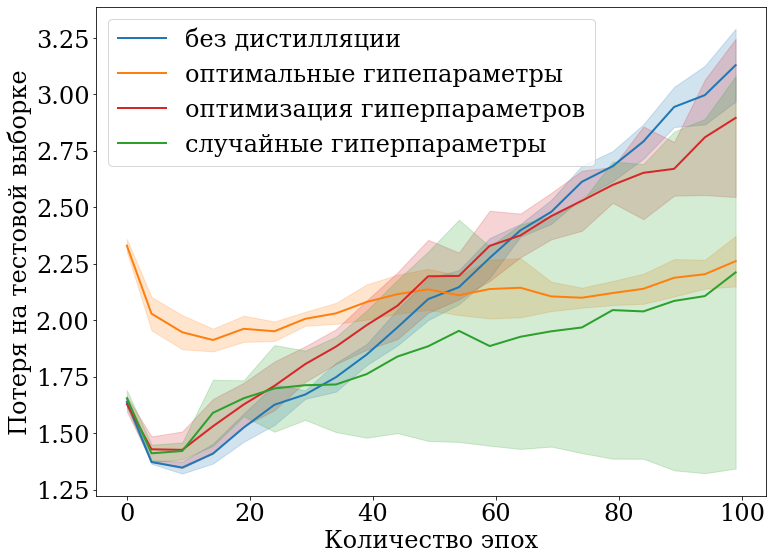

In [19]:
plot_data_params(data_b, 'test loss', 'без дистилляции', 'tab:blue', '')
plot_data_params(data_d, 'test loss', 'оптимальные гипепараметры', 'tab:orange', '')
plot_data_params(data_dr, 'test loss', 'оптимизация гиперпараметров', 'tab:red', '')
plot_data_params(data_h, 'test loss', 'случайные гиперпараметры', 'tab:green', '')

plt.xlabel('Количество эпох')
plt.ylabel('Потеря на тестовой выборке')

plt.legend()
plt.savefig('../figs/loss_22.pdf')

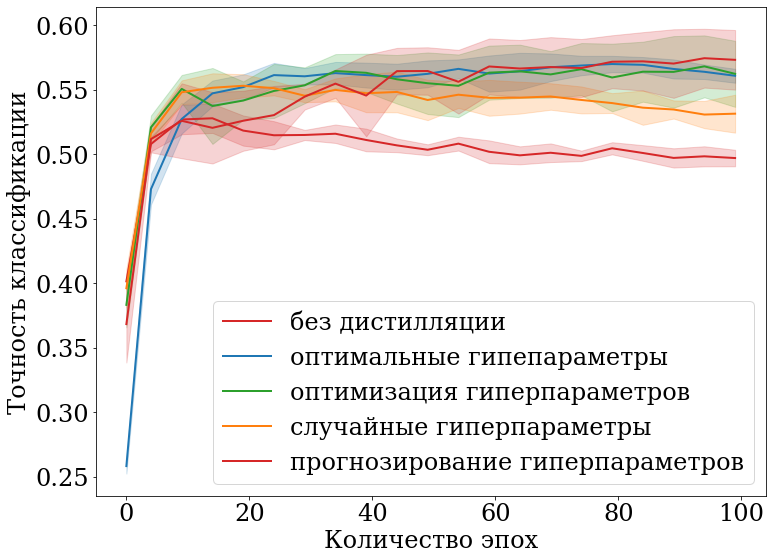

In [8]:
plot_data_params(data_b, 'accuracy', 'без дистилляции', 'tab:red', '')
plot_data_params(data_d, 'accuracy', 'оптимальные гипепараметры', 'tab:blue', '')
plot_data_params(data_h, 'accuracy', 'оптимизация гиперпараметров', 'tab:green', '')
plot_data_params(data_dr, 'accuracy', 'случайные гиперпараметры', 'tab:orange', '')
plot_data_params(data_s, 'accuracy', 'прогнозирование гиперпараметров', 'tab:red', '')

plt.xlabel('Количество эпох')
plt.ylabel('Точность классификации')
plt.legend()
plt.savefig('../figs/acc_22.pdf')

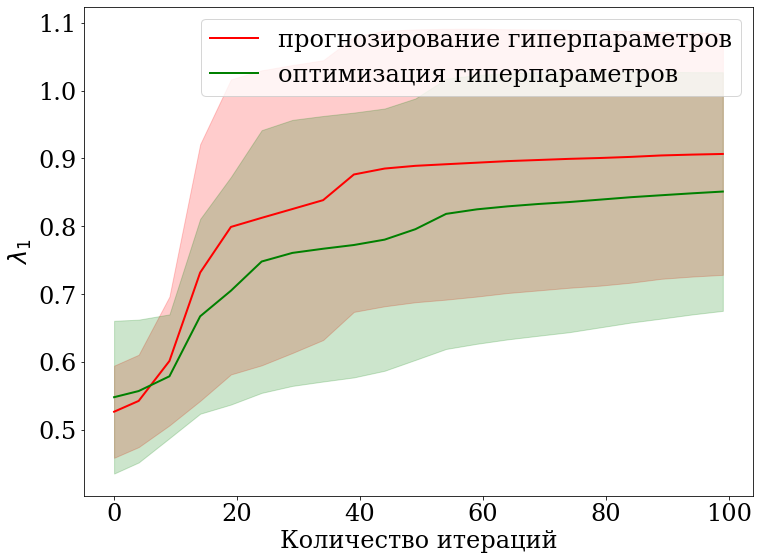

In [9]:
plot_data_params(data_s, 'lambda1', 'прогнозирование гиперпараметров', 'red', '')
# plot_data_params(data_dr, 'lambda1', 'случайные гиперпараметров', 'blue', '')
plot_data_params(data_h, 'lambda1', 'оптимизация гиперпараметров', 'green', '')
plt.xlabel('Количество итераций')
plt.ylabel(r'$\lambda_1$')
# plt.title(r'График зависимости значения $\lambda_1$ от номера итерации')
plt.legend()
plt.savefig('../figs/lambda1_iter22.pdf')
plt.show()

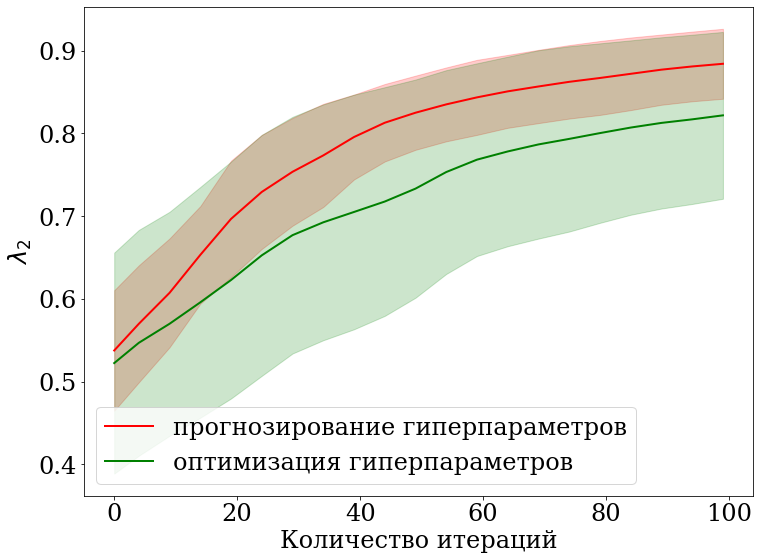

In [10]:
plot_data_params(data_s, 'lambda2', 'прогнозирование гиперпараметров', 'red', '')
# plot_data_params(data_dr, 'lambda2', 'случайные гиперпараметров', 'blue', '')
plot_data_params(data_h, 'lambda2', 'оптимизация гиперпараметров', 'green', '')
plt.xlabel('Количество итераций')
plt.ylabel(r'$\lambda_2$')
# plt.title(r'График зависимости значения $\lambda_2$ от номера итерации')
plt.legend()
plt.savefig('../figs/lambda2_iter22.pdf')
plt.show()

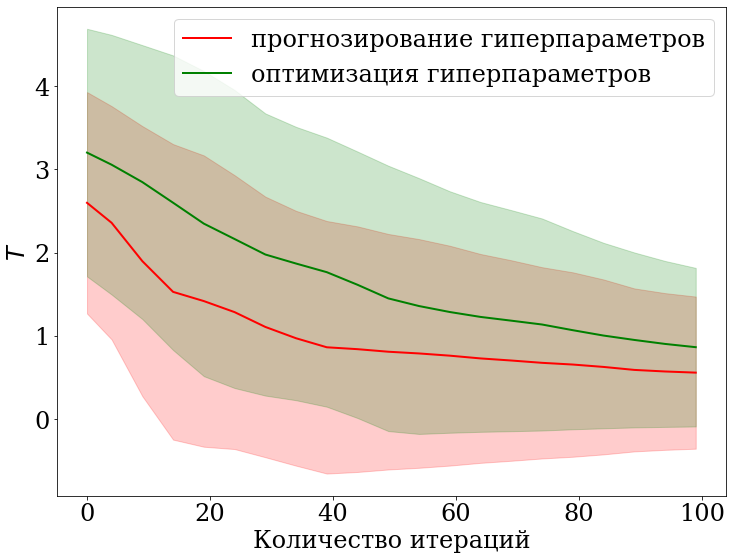

In [11]:
plot_data_params(data_s, 'temp', 'прогнозирование гиперпараметров', 'red', '')
#plot_data_params(data_dr, 'temp', 'случайные гиперпараметров', 'blue', '')
plot_data_params(data_h, 'temp', 'оптимизация гиперпараметров', 'green', '')
plt.xlabel('Количество итераций')
plt.ylabel(r'$T$')
# plt.title(r'График зависимости значения $T$ от номера итерации')
plt.legend()
plt.savefig('../figs/temp_iter22.pdf')
plt.show()

In [22]:
data_5 = open_data_json("../log/exp11_dist_h_b2_optim.jsonl")
data_2 = open_data_json("../log/exp12_dist_h_b2_optim.jsonl")
data_3 = open_data_json("../log/exp13_dist_h_b2_optim.jsonl")
data_10 = open_data_json("../log/exp14_dist_h_b2_optim.jsonl")

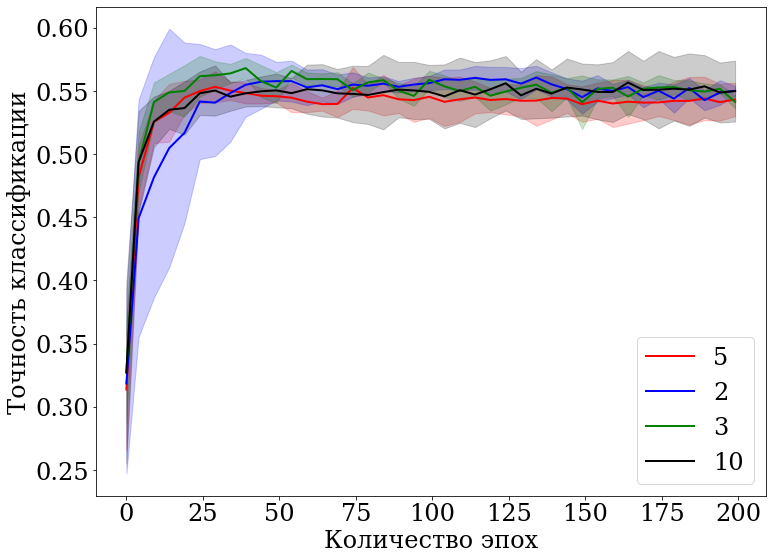

In [7]:
plot_data(data_5, '5', 'red')
plot_data(data_2, '2', 'blue')
plot_data(data_3, '3', 'green')
plot_data(data_10, '10', 'black')

plt.xlabel('Количество эпох')
plt.ylabel('Точность классификации')
plt.legend()
plt.savefig('../figs/acc_splines_.pdf')

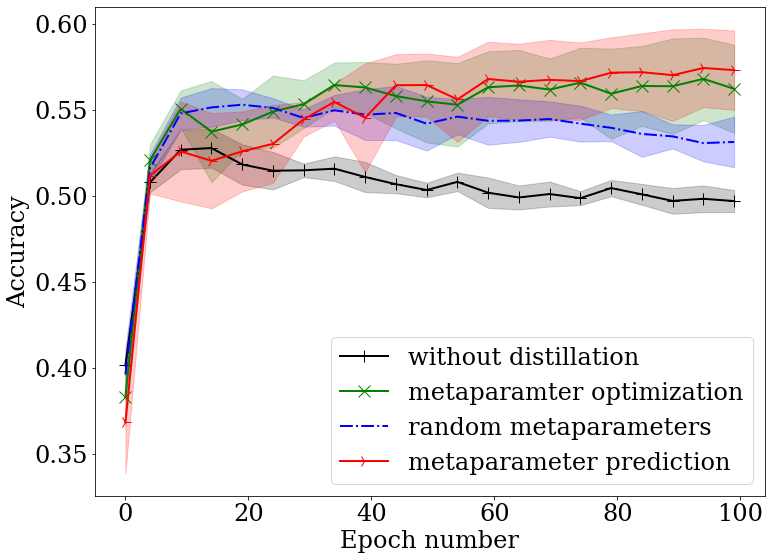

In [12]:
plot_data_params(data_b, 'accuracy', 'without distillation', 'black', '+')
plot_data_params(data_h, 'accuracy', 'metaparamter optimization', 'green', 'x')
plot_data_params(data_dr, 'accuracy', 'random metaparameters', 'blue', '.')
plot_data_params(data_s, 'accuracy', 'metaparameter prediction', 'red', '4')

plt.xlabel('Epoch number')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('../figs/acc_'+experiment_version+'_eng.pdf')

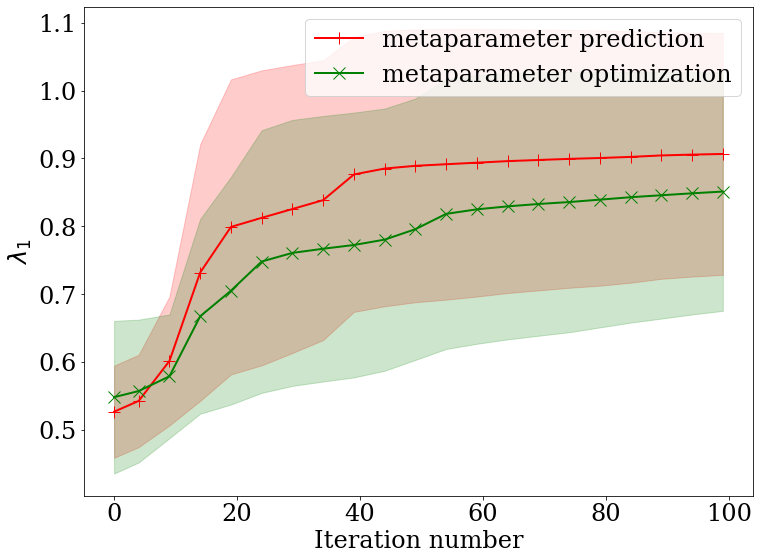

In [13]:
plot_data_params(data_s, 'lambda1', 'metaparameter prediction', 'red', '+')
plot_data_params(data_h, 'lambda1', 'metaparameter optimization', 'green', 'x')
plt.xlabel('Iteration number')
plt.ylabel(r'$\lambda_1$')
plt.legend()
plt.savefig('../figs/lambda1_iter'+experiment_version+'_eng.pdf')
plt.show()

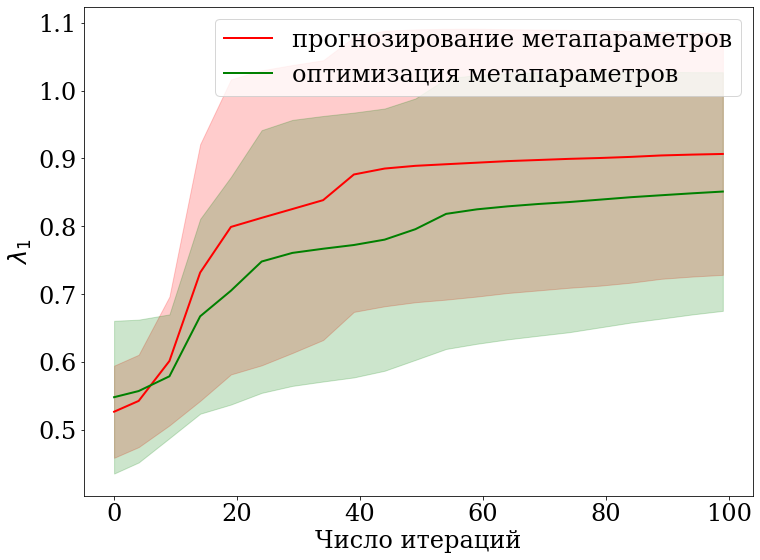

In [14]:
plot_data_params(data_s, 'lambda1', 'прогнозирование метапараметров', 'red', '')
plot_data_params(data_h, 'lambda1', 'оптимизация метапараметров', 'green', '')
plt.xlabel('Число итераций')
plt.ylabel(r'$\lambda_1$')

plt.legend()
plt.savefig('../figs/lambda1_iter'+experiment_version+'_color.pdf')
plt.show()

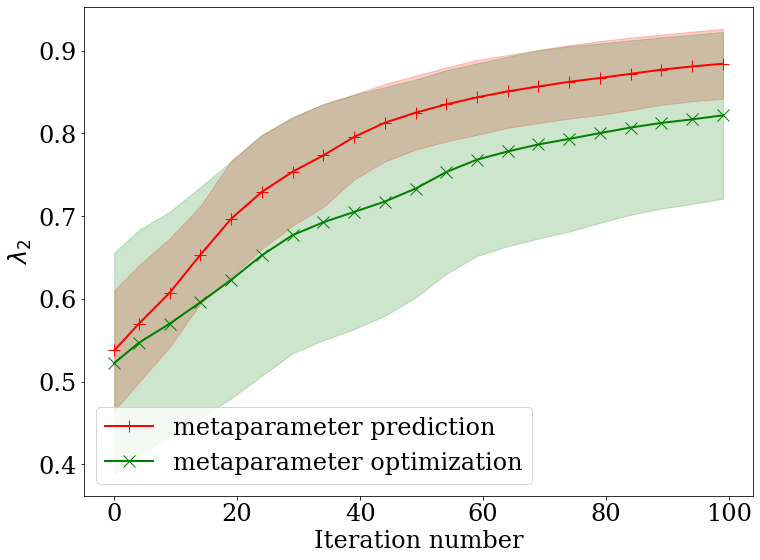

In [15]:
plot_data_params(data_s, 'lambda2', 'metaparameter prediction', 'red', '+')
plot_data_params(data_h, 'lambda2', 'metaparameter optimization', 'green', 'x')
plt.xlabel('Iteration number')
plt.ylabel(r'$\lambda_2$')
plt.legend()
plt.savefig('../figs/lambda2_iter'+experiment_version+'_eng.pdf')
plt.show()

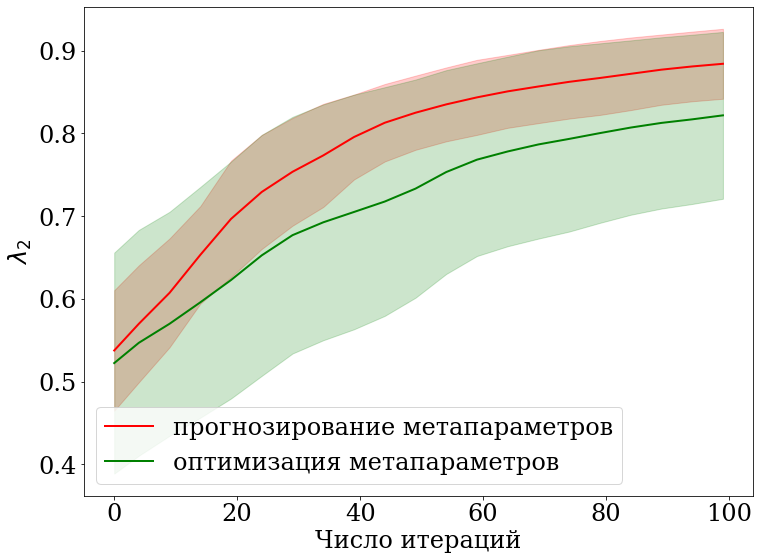

In [16]:
plot_data_params(data_s, 'lambda2', 'прогнозирование метапараметров', 'red', '')
plot_data_params(data_h, 'lambda2', 'оптимизация метапараметров', 'green', '')
plt.xlabel('Число итераций')
plt.ylabel(r'$\lambda_2$')
plt.legend()
plt.savefig('../figs/lambda2_iter'+experiment_version+'_color.pdf')
plt.show()

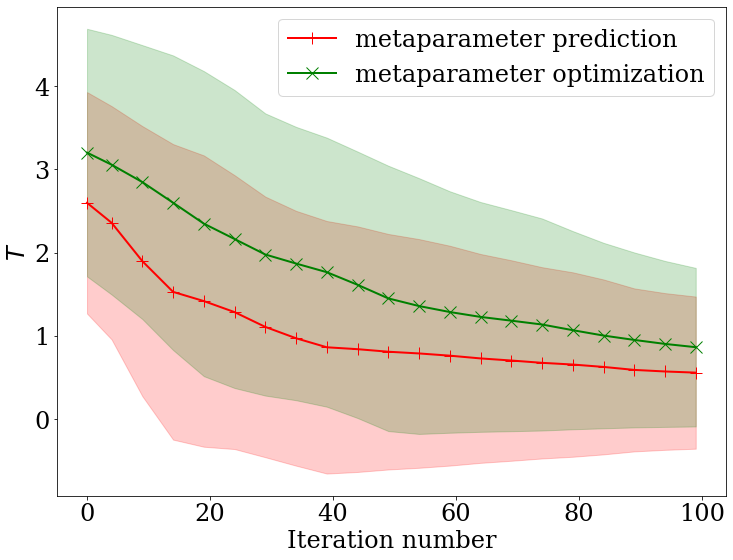

In [17]:
plot_data_params(data_s, 'temp', 'metaparameter prediction', 'red', '+')
plot_data_params(data_h, 'temp', 'metaparameter optimization', 'green', 'x')
plt.xlabel('Iteration number')
plt.ylabel(r'$T$')
plt.legend()
plt.savefig('../figs/temp_iter'+experiment_version+'_eng.pdf')
plt.show()

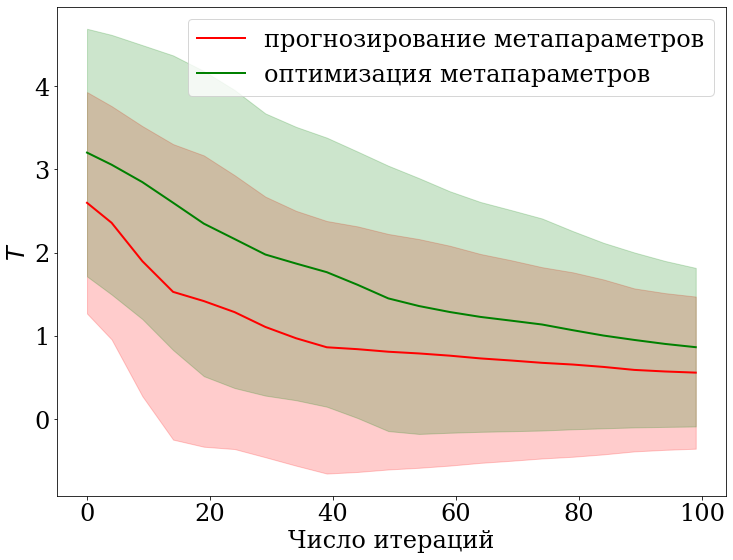

In [18]:
plot_data_params(data_s, 'temp', 'прогнозирование метапараметров', 'red', '')
plot_data_params(data_h, 'temp', 'оптимизация метапараметров', 'green', '')
plt.xlabel('Число итераций')
plt.ylabel(r'$T$')
plt.legend()
plt.savefig('../figs/temp_iter'+experiment_version+'_color.pdf')
plt.show()